In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pdbdir=os.path.join(os.getcwd(),'PDB_phospho_data')
pdbdir

'/mnt/c/Users/rpath/OneDrive - UGent/Desktop/PD/AF2_analysis_PTM/PDB_phospho_data'

In [3]:
# del allprot1

In [4]:
allprot=pd.read_csv(os.path.join(pdbdir,"UP_proteome_Hum_Rat_mouse_structure_only.txt"),sep='\t')

famunip=pd.read_csv('UniProt_fam.tsv',sep='\t',usecols=['Entry','Protein families'])
allprot1=allprot.merge(famunip, on='Entry',how='left')
allprot1=allprot1[['Entry','Organism','Protein families']]
allprot1.columns=['ACC_ID','Organism','Family']
allprot1

,ACC_ID,Organism,Family
0,A0AV96,Homo sapiens (Human),RRM RBM47 family
1,A0AVK6,Homo sapiens (Human),E2F/DP family
2,A0AVT1,Homo sapiens (Human),Ubiquitin-activating E1 family
3,A0FGR8,Homo sapiens (Human),Extended synaptotagmin family
4,A0JLT2,Homo sapiens (Human),Mediator complex subunit 19 family
...,...,...,...
11481,P04646,Rattus norvegicus (Rat),NaN
11482,P20759,Rattus norvegicus (Rat),NaN
11483,P20760,Rattus norvegicus (Rat),NaN
11484,P20761,Rattus norvegicus (Rat),NaN


In [7]:
proteomeStr=pd.read_csv(os.path.join(pdbdir,"Proteome_structure_stat.txt"),delimiter="\t")
# proteomeStr=proteomeStr.loc[~proteomeStr.ACC_ID.isin(['P07358','P07477','Q9Y478'])]

proteomePhos = pd.read_csv(os.path.join(pdbdir,"Proteome_phospho_stat.txt"), delimiter="\t")
proteomePhos.columns=['ACC_ID','numStrucP','numConfP','PDBlist']
# proteomePhos=proteomePhos.loc[~proteomePhos.ACC_ID.isin(['P07358','P07477','Q9Y478'])]

phosCov = pd.read_csv(os.path.join(pdbdir,"Proteome_phosstructure_coverage.txt"), delimiter="\t")
# phosCov=phosCov.loc[~phosCov.ACC_ID.isin(['P07358','P07477','Q9Y478'])]


phosPos_filtered = pd.read_csv(os.path.join(pdbdir,"Proteome_phosPos_filtered.txt"), delimiter="\t")
phosPos_filtered.columns=['ACC_ID','PDBID','CHAINID','ModPosList','modpos','modres','numMod']
# phosPos_filtered=phosPos_filtered.loc[~phosPos_filtered.ACC_ID.isin(['P07358','P07477','Q9Y478'])]

phos_Nphos_filt=pd.read_csv(os.path.join(pdbdir,'pdbDF_newP_NP.txt'),sep='\t')
# phos_Nphos_filt=phos_Nphos_filt.loc[~phos_Nphos_filt.ACC_ID.isin(['P07358','P07477','Q9Y478'])]


pairedfilt=pd.read_csv("paired_df_str_NPall.txt", delimiter="\t")
# pairedfilt=pairedfilt.loc[~pairedfilt.ACC_ID.isin(['P07358','P07477','Q9Y478'])]


Af3preds=pd.read_csv("AF3_filenames.txt", sep='\t')
# Af3preds=Af3preds.loc[~Af3preds.ACC_ID.isin(['P07358','P07477','Q9Y478'])]



In [10]:
protfilt=list(set(Af3preds.ACC_ID.tolist())-set(['P07358','P07477','Q9Y478']))
print (len(protfilt))

109


In [11]:
pdbfilt=phos_Nphos_filt.loc[phos_Nphos_filt.ACC_ID.isin(protfilt)]
pdbfilt.PDBID.nunique()

3958

In [14]:
import requests

pdbid_list = list(set(pdbfilt.PDBID.tolist()))

def get_structure_summary(pdb_id):
    url = f"https://www.ebi.ac.uk/pdbe/api/pdb/entry/summary/{pdb_id}"
#     print(f"Fetching data from: {url}")
    
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Error fetching data for {pdb_id}: {response.status_code}")
        return None
    
    try:
        data = response.json()
        if pdb_id in data:
            pdbsum = data[pdb_id]
            for entity in pdbsum:
                rel_date=entity['release_date']
                return rel_date
        else:
            print(f"No data found for PDB ID: {pdb_id}")
            return None
    except ValueError:
        print("Error parsing the response JSON.")
        return None

x=0
pdbsummary=[]
for pdb_id in pdbid_list:
    x+=1
    print (f"Processing PDB {pdb_id}, {x} of {len(pdbid_list)}")
    
    reldate=get_structure_summary(pdb_id)
    pdbsummary.append({'PDBID':pdb_id,
                     'Release_date': reldate})

reldf=pd.DataFrame(pdbsummary)
reldf
    


Processing PDB 2n0w, 1 of 3958
Processing PDB 4eyj, 2 of 3958
Processing PDB 1oit, 3 of 3958
Processing PDB 2cci, 4 of 3958
Processing PDB 4xp3, 5 of 3958
Processing PDB 5fxs, 6 of 3958
Processing PDB 4bzn, 7 of 3958
Processing PDB 2w06, 8 of 3958
Processing PDB 6npt, 9 of 3958
Processing PDB 5szi, 10 of 3958
Processing PDB 7evo, 11 of 3958
Processing PDB 5wdo, 12 of 3958
Processing PDB 2lcf, 13 of 3958
Processing PDB 4l45, 14 of 3958
Processing PDB 4hgt, 15 of 3958
Processing PDB 2gtm, 16 of 3958
Processing PDB 4dlv, 17 of 3958
Processing PDB 6ep4, 18 of 3958
Processing PDB 3e92, 19 of 3958
Processing PDB 6ate, 20 of 3958
Processing PDB 4byi, 21 of 3958
Processing PDB 3vbx, 22 of 3958
Processing PDB 3wbl, 23 of 3958
Processing PDB 6ot6, 24 of 3958
Processing PDB 6hk7, 25 of 3958
Processing PDB 3ad6, 26 of 3958
Processing PDB 3lbh, 27 of 3958
Processing PDB 8vjb, 28 of 3958
Processing PDB 5ar0, 29 of 3958
Processing PDB 4a7c, 30 of 3958
Processing PDB 3r6x, 31 of 3958
Processing PDB 4y

Processing PDB 2y8o, 253 of 3958
Processing PDB 1oiy, 254 of 3958
Processing PDB 4k18, 255 of 3958
Processing PDB 5kpk, 256 of 3958
Processing PDB 3uok, 257 of 3958
Processing PDB 4fv8, 258 of 3958
Processing PDB 6pl3, 259 of 3958
Processing PDB 2xiz, 260 of 3958
Processing PDB 8qlt, 261 of 3958
Processing PDB 4lhz, 262 of 3958
Processing PDB 5cf6, 263 of 3958
Processing PDB 2cl0, 264 of 3958
Processing PDB 3orz, 265 of 3958
Processing PDB 8pym, 266 of 3958
Processing PDB 2v7a, 267 of 3958
Processing PDB 6zcp, 268 of 3958
Processing PDB 2gph, 269 of 3958
Processing PDB 5ij8, 270 of 3958
Processing PDB 4u97, 271 of 3958
Processing PDB 4j9c, 272 of 3958
Processing PDB 1j1b, 273 of 3958
Processing PDB 6npu, 274 of 3958
Processing PDB 4o6e, 275 of 3958
Processing PDB 8gub, 276 of 3958
Processing PDB 3myg, 277 of 3958
Processing PDB 5mzl, 278 of 3958
Processing PDB 8xlo, 279 of 3958
Processing PDB 6aam, 280 of 3958
Processing PDB 7aiq, 281 of 3958
Processing PDB 3lxl, 282 of 3958
Processing

Processing PDB 3wf7, 502 of 3958
Processing PDB 5r9h, 503 of 3958
Processing PDB 6ohp, 504 of 3958
Processing PDB 6flv, 505 of 3958
Processing PDB 4dit, 506 of 3958
Processing PDB 7qhd, 507 of 3958
Processing PDB 3tei, 508 of 3958
Processing PDB 4aa4, 509 of 3958
Processing PDB 5oro, 510 of 3958
Processing PDB 3h9o, 511 of 3958
Processing PDB 4j9e, 512 of 3958
Processing PDB 8d6d, 513 of 3958
Processing PDB 8jn8, 514 of 3958
Processing PDB 5lmb, 515 of 3958
Processing PDB 7d44, 516 of 3958
Processing PDB 4iq6, 517 of 3958
Processing PDB 2jfm, 518 of 3958
Processing PDB 3iok, 519 of 3958
Processing PDB 4aoj, 520 of 3958
Processing PDB 1pxj, 521 of 3958
Processing PDB 6sp9, 522 of 3958
Processing PDB 6dki, 523 of 3958
Processing PDB 6b8j, 524 of 3958
Processing PDB 6s17, 525 of 3958
Processing PDB 4eh4, 526 of 3958
Processing PDB 5xyx, 527 of 3958
Processing PDB 7ogd, 528 of 3958
Processing PDB 5vcv, 529 of 3958
Processing PDB 5wfo, 530 of 3958
Processing PDB 1fgk, 531 of 3958
Processing

Processing PDB 5sxe, 751 of 3958
Processing PDB 7uos, 752 of 3958
Processing PDB 6thz, 753 of 3958
Processing PDB 4i6q, 754 of 3958
Processing PDB 2rgc, 755 of 3958
Processing PDB 4d1x, 756 of 3958
Processing PDB 6g97, 757 of 3958
Processing PDB 2iw8, 758 of 3958
Processing PDB 2z7l, 759 of 3958
Processing PDB 8osn, 760 of 3958
Processing PDB 4eoi, 761 of 3958
Processing PDB 6yx5, 762 of 3958
Processing PDB 5n63, 763 of 3958
Processing PDB 7dhn, 764 of 3958
Processing PDB 5l8l, 765 of 3958
Processing PDB 5bn9, 766 of 3958
Processing PDB 4zy4, 767 of 3958
Processing PDB 8r6q, 768 of 3958
Processing PDB 1u3s, 769 of 3958
Processing PDB 7qgp, 770 of 3958
Processing PDB 5swg, 771 of 3958
Processing PDB 7nzy, 772 of 3958
Processing PDB 1f3m, 773 of 3958
Processing PDB 7dph, 774 of 3958
Processing PDB 6vnj, 775 of 3958
Processing PDB 6zcy, 776 of 3958
Processing PDB 4eos, 777 of 3958
Processing PDB 7q1m, 778 of 3958
Processing PDB 7ju6, 779 of 3958
Processing PDB 3cly, 780 of 3958
Processing

Processing PDB 1bl7, 1000 of 3958
Processing PDB 3ti1, 1001 of 3958
Processing PDB 7sys, 1002 of 3958
Processing PDB 3rai, 1003 of 3958
Processing PDB 5y5u, 1004 of 3958
Processing PDB 8aoj, 1005 of 3958
Processing PDB 7q6h, 1006 of 3958
Processing PDB 6g78, 1007 of 3958
Processing PDB 4fa2, 1008 of 3958
Processing PDB 6f7b, 1009 of 3958
Processing PDB 6wtq, 1010 of 3958
Processing PDB 3f5p, 1011 of 3958
Processing PDB 3s0o, 1012 of 3958
Processing PDB 5if1, 1013 of 3958
Processing PDB 5orr, 1014 of 3958
Processing PDB 6cz2, 1015 of 3958
Processing PDB 8p1o, 1016 of 3958
Processing PDB 3qcq, 1017 of 3958
Processing PDB 7ajs, 1018 of 3958
Processing PDB 3r21, 1019 of 3958
Processing PDB 5dos, 1020 of 3958
Processing PDB 8osm, 1021 of 3958
Processing PDB 8xz7, 1022 of 3958
Processing PDB 5osj, 1023 of 3958
Processing PDB 8v8i, 1024 of 3958
Processing PDB 5n66, 1025 of 3958
Processing PDB 6aaj, 1026 of 3958
Processing PDB 7fgm, 1027 of 3958
Processing PDB 4fx3, 1028 of 3958
Processing PDB

Processing PDB 3qzi, 1242 of 3958
Processing PDB 3f5x, 1243 of 3958
Processing PDB 8v8h, 1244 of 3958
Processing PDB 6d5h, 1245 of 3958
Processing PDB 5n4y, 1246 of 3958
Processing PDB 4ii5, 1247 of 3958
Processing PDB 5iex, 1248 of 3958
Processing PDB 3fkl, 1249 of 3958
Processing PDB 4kbk, 1250 of 3958
Processing PDB 3gcu, 1251 of 3958
Processing PDB 2wtv, 1252 of 3958
Processing PDB 3h10, 1253 of 3958
Processing PDB 4e5b, 1254 of 3958
Processing PDB 7a5l, 1255 of 3958
Processing PDB 4o27, 1256 of 3958
Processing PDB 1fq1, 1257 of 3958
Processing PDB 4l9s, 1258 of 3958
Processing PDB 7ra5, 1259 of 3958
Processing PDB 1ctq, 1260 of 3958
Processing PDB 2duv, 1261 of 3958
Processing PDB 1yy4, 1262 of 3958
Processing PDB 6cpe, 1263 of 3958
Processing PDB 3f7z, 1264 of 3958
Processing PDB 7jii, 1265 of 3958
Processing PDB 2y1m, 1266 of 3958
Processing PDB 5o49, 1267 of 3958
Processing PDB 5tq4, 1268 of 3958
Processing PDB 2z4b, 1269 of 3958
Processing PDB 3nrm, 1270 of 3958
Processing PDB

Processing PDB 3wzd, 1483 of 3958
Processing PDB 1opk, 1484 of 3958
Processing PDB 3kvw, 1485 of 3958
Processing PDB 6eqp, 1486 of 3958
Processing PDB 6p8h, 1487 of 3958
Processing PDB 7m0l, 1488 of 3958
Processing PDB 2x9e, 1489 of 3958
Processing PDB 6z4z, 1490 of 3958
Processing PDB 7jij, 1491 of 3958
Processing PDB 4c4j, 1492 of 3958
Processing PDB 2lwi, 1493 of 3958
Processing PDB 5oy4, 1494 of 3958
Processing PDB 8x5z, 1495 of 3958
Processing PDB 2c5l, 1496 of 3958
Processing PDB 8gft, 1497 of 3958
Processing PDB 8u1f, 1498 of 3958
Processing PDB 2xqj, 1499 of 3958
Processing PDB 2bdf, 1500 of 3958
Processing PDB 4eoj, 1501 of 3958
Processing PDB 3f9m, 1502 of 3958
Processing PDB 6gjb, 1503 of 3958
Processing PDB 6opi, 1504 of 3958
Processing PDB 6qaw, 1505 of 3958
Processing PDB 3hp5, 1506 of 3958
Processing PDB 3fsk, 1507 of 3958
Processing PDB 7vv9, 1508 of 3958
Processing PDB 4h3p, 1509 of 3958
Processing PDB 4f9a, 1510 of 3958
Processing PDB 3wzj, 1511 of 3958
Processing PDB

Processing PDB 6xr6, 1725 of 3958
Processing PDB 1fin, 1726 of 3958
Processing PDB 1zaf, 1727 of 3958
Processing PDB 4bbz, 1728 of 3958
Processing PDB 3kud, 1729 of 3958
Processing PDB 2hy8, 1730 of 3958
Processing PDB 6xdd, 1731 of 3958
Processing PDB 4fih, 1732 of 3958
Processing PDB 2ojj, 1733 of 3958
Processing PDB 2fys, 1734 of 3958
Processing PDB 6k72, 1735 of 3958
Processing PDB 4lyn, 1736 of 3958
Processing PDB 1x7b, 1737 of 3958
Processing PDB 3lbj, 1738 of 3958
Processing PDB 6e4u, 1739 of 3958
Processing PDB 1qwt, 1740 of 3958
Processing PDB 2w1c, 1741 of 3958
Processing PDB 4xey, 1742 of 3958
Processing PDB 4ztn, 1743 of 3958
Processing PDB 7abg, 1744 of 3958
Processing PDB 6tia, 1745 of 3958
Processing PDB 6nm7, 1746 of 3958
Processing PDB 5z56, 1747 of 3958
Processing PDB 4r8q, 1748 of 3958
Processing PDB 7jih, 1749 of 3958
Processing PDB 8g16, 1750 of 3958
Processing PDB 3pj8, 1751 of 3958
Processing PDB 7nr5, 1752 of 3958
Processing PDB 8atl, 1753 of 3958
Processing PDB

Processing PDB 4yno, 1966 of 3958
Processing PDB 1ir3, 1967 of 3958
Processing PDB 4qpm, 1968 of 3958
Processing PDB 4yp8, 1969 of 3958
Processing PDB 4qp6, 1970 of 3958
Processing PDB 7bwt, 1971 of 3958
Processing PDB 1xws, 1972 of 3958
Processing PDB 8tbg, 1973 of 3958
Processing PDB 6e6p, 1974 of 3958
Processing PDB 6n6o, 1975 of 3958
Processing PDB 3ocg, 1976 of 3958
Processing PDB 7q4o, 1977 of 3958
Processing PDB 4jx7, 1978 of 3958
Processing PDB 5o2b, 1979 of 3958
Processing PDB 5fp6, 1980 of 3958
Processing PDB 8c1m, 1981 of 3958
Processing PDB 5sxk, 1982 of 3958
Processing PDB 6rij, 1983 of 3958
Processing PDB 1z0n, 1984 of 3958
Processing PDB 5dnr, 1985 of 3958
Processing PDB 3pxq, 1986 of 3958
Processing PDB 3q53, 1987 of 3958
Processing PDB 7kw7, 1988 of 3958
Processing PDB 7jhp, 1989 of 3958
Processing PDB 5ttu, 1990 of 3958
Processing PDB 6qab, 1991 of 3958
Processing PDB 5jq5, 1992 of 3958
Processing PDB 3hll, 1993 of 3958
Processing PDB 8dje, 1994 of 3958
Processing PDB

Processing PDB 4kip, 2207 of 3958
Processing PDB 4ztr, 2208 of 3958
Processing PDB 6w3a, 2209 of 3958
Processing PDB 4dch, 2210 of 3958
Processing PDB 3r1q, 2211 of 3958
Processing PDB 6zwp, 2212 of 3958
Processing PDB 3d83, 2213 of 3958
Processing PDB 4yps, 2214 of 3958
Processing PDB 2whb, 2215 of 3958
Processing PDB 8bx9, 2216 of 3958
Processing PDB 5ggt, 2217 of 3958
Processing PDB 6ne7, 2218 of 3958
Processing PDB 2uv2, 2219 of 3958
Processing PDB 1m7q, 2220 of 3958
Processing PDB 7qg3, 2221 of 3958
Processing PDB 5a46, 2222 of 3958
Processing PDB 4hzr, 2223 of 3958
Processing PDB 3s1h, 2224 of 3958
Processing PDB 3vo3, 2225 of 3958
Processing PDB 7s84, 2226 of 3958
Processing PDB 4xg6, 2227 of 3958
Processing PDB 2yly, 2228 of 3958
Processing PDB 6egd, 2229 of 3958
Processing PDB 6v6q, 2230 of 3958
Processing PDB 5dxt, 2231 of 3958
Processing PDB 8w3x, 2232 of 3958
Processing PDB 4aqd, 2233 of 3958
Processing PDB 2wip, 2234 of 3958
Processing PDB 8d6e, 2235 of 3958
Processing PDB

Processing PDB 6raa, 2449 of 3958
Processing PDB 4ek8, 2450 of 3958
Processing PDB 5vuc, 2451 of 3958
Processing PDB 5i8a, 2452 of 3958
Processing PDB 6soi, 2453 of 3958
Processing PDB 7f67, 2454 of 3958
Processing PDB 1yom, 2455 of 3958
Processing PDB 5r9e, 2456 of 3958
Processing PDB 8jba, 2457 of 3958
Processing PDB 3vey, 2458 of 3958
Processing PDB 5mqv, 2459 of 3958
Processing PDB 3rwp, 2460 of 3958
Processing PDB 5o21, 2461 of 3958
Processing PDB 6s1i, 2462 of 3958
Processing PDB 1q8k, 2463 of 3958
Processing PDB 5vd3, 2464 of 3958
Processing PDB 2w1h, 2465 of 3958
Processing PDB 2bal, 2466 of 3958
Processing PDB 5vub, 2467 of 3958
Processing PDB 3qhw, 2468 of 3958
Processing PDB 5a6o, 2469 of 3958
Processing PDB 5dey, 2470 of 3958
Processing PDB 4ez3, 2471 of 3958
Processing PDB 3a7f, 2472 of 3958
Processing PDB 4aw0, 2473 of 3958
Processing PDB 7kts, 2474 of 3958
Processing PDB 6tw2, 2475 of 3958
Processing PDB 3srv, 2476 of 3958
Processing PDB 7bwa, 2477 of 3958
Processing PDB

Processing PDB 7oox, 2690 of 3958
Processing PDB 3e62, 2691 of 3958
Processing PDB 7a5b, 2692 of 3958
Processing PDB 8r1t, 2693 of 3958
Processing PDB 4yne, 2694 of 3958
Processing PDB 8ai7, 2695 of 3958
Processing PDB 6vhg, 2696 of 3958
Processing PDB 2xmb, 2697 of 3958
Processing PDB 4alv, 2698 of 3958
Processing PDB 4acm, 2699 of 3958
Processing PDB 8qel, 2700 of 3958
Processing PDB 3iw6, 2701 of 3958
Processing PDB 5eg3, 2702 of 3958
Processing PDB 7cp4, 2703 of 3958
Processing PDB 6pmc, 2704 of 3958
Processing PDB 8byq, 2705 of 3958
Processing PDB 5jem, 2706 of 3958
Processing PDB 7zh8, 2707 of 3958
Processing PDB 3zu7, 2708 of 3958
Processing PDB 6f3g, 2709 of 3958
Processing PDB 6vnv, 2710 of 3958
Processing PDB 6pma, 2711 of 3958
Processing PDB 6t9p, 2712 of 3958
Processing PDB 5ose, 2713 of 3958
Processing PDB 4y73, 2714 of 3958
Processing PDB 1hcl, 2715 of 3958
Processing PDB 1zef, 2716 of 3958
Processing PDB 4kjd, 2717 of 3958
Processing PDB 3r7u, 2718 of 3958
Processing PDB

Processing PDB 1gnp, 2931 of 3958
Processing PDB 4pms, 2932 of 3958
Processing PDB 2uzl, 2933 of 3958
Processing PDB 6s1h, 2934 of 3958
Processing PDB 3rvg, 2935 of 3958
Processing PDB 5dh3, 2936 of 3958
Processing PDB 3hv4, 2937 of 3958
Processing PDB 4hvd, 2938 of 3958
Processing PDB 3ma3, 2939 of 3958
Processing PDB 6urc, 2940 of 3958
Processing PDB 5y5t, 2941 of 3958
Processing PDB 3qzg, 2942 of 3958
Processing PDB 1agp, 2943 of 3958
Processing PDB 6sze, 2944 of 3958
Processing PDB 3lff, 2945 of 3958
Processing PDB 6vnc, 2946 of 3958
Processing PDB 5j3x, 2947 of 3958
Processing PDB 1yxv, 2948 of 3958
Processing PDB 6xaf, 2949 of 3958
Processing PDB 2qoc, 2950 of 3958
Processing PDB 8bvw, 2951 of 3958
Processing PDB 1he8, 2952 of 3958
Processing PDB 1h08, 2953 of 3958
Processing PDB 6r49, 2954 of 3958
Processing PDB 7x4u, 2955 of 3958
Processing PDB 4nj3, 2956 of 3958
Processing PDB 1lf0, 2957 of 3958
Processing PDB 5n5l, 2958 of 3958
Processing PDB 4gt3, 2959 of 3958
Processing PDB

Processing PDB 4rwk, 3173 of 3958
Processing PDB 5ra9, 3174 of 3958
Processing PDB 5iso, 3175 of 3958
Processing PDB 7aj4, 3176 of 3958
Processing PDB 2qd9, 3177 of 3958
Processing PDB 2bmc, 3178 of 3958
Processing PDB 4gt5, 3179 of 3958
Processing PDB 7a55, 3180 of 3958
Processing PDB 4twp, 3181 of 3958
Processing PDB 4g2f, 3182 of 3958
Processing PDB 6d1z, 3183 of 3958
Processing PDB 7n93, 3184 of 3958
Processing PDB 3j0s, 3185 of 3958
Processing PDB 4lmu, 3186 of 3958
Processing PDB 3uyt, 3187 of 3958
Processing PDB 6i5h, 3188 of 3958
Processing PDB 5kx8, 3189 of 3958
Processing PDB 5wfr, 3190 of 3958
Processing PDB 1qpe, 3191 of 3958
Processing PDB 3my5, 3192 of 3958
Processing PDB 3tgp, 3193 of 3958
Processing PDB 6d5l, 3194 of 3958
Processing PDB 2r3m, 3195 of 3958
Processing PDB 8auz, 3196 of 3958
Processing PDB 5o12, 3197 of 3958
Processing PDB 8h6p, 3198 of 3958
Processing PDB 7e73, 3199 of 3958
Processing PDB 4zzo, 3200 of 3958
Processing PDB 3zdi, 3201 of 3958
Processing PDB

Processing PDB 7sa0, 3415 of 3958
Processing PDB 5bue, 3416 of 3958
Processing PDB 2q0n, 3417 of 3958
Processing PDB 1di9, 3418 of 3958
Processing PDB 7u33, 3419 of 3958
Processing PDB 5hd4, 3420 of 3958
Processing PDB 4qmn, 3421 of 3958
Processing PDB 3ocb, 3422 of 3958
Processing PDB 4xg2, 3423 of 3958
Processing PDB 4i0s, 3424 of 3958
Processing PDB 3igg, 3425 of 3958
Processing PDB 5eta, 3426 of 3958
Processing PDB 4pmp, 3427 of 3958
Processing PDB 4eh2, 3428 of 3958
Processing PDB 6q4d, 3429 of 3958
Processing PDB 3qri, 3430 of 3958
Processing PDB 1uu9, 3431 of 3958
Processing PDB 6y4v, 3432 of 3958
Processing PDB 2bpm, 3433 of 3958
Processing PDB 3ig7, 3434 of 3958
Processing PDB 5bpn, 3435 of 3958
Processing PDB 7ndy, 3436 of 3958
Processing PDB 1yi4, 3437 of 3958
Processing PDB 6g8x, 3438 of 3958
Processing PDB 1nde, 3439 of 3958
Processing PDB 3a99, 3440 of 3958
Processing PDB 6nfy, 3441 of 3958
Processing PDB 1pw2, 3442 of 3958
Processing PDB 5wpl, 3443 of 3958
Processing PDB

Processing PDB 3qcy, 3656 of 3958
Processing PDB 5upk, 3657 of 3958
Processing PDB 1ykr, 3658 of 3958
Processing PDB 6q8p, 3659 of 3958
Processing PDB 4dlj, 3660 of 3958
Processing PDB 7auv, 3661 of 3958
Processing PDB 6uc4, 3662 of 3958
Processing PDB 6ol2, 3663 of 3958
Processing PDB 4eut, 3664 of 3958
Processing PDB 4zxt, 3665 of 3958
Processing PDB 7ngb, 3666 of 3958
Processing PDB 3qx4, 3667 of 3958
Processing PDB 3cpb, 3668 of 3958
Processing PDB 4eh8, 3669 of 3958
Processing PDB 4f09, 3670 of 3958
Processing PDB 4jbp, 3671 of 3958
Processing PDB 3kmm, 3672 of 3958
Processing PDB 1urc, 3673 of 3958
Processing PDB 6dkw, 3674 of 3958
Processing PDB 2wo6, 3675 of 3958
Processing PDB 3roc, 3676 of 3958
Processing PDB 5a4c, 3677 of 3958
Processing PDB 5o2c, 3678 of 3958
Processing PDB 4cfw, 3679 of 3958
Processing PDB 2wih, 3680 of 3958
Processing PDB 7awi, 3681 of 3958
Processing PDB 3ms9, 3682 of 3958
Processing PDB 3lbn, 3683 of 3958
Processing PDB 6hk3, 3684 of 3958
Processing PDB

Processing PDB 2of4, 3897 of 3958
Processing PDB 5vcy, 3898 of 3958
Processing PDB 3k3i, 3899 of 3958
Processing PDB 7b34, 3900 of 3958
Processing PDB 6zln, 3901 of 3958
Processing PDB 1uu8, 3902 of 3958
Processing PDB 3aqv, 3903 of 3958
Processing PDB 2bik, 3904 of 3958
Processing PDB 2c6k, 3905 of 3958
Processing PDB 2xmy, 3906 of 3958
Processing PDB 5dr2, 3907 of 3958
Processing PDB 1xbb, 3908 of 3958
Processing PDB 7ajv, 3909 of 3958
Processing PDB 8ao3, 3910 of 3958
Processing PDB 3ddp, 3911 of 3958
Processing PDB 3mpt, 3912 of 3958
Processing PDB 5ij7, 3913 of 3958
Processing PDB 1qkm, 3914 of 3958
Processing PDB 5o45, 3915 of 3958
Processing PDB 1yi6, 3916 of 3958
Processing PDB 2r3p, 3917 of 3958
Processing PDB 6q4j, 3918 of 3958
Processing PDB 5dlv, 3919 of 3958
Processing PDB 3bu3, 3920 of 3958
Processing PDB 4ztq, 3921 of 3958
Processing PDB 5flf, 3922 of 3958
Processing PDB 8g13, 3923 of 3958
Processing PDB 4tn6, 3924 of 3958
Processing PDB 5l0b, 3925 of 3958
Processing PDB

,PDBID,Release_date
0,2n0w,20160127
1,4eyj,20121219
2,1oit,20030904
3,2cci,20060503
4,4xp3,20150812
...,...,...
3953,1nvv,20030401
3954,1yhv,20050524
3955,4id7,20130130
3956,8ao6,20220928


In [15]:
reldf.to_csv('PDB_release_date.txt',sep='\t',index=False)

In [288]:
reldf=pd.read_csv('PDB_release_date.txt',sep='\t')

In [1]:
# Convert the 'Release_date' column to datetime and split into separate columns
reldf['Release_date'] = pd.to_datetime(reldf['Release_date'], format='%Y%m%d')
reldf['Year'] = reldf['Release_date'].dt.year
reldf['Month'] = reldf['Release_date'].dt.month
reldf['Day'] = reldf['Release_date'].dt.day
reldf.Year.value_counts().sort_index()


In [297]:
reldf

,PDBID,Release_date,Year,Month,Day
0,2n0w,2016-01-27,2016,1,27
1,4eyj,2012-12-19,2012,12,19
2,1oit,2003-09-04,2003,9,4
3,2cci,2006-05-03,2006,5,3
4,4xp3,2015-08-12,2015,8,12
...,...,...,...,...,...
3953,1nvv,2003-04-01,2003,4,1
3954,1yhv,2005-05-24,2005,5,24
3955,4id7,2013-01-30,2013,1,30
3956,8ao6,2022-09-28,2022,9,28


In [305]:
af3eval_df=pd.read_csv('forAF3_eval.txt',sep='\t')
pdbcheck=af3eval_df.copy()
pdbcheck['pdb1'] = pdbcheck.prot1.str.split('_').str[0]
pdbcheck['pdb2'] = pdbcheck.prot2.str.split('_').str[0]

pdbchecklist=list(set(pdbcheck.pdb1.tolist()+pdbcheck.pdb2.tolist()))

print (len(pdbchecklist))
reldf_sub=reldf.loc[reldf.PDBID.isin(pdbchecklist)]

reldf_sub.Year.value_counts().sort_index()


275


1983     1
1992     1
1995     1
1997     1
1998     1
2000     2
2001     2
2002     1
2003     2
2004     3
2005     5
2006     7
2007    10
2008     9
2009     5
2010     5
2011    11
2012     8
2013    19
2014     8
2015    10
2016    17
2017    16
2018    19
2019    19
2020    32
2021    19
2022    16
2023    14
2024    11
Name: Year, dtype: int64

In [299]:
af3eval_df

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2,ACC_ID_x,ACC_ID_y
0,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,global,2.14,medium,2.14,6vhg_A,6nec_A,NaN,NaN
1,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,segment,3.82,medium,3.82,6vhg_A,6nec_A,NaN,NaN
2,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,global,0.68,small,0.68,7aip_A,7aiq_A,NaN,NaN
3,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,segment,0.86,small,0.86,7aip_A,7aiq_A,NaN,NaN
4,P22681,4a49,A,371_PTR,371,PTR,1,4a49A,4a49_A,global,12.59,large,12.59,4a49_A,2k4d_A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Q5S007,6vp6,A,1343_TPO,1343,TPO,1,6vp6A,6vp6_A,segment,1.92,medium,1.92,6vp6_A,6ojf_A,NaN,NaN
214,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,global,6.40,large,6.40,6nfz_A,7siu_A,NaN,NaN
215,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,segment,10.43,large,10.43,6nfz_A,7kac_B,NaN,NaN
216,O15264,4myg,A,"180_TPO,182_PTR","180,182","TPO,PTR",2,4mygA,4myg_A,global,2.68,medium,2.68,4myg_A,8x23_A,NaN,NaN


In [13]:
phosCov1=phosCov.merge(allprot1, on='ACC_ID')
# Af3preds
# Af3preds[['ACC_ID','Organism','Family']].drop_duplicates()['Organism'].value_counts()
phosCov1['Protfam'] = phosCov1['Family'].apply(lambda x: str(x).split(',')[0] if pd.notnull(x) else x)
phosCov1

,ACC_ID,num_stut_P,num_conf_P,PDBlist,Organism,Family,Protfam
0,P07949,19,22,"2ivtA,2ivuA,2ivvA,2x2kA,2x2lA,2x2mA,2x2mB,4cki...",Homo sapiens (Human),"Protein kinase superfamily, Tyr protein kinase...",Protein kinase superfamily
1,P62256,1,1,8pjn2,Homo sapiens (Human),Ubiquitin-conjugating enzyme family,Ubiquitin-conjugating enzyme family
2,P41743,8,16,"1zrzA,3a8wA,3a8wB,3a8xA,3a8xB,3zh8A,3zh8B,3zh8...",Homo sapiens (Human),"Protein kinase superfamily, AGC Ser/Thr protei...",Protein kinase superfamily
3,P19174,1,4,"4ey0A,4ey0B,4ey0C,4ey0D",Homo sapiens (Human),NaN,NaN
4,Q9UP95,2,3,"7aipA,7aipB,7airB",Homo sapiens (Human),"SLC12A transporter family, K/Cl co-transporter...",SLC12A transporter family
...,...,...,...,...,...,...,...
234,P49840,2,2,"7sxfA,7sxgA",Homo sapiens (Human),"Protein kinase superfamily, CMGC Ser/Thr prote...",Protein kinase superfamily
235,P20443,1,4,"5w0pA,5w0pB,5w0pC,5w0pD",Mus musculus (Mouse),NaN,NaN
236,Q62074,1,1,4dc2A,Mus musculus (Mouse),"Protein kinase superfamily, AGC Ser/Thr protei...",Protein kinase superfamily
237,Q5S007,3,5,"6vnoA,6vp6A,6vp6B,6vp6C,6vp7A",Homo sapiens (Human),"Protein kinase superfamily, TKL Ser/Thr protei...",Protein kinase superfamily


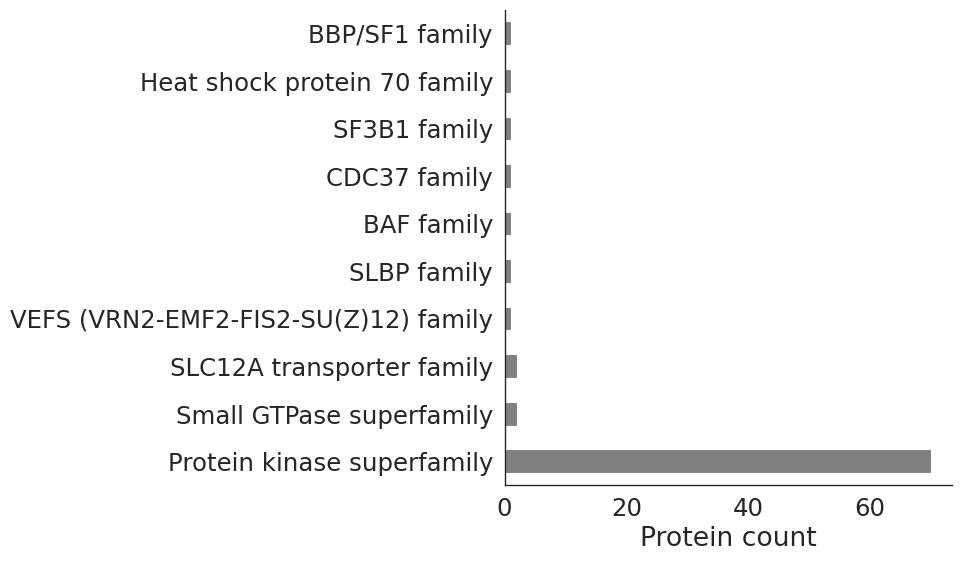

In [66]:
sns.set_context("paper",font_scale = 2)

af3fam=phosCov1.merge(Af3preds,on='ACC_ID')
af3fam=af3fam.loc[af3fam.ACC_ID.isin(protfilt)] ## furtehr down resDF is filtered 109 proteins

# Generate the plot
figplot = plt.figure(figsize=(10, 6))
top_protfam = af3fam[['ACC_ID', 'Protfam']].drop_duplicates().Protfam.value_counts().head(10)
top_protfam.plot(kind='barh',color='grey')

# Add labels and title
plt.xlabel('Protein count')
# plt.ylabel('Protein Family')
# plt.title('Top 10 Protein Families')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Save the figure
sns.despine()
plt.savefig('protfamily.svg', format='svg', dpi=1200)


     modres_sort modres_renamed
0            PTR            PTR
1            PTR            PTR
2        PTR,PTR      PTR2, PTR
3            PTR            PTR
4            PTR            PTR
...          ...            ...
2690         TPO            TPO
2691     SEP,TPO       SEP, TPO
2693         TPO            TPO
2694         TPO            TPO
2695         TPO            TPO

[1637 rows x 2 columns]


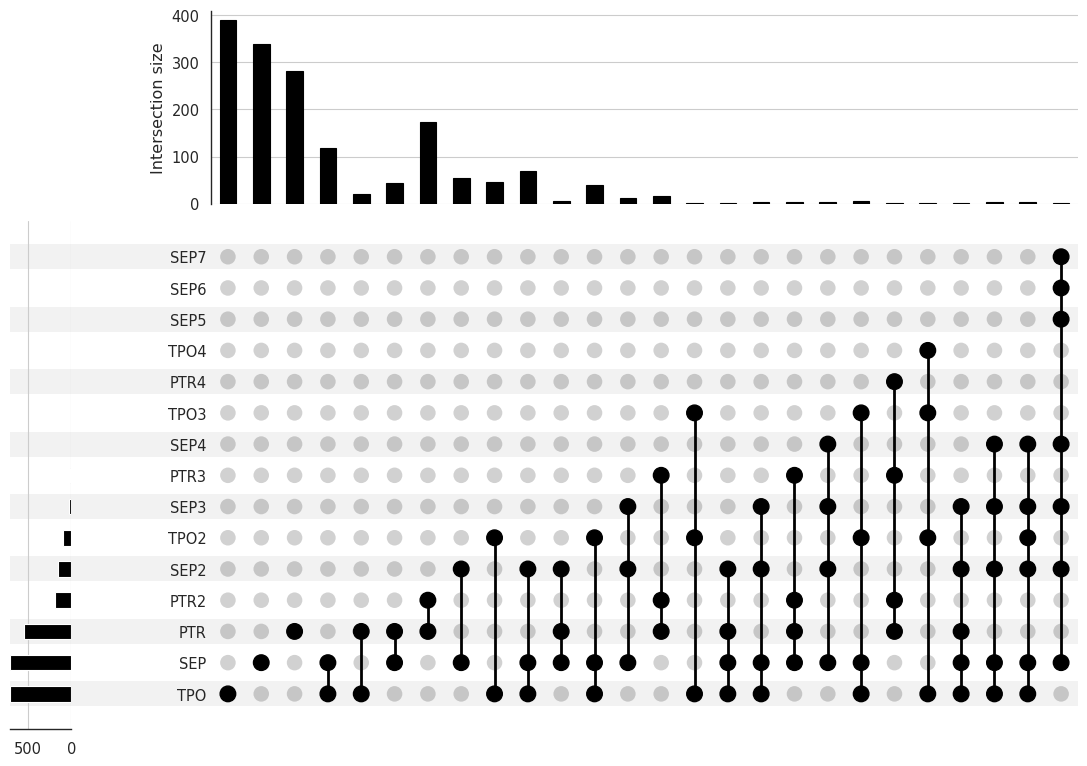

In [16]:
psites_all=phosPos_filtered[['ACC_ID','PDBID','modres']].drop_duplicates()
psites_all=psites_all[['ACC_ID','modres']]
psites_all=psites_all.loc[psites_all.ACC_ID.isin(af3fam.ACC_ID.tolist())]

from collections import Counter
import upsetplot

# Step 1: Split `modres_sort` into lists and count occurrences for each modification in each row
def sort_combinations(combination):
    # Split the combination by comma, sort the elements, and join them back together
    return ','.join(sorted(combination.split(',')))

# Apply the function to the 'Combination' column
psites_all['modres_sort'] = psites_all['modres'].apply(sort_combinations)

psites_all['modres_list'] = psites_all['modres_sort'].str.split(',')

# Step 2: Rename modifications based on occurrences
def rename_modifications(mod_list):
    count = Counter(mod_list)
    renamed_list = []
    
    for mod in mod_list:
        if count[mod] > 1:
            renamed_list.append(f"{mod}{count[mod]}")
            count[mod] -= 1
        else:
            renamed_list.append(mod)
    
    return ', '.join(renamed_list)

# Apply the renaming function
psites_all['modres_renamed'] = psites_all['modres_list'].apply(rename_modifications)

# Display the resulting DataFrame
print(psites_all[['modres_sort', 'modres_renamed']])
# Step 2: One-hot encode the `modres_renamed` column
unique_modifications = sorted(set([mod for row in psites_all['modres_renamed'] for mod in row.split(', ')]))
for mod in unique_modifications:
    psites_all[mod] = psites_all['modres_renamed'].apply(lambda x: mod in x.split(', '))

# Step 3: Aggregate by unique combinations and count occurrences
upset_ready_psites_all = psites_all[unique_modifications].groupby(unique_modifications).size().reset_index(name='count')

# Step 4: Create an UpSet plot
upset_data = upsetplot.from_memberships(
    upset_ready_psites_all[unique_modifications].apply(lambda x: tuple(x.index[x == True]), axis=1),
    data=upset_ready_psites_all['count']
)

# Plot the UpSet
upsetplot.plot(upset_data, orientation='horizontal')

# Customize plot
# plt.suptitle("UpSet Plot of Renamed modres_sort Combinations")
plt.savefig('upset_residue_PDBall.svg', format='svg', dpi=1200)
plt.show()


In [22]:
psites_all.ACC_ID.nunique()

109

In [22]:
new_df=pd.read_csv(os.path.join(pdbdir,'pdbDF_newP_NP.txt'),sep='\t')
new_df.ACC_ID.nunique()


185

In [24]:
phosPos_filtered.columns=['ACC_ID','PDBID','CHAINID','ModPosList','modpos','modres','numMod']
phosPos_filtered['PDBchain']=phosPos_filtered.PDBID+phosPos_filtered.CHAINID
phosPos_filtered

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain
0,P07949,2x2k,A,905_PTR,905,PTR,1,2x2kA
1,P07949,2x2l,A,905_PTR,905,PTR,1,2x2lA
2,P07949,4cki,A,"900_PTR,905_PTR","900,905","PTR,PTR",2,4ckiA
3,P07949,2ivt,A,905_PTR,905,PTR,1,2ivtA
4,P07949,2x2m,B,905_PTR,905,PTR,1,2x2mB
...,...,...,...,...,...,...,...,...
2694,Q13131,6c9j,A,174_TPO,174,TPO,1,6c9jA
2695,Q13131,7jij,A,174_TPO,174,TPO,1,7jijA
2696,P17252,3iw4,C,"638_TPO,657_SEP","638,657","TPO,SEP",2,3iw4C
2697,Q99683,6e2n,B,838_TPO,838,TPO,1,6e2nB


In [25]:
new_df['PDBchain']=new_df.PDBID+new_df.CHAINID
new_df

,ACC_ID,PDBID,CHAINID,P_status,PDBchain
0,O00267,6ted,Z,P,6tedZ
1,O00267,7unc,Z,P,7uncZ
2,O00267,7und,Z,P,7undZ
3,O00267,8uhd,Z,NP,8uhdZ
4,O00267,8w8e,Z,NP,8w8eZ
...,...,...,...,...,...
7704,Q9Y6E0,7b33,A,NP,7b33A
7705,Q9Y6E0,3ckw,A,NP,3ckwA
7706,Q9Y6E0,3zhp,D,NP,3zhpD
7707,Q9Y6E0,7b31,A,NP,7b31A


In [27]:
# new_df.loc[new_df.P_status=='P'].PDBID.nunique()

In [28]:
print ("Raw Pair data for proteins with phospho information\n")
print ("No.of proteins",new_df.ACC_ID.nunique())
print ("No of phospho PDBs", new_df.loc[new_df.PDBchain.isin(phosPos_filtered.PDBchain.tolist())].PDBID.nunique())
print ("No of non-Phos PDBs",new_df.loc[new_df.P_status=='NP'].PDBID.nunique() )
print ("No of P-sites",phosPos_filtered.loc[phosPos_filtered.PDBchain.isin(new_df.PDBchain.tolist())][['ACC_ID','PDBID','numMod']].drop_duplicates()['numMod'].sum(),'\n')

print ("Conformers info\n")
print ("No. of phospho conformers",phosPos_filtered.loc[phosPos_filtered.PDBchain.isin(new_df.PDBchain.tolist())][['ACC_ID','PDBID','CHAINID']].drop_duplicates().shape[0])
print ("No of P-sites conformers",phosPos_filtered.loc[phosPos_filtered.PDBchain.isin(new_df.PDBchain.tolist())][['ACC_ID','PDBID','CHAINID','numMod']].drop_duplicates()['numMod'].sum())


Raw Pair data for proteins with phospho information

No.of proteins 185
No of phospho PDBs 1327
No of non-Phos PDBs 3867
No of P-sites 2015 

Conformers info

No. of phospho conformers 2204
No of P-sites conformers 3332


In [29]:
filt_df=pd.read_csv("paired_df_str_NPall.txt",sep='\t')
filt_df["modpos_count_1"] = filt_df["newpos_1"].apply(lambda x: len(x.split(',')))
filt_df["modpos_count_2"] = filt_df["newpos_2"].apply(lambda x: len(x.split(',')))

rmsd_pairs_best=pd.read_csv("RMSD_best_structuresP_allNP.txt",sep='\t')


# Create combined columns for PDBID and CHAINID in filt_df
filt_df["PDBID_1_CHAINID_1"] = filt_df["PDBID_1"] + "_" + filt_df["CHAINID_1"]
filt_df["PDBID_2_CHAINID_2"] = filt_df["PDBID_2"] + "_" + filt_df["CHAINID_2"]

# Filter rows where either PDBID_1_CHAINID_1 or PDBID_2_CHAINID_2 is in prot1 or prot2
filtered_df = filt_df[
    filt_df["PDBID_1_CHAINID_1"].isin(rmsd_pairs_best["prot1"]) |
    filt_df["PDBID_1_CHAINID_1"].isin(rmsd_pairs_best["prot2"]) |
    filt_df["PDBID_2_CHAINID_2"].isin(rmsd_pairs_best["prot1"]) |
    filt_df["PDBID_2_CHAINID_2"].isin(rmsd_pairs_best["prot2"])
]

filtered_df

,ACC_ID,PDBID_1,CHAINID_1,MODRES_1,modpos_orig_1,P_STATUS_1,newpos_1,Resolution_1,PDBID_2,CHAINID_2,MODRES_2,modpos_orig_2,P_STATUS_2,newpos_2,Resolution_2,modpos_count_1,modpos_count_2,PDBID_1_CHAINID_1,PDBID_2_CHAINID_2
0,Q13627,6s14,A,Y,321,P,321,1.05,8t2h,A,Y,"301,321",NP,321,1.85,1,1,6s14_A,8t2h_A
1,O15530,5lvo,A,S,241,P,241,1.09,3pwy,A,S,241,NP,241,3.50,1,1,5lvo_A,3pwy_A
2,Q9UKE5,6ra7,A,"T,T","181,187",P,"181,187",1.20,8x88,B,"T,T","181,187",NP,"187,193",2.70,2,2,6ra7_A,8x88_B
3,O60674,8bxh,A,"Y,Y","1007,1008",P,"1007,1008",1.30,4bbe,A,"Y,Y","1007,1008",NP,"1007,1008",1.90,2,2,8bxh_A,4bbe_A
4,O60674,8bxh,A,"Y,Y","1007,1008",P,"1007,1008",1.30,4bbf,A,"Y,Y","1007,1008",NP,"1007,1008",2.00,2,2,8bxh_A,4bbf_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,P27577,2kmd,A,"T,S","38,41",P,"38,41",50.00,2jv3,A,"T,S","38,41",NP,"38,41",50.00,2,2,2kmd_A,2jv3_A
2714,P46108,2dvj,A,Y,221,P,221,50.00,2eyz,A,Y,221,NP,221,50.00,1,1,2dvj_A,2eyz_A
2715,P46109,2lqw,A,Y,207,P,207,50.00,2lqn,A,Y,207,NP,207,50.00,1,1,2lqw_A,2lqn_A
2716,Q61686,2rvm,A,"S,S,S,S","11,12,13,14",P,"11,12,13,14",50.00,2rvl,A,"S,S,S,S","11,12,13,14",NP,"11,12,13,14",50.00,4,4,2rvm_A,2rvl_A


In [29]:
# filtered_df[['ACC_ID','PDBID_1','CHAINID_1','modpos_count_1']].drop_duplicates()['modpos_count_1'].value_counts()

In [31]:
print ("Filtered Pair data for proteins with phospho information\n")
print ("No.of proteins",filtered_df.loc[filtered_df.ACC_ID.isin(protfilt)].ACC_ID.nunique())
print ("No of phospho PDBs", filtered_df.loc[filtered_df.ACC_ID.isin(protfilt)].PDBID_1.nunique())
print ("No of non-Phos PDBs", filtered_df.loc[filtered_df.ACC_ID.isin(protfilt)].PDBID_2.nunique() )
print ("No of P-sites",filtered_df.loc[filtered_df.ACC_ID.isin(protfilt)][['ACC_ID','PDBID_1','CHAINID_1','modpos_count_1']].drop_duplicates()['modpos_count_1'].sum())

# print ("Conformers info\n")
# print ("No. of phospho conformers",phosPos_filtered.loc[phosPos_filtered.PDBchain.isin(new_df.PDBchain.tolist())][['ACC_ID','PDBID','CHAINID']].drop_duplicates().shape[0])
# print ("No of P-sites conformers",phosPos_filtered.loc[phosPos_filtered.PDBchain.isin(new_df.PDBchain.tolist())][['ACC_ID','PDBID','CHAINID','numMod']].drop_duplicates()['numMod'].sum())


Filtered Pair data for proteins with phospho information

No.of proteins 109
No of phospho PDBs 159
No of non-Phos PDBs 1695
No of P-sites 253


### Section 2.2

In [35]:
cluster_context=pd.read_csv('cluster_context_df_with_P_NP.txt',sep='\t')
af3names=pd.read_csv('AF3_filenames.txt',sep='\t',usecols=['ACC_ID','conf_label']).drop_duplicates()
cluster_context=cluster_context.merge(af3names,on='ACC_ID')
cluster_context.ACC_ID.nunique()

112

#### How does Uniprot ID relate to protein family and cluster?

<Figure size 1000x600 with 0 Axes>

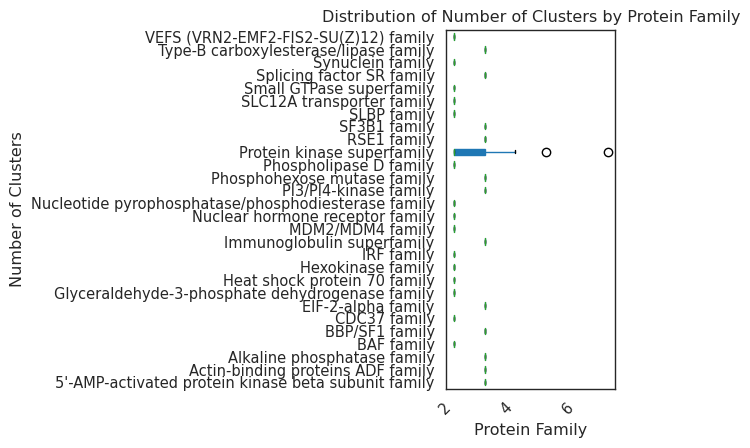

In [44]:
clusterdf=cluster_context[cluster_context.ACC_ID.isin(protfilt)]
clusterdf=clusterdf[['ACC_ID','Number_of_Clusters']].drop_duplicates()

clusterfam=clusterdf.merge(af3fam[['ACC_ID','Protfam']].drop_duplicates(),on='ACC_ID')

plt.figure(figsize=(10, 6))
clusterfam.boxplot(column="Number_of_Clusters", by="Protfam", grid=False, vert=False, patch_artist=True)
plt.title("Distribution of Number of Clusters by Protein Family")
plt.suptitle("")  # Remove default Matplotlib subtitle
plt.xlabel("Protein Family")
plt.ylabel("Number of Clusters")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

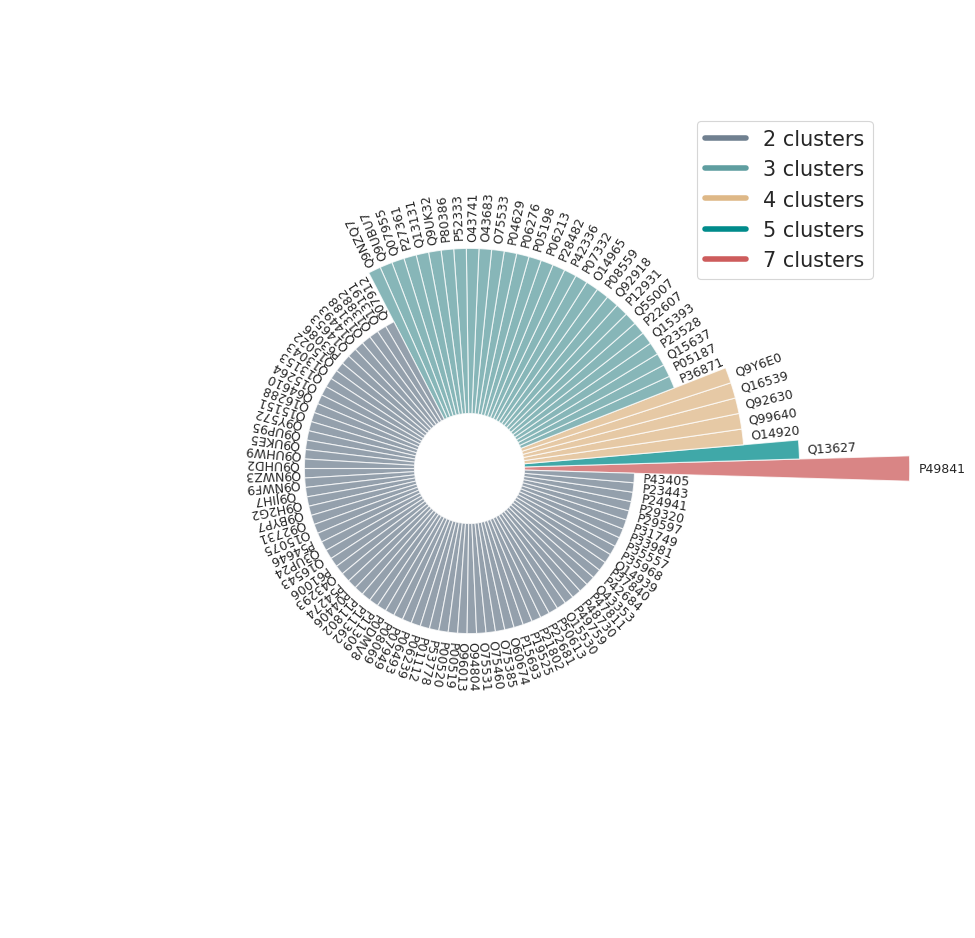

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_context("paper",font_scale = 1.7)



# Removing duplicates based on 'ACC_ID' and 'Number_of_Clusters' to get unique entries
unique_data = cluster_context[['ACC_ID', 'Number_of_Clusters']].drop_duplicates()
unique_data=unique_data.loc[unique_data.ACC_ID.isin(protfilt)]

# Sorting data for aesthetic arrangement
unique_data_sorted = unique_data.sort_values(by='Number_of_Clusters', ascending=False)

# Setting up the angles for the circular layout
num_vars = len(unique_data_sorted)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Define a color map based on the number of clusters for visual distinction
color_map = {2: 'slategrey', 3: 'cadetblue', 4: 'burlywood', 5: 'darkcyan', 7: 'indianred'}
colors = [color_map.get(clusters, 'gainsboro') for clusters in unique_data_sorted['Number_of_Clusters']]

# Creating the circular bar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Adjusting the width of each bar
bar_width = 2 * np.pi / num_vars

# Adding bars with color based on the number of clusters
bars = ax.bar(
    angles,
    unique_data_sorted['Number_of_Clusters'],
    color=colors,
    alpha=0.75,
    width=bar_width,
    bottom=1  # Adjusting bottom so the bars do not start at the center
)

# Positioning the labels just above each bar
for angle, height, label in zip(angles, unique_data_sorted['Number_of_Clusters'], unique_data_sorted['ACC_ID']):
    rotation = np.degrees(angle)  # Convert angle to degrees
    x = angle  # Angle for polar positioning
    y = height + 1.59  # Position above the bar by adding an offset
    ax.text(x, y, label, ha='center', va='center', rotation=rotation, rotation_mode='anchor', fontsize=9)

# Removing the grid and frame for a cleaner look
ax.spines['polar'].set_visible(False)
ax.grid(False)
ax.set_yticklabels([])  # Remove radial axis labels
ax.set_xticks([])  # Remove x-ticks

# Title and color legend
# plt.title('Circular Bar Plot of Unique Number of Clusters per Protein', va='bottom')
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in color_map.values()]
legend_text = [f'{count} clusters' for count in color_map.keys()]
plt.legend(legend_labels, legend_text, loc='upper right', bbox_to_anchor=(0.95, 0.89))

plt.tight_layout()
# sns.despine()

plt.savefig('sunburst.svg', format='svg', dpi=1200)
plt.show()


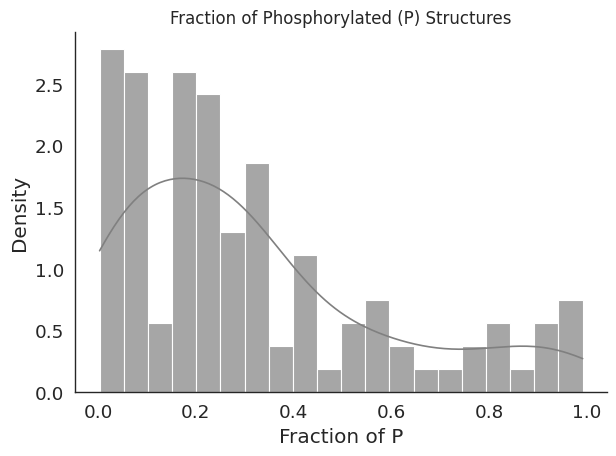

In [57]:
# Plot the histogram and density plot together
sns.set_context('paper',font_scale=1.5)

sns.histplot(pivot_df['Fraction_P'], kde=True, color='grey', bins=20, stat="density", alpha=0.7)
# Customize the plot
plt.title("Fraction of Phosphorylated (P) Structures", fontsize=12)
plt.xlabel("Fraction of P")
plt.ylabel("Density")
plt.tight_layout()
sns.despine()

# Save the plot
plt.savefig('fraction_P_with_histogram.svg', format='svg', dpi=1200)


In [424]:
sns.set_context("paper",font_scale = 1.2)
sns.set_style("white")


In [58]:
cluster_context

,ACC_ID,Cluster_ID,Cluster_Size,Number_of_Clusters,num_P_in_cluster,num_NP_in_cluster,conf_label
0,O14920,3,5,4,0,5,medium
1,O14920,4,1,4,0,1,medium
2,O14920,2,1,4,1,0,medium
3,O14920,1,5,4,1,4,medium
4,O14939,1,10,2,4,6,small
...,...,...,...,...,...,...,...
266,Q9Y572,1,4,2,0,4,medium
267,Q9Y6E0,3,42,4,25,17,large
268,Q9Y6E0,2,1,4,0,1,large
269,Q9Y6E0,1,3,4,3,0,large


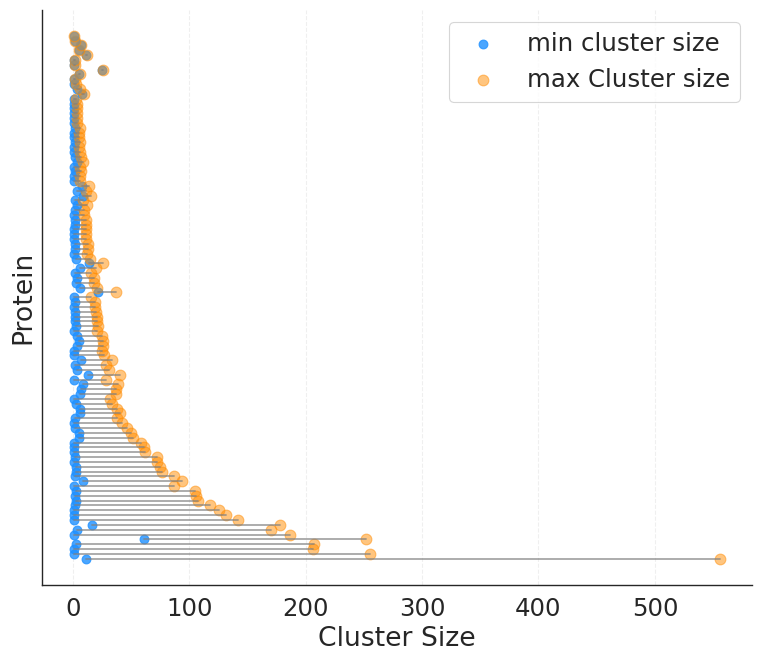

In [65]:
# Calculating min and max cluster size for each protein for the dumbbell plot
sns.set_context('paper',font_scale=2)
dumbbell_data = cluster_context.groupby('ACC_ID')['Cluster_Size'].agg(['min', 'max']).reset_index()
dumbbell_data=dumbbell_data.loc[dumbbell_data.ACC_ID.isin(protfilt)]

# Sorting by range of cluster sizes for better flow
dumbbell_data['range'] = dumbbell_data['max'] - dumbbell_data['min']
dumbbell_data = dumbbell_data.sort_values(by='range', ascending=False)

# Plotting the refined Dumbbell Plot
plt.figure(figsize=(8, 7))
for idx, row in dumbbell_data.iterrows():
    # Draw line with more transparency and reduced thickness
    plt.plot([row['min'], row['max']], [row['ACC_ID'], row['ACC_ID']], color='gray', linestyle='-', linewidth=1.3, alpha=0.7)
    # Plot min and max points with smaller, semi-transparent markers
    plt.scatter(row['min'], row['ACC_ID'], color='dodgerblue', s=40, alpha=0.8, label="min cluster size" if idx == 0 else "")
    plt.scatter(row['max'], row['ACC_ID'], color='darkorange', s=60, alpha=0.5, label="max Cluster size" if idx == 0 else "")

# Adding plot details with less prominent grid lines and tilted y-axis labels
# plt.title('Refined Dumbbell Plot of Min and Max Cluster Sizes per Protein')
plt.xlabel('Cluster Size')
plt.ylabel('Protein')
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.3)  # Lighten grid lines
# plt.yticks(fontsize=6)  # Adjust y-axis label size for clarity
plt.yticks([],[])
plt.tight_layout()
sns.despine()

plt.savefig('dumbell_cluster.svg', format='svg', dpi=1200)
plt.show()


In [58]:
import pandas as pd

rmsd_10=pd.read_csv('Proteome_RMSD_AF-PDB_pairs_10.txt',sep='\t')
rmsd_l10=pd.read_csv('Proteome_RMSD_AF-PDB_pairs_less10.txt',sep='\t')

rmsd_all=pd.concat([rmsd_10,rmsd_l10],ignore_index=True)
pdbdf_new=pd.read_csv('pdbDF_newP_NP.txt',sep='\t')

# Step 1: Filter out rows containing 'AF3' or 'F1-model_v4' in prot1 or prot2
filtered_rmsd_all = rmsd_all[~rmsd_all['prot1'].str.contains('AF3|F1-model_v4') & 
                             ~rmsd_all['prot2'].str.contains('AF3|F1-model_v4')].copy()

filtered_rmsd_all

# Step 2: Create a dictionary for PDBID__CHAINID to P_status mapping from pdbdf_new
pdbdf_new['PDBID_CHAINID'] = pdbdf_new['PDBID'] + '__' + pdbdf_new['CHAINID']
pdb_status_map = pdbdf_new.set_index('PDBID_CHAINID')['P_status'].to_dict()

# Step 3: Extract PDBID__CHAINID format for prot1 and prot2, then map P_status
filtered_rmsd_all['prot1_key'] = filtered_rmsd_all['prot1']
filtered_rmsd_all['prot2_key'] = filtered_rmsd_all['prot2']

# Map P_status to prot1 and prot2 using the dictionary
filtered_rmsd_all['P_status1'] = filtered_rmsd_all['prot1_key'].map(pdb_status_map)
filtered_rmsd_all['P_status2'] = filtered_rmsd_all['prot2_key'].map(pdb_status_map)

# Dropping intermediate columns used for mapping
filtered_rmsd_all.drop(columns=['prot1_key', 'prot2_key'], inplace=True)

# Displaying the resulting DataFrame
filtered_rmsd_all[['ACC_ID', 'prot1', 'prot2', 'TM_RMSD', 'PDBsup_RMSD', 'P_status1', 'P_status2']]


,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2
0,O14920,4kik__A,4e3c__D,2.12,2.73,P,NP
1,O14920,4kik__A,4e3c__C,2.31,2.82,P,NP
2,O14920,4kik__A,8omv__C,2.46,2.50,P,NP
3,O14920,4kik__A,4kik__B,1.75,2.36,P,P
4,O14920,4kik__A,8omv__D,2.19,2.13,P,NP
...,...,...,...,...,...,...,...
489874,Q9Y572,7mx3__B,7mx3__A,0.97,0.94,NP,NP
489875,Q9Y572,7mx3__A,7mx3__C,0.64,0.64,NP,NP
489876,Q9Y572,7mx3__B,7mon__B,1.83,2.12,NP,P
489877,Q9Y572,7mon__B,7mx3__C,1.83,1.98,P,NP


In [732]:
rmsd_summary[rmsd_summary.max_PDBsup_RMSD==46.73]

,ACC_ID,max_TM_RMSD,min_TM_RMSD,max_PDBsup_RMSD,min_PDBsup_RMSD
30,P07358,3.13,3.13,46.73,46.73


In [60]:
cluster_context_df=pd.read_csv("cluster_context_df_with_P_NP.txt", sep='\t')
cluster_context_df

In [61]:
# Calculating number_of_clusterP_NP for each ACC_ID
cluster_pnp=cluster_context_df.copy()
cluster_pnp['has_P_and_NP'] = (cluster_pnp['num_P_in_cluster'] > 0) & (cluster_pnp['num_NP_in_cluster'] > 0)
cluster_pnp_grp = cluster_pnp.groupby('ACC_ID').agg(number_of_clusterP_NP=('has_P_and_NP', 'sum')).reset_index()

cluster_pnp_grp=cluster_pnp_grp.merge(cluster_context_df, on='ACC_ID')
cluster_pnp_grp['P_NP_fraction']=cluster_pnp_grp.number_of_clusterP_NP/cluster_pnp_grp.Number_of_Clusters*100
cluster_pnp_grp=cluster_pnp_grp[['ACC_ID','Number_of_Clusters','P_NP_fraction']].drop_duplicates()
cluster_pnp_grp


,ACC_ID,Number_of_Clusters,P_NP_fraction
0,O14920,4,25.0
4,O14939,2,50.0
6,O14965,3,100.0
9,O15075,2,50.0
11,O15151,2,50.0
...,...,...,...
259,Q9UKE5,2,50.0
261,Q9UP95,2,50.0
263,Q9Y478,2,50.0
265,Q9Y572,2,0.0


In [70]:
cluster_pnp_grp.ACC_ID.nunique()

112

In [72]:
cluster_pnp_grp[cluster_pnp_grp.ACC_ID.isin(protfilt)].P_NP_fraction.value_counts().reset_index()

,index,P_NP_fraction
0,50.000000,57
1,33.333333,22
2,100.000000,11
3,0.000000,10
4,25.000000,4
5,66.666667,3
6,28.571429,1
7,20.000000,1


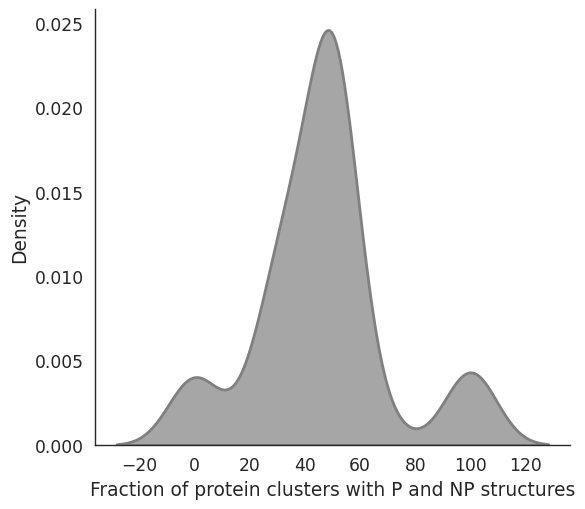

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_context('paper',font_scale=1.4)
sns.set_style('white')
# Plotting a density plot for P_NP_fraction
plt.figure(figsize=(6, 5.3))
sns.kdeplot(cluster_pnp_grp[cluster_pnp_grp.ACC_ID.isin(protfilt)].P_NP_fraction, fill=True, color='grey', alpha=0.7, linewidth=2)

# Customizing the plot
# plt.title('Density Plot of P_NP Fraction', fontsize=16, weight='bold')
plt.xlabel('Fraction of protein clusters with P and NP structures')
plt.ylabel('Density')
sns.despine()
plt.tight_layout()

# plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.savefig('density_PNPcluster.svg', format='svg', dpi=1200)

plt.show()



/tmp/ipykernel_89/1768199881.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = cluster_filt.pivot("ACC_ID", "Cluster_ID", "Cluster_Size").fillna(0)


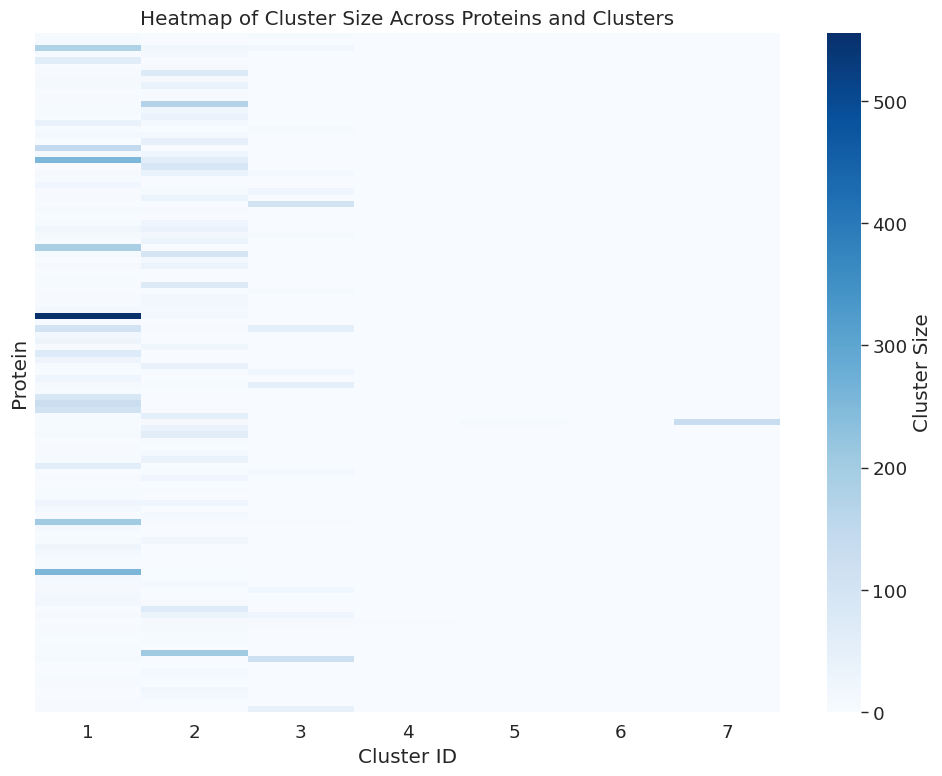

In [81]:
import seaborn as sns

# Pivoting data for heatmap format: Proteins as rows and Cluster_IDs as columns with Cluster_Size as values

cluster_filt=cluster_context.loc[cluster_context.Number_of_Clusters<=15]
cluster_filt=cluster_filt[cluster_filt.ACC_ID.isin(protfilt)]
heatmap_data = cluster_filt.pivot("ACC_ID", "Cluster_ID", "Cluster_Size").fillna(0)

# Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Cluster Size'})
plt.title('Heatmap of Cluster Size Across Proteins and Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Protein')
plt.yticks([],[])
plt.tight_layout()
plt.savefig('heatmapall.svg', format='svg', dpi=1200)

plt.show()


In [205]:
cluster_context_df_with

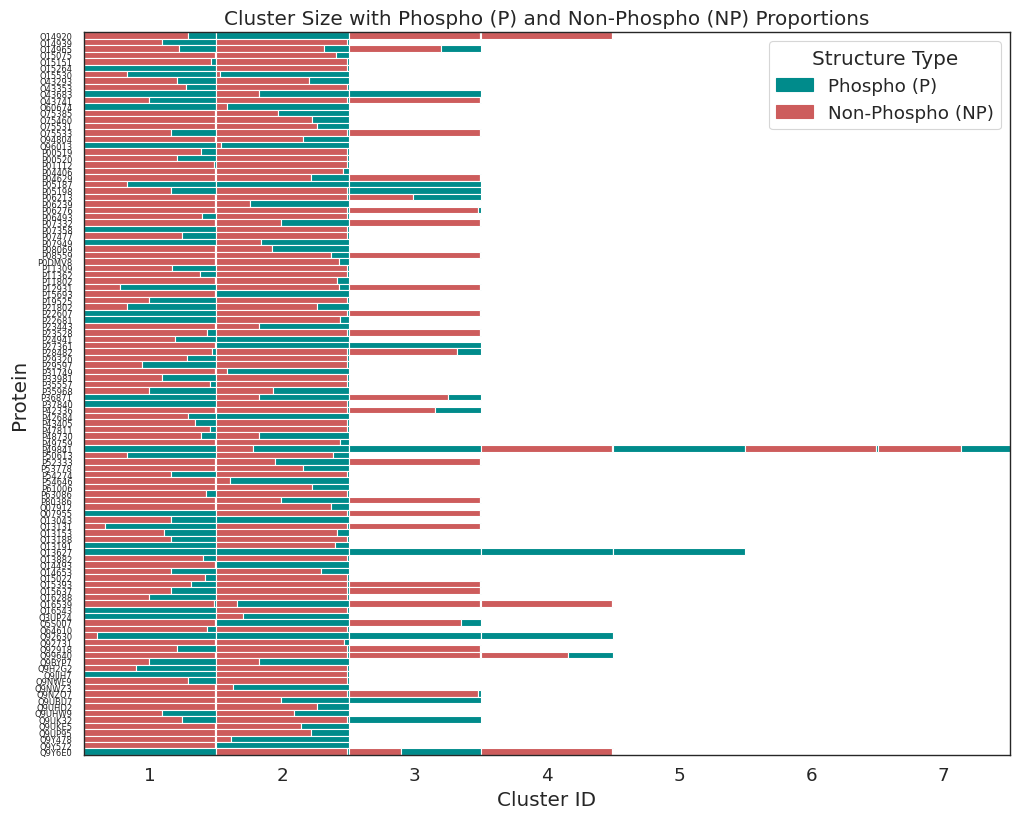

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

sns.set_style('white')

# Pivot the DataFrame for the heatmap
heatmap_data_pre=cluster_context_df[cluster_context_df.ACC_ID.isin(protfilt)]
heatmap_data = cluster_context_df.pivot(index='ACC_ID', columns='Cluster_ID', values='Cluster_Size').fillna(0)

# Get the unique proteins and clusters for plotting purposes
proteins = heatmap_data.index
clusters = heatmap_data.columns

# Define fixed colors for P and NP
p_color = 'darkcyan'
np_color = 'indianred'

# Define a small value to ensure minimum visibility for very small proportions
epsilon = 0.01

# Set up figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through each cell in the heatmap
for i, protein in enumerate(proteins):
    for j, cluster_id in enumerate(clusters):
        # Get cluster data
        cell_data = heatmap_data.loc[protein, cluster_id]
        
        if cell_data > 0:  # Only plot if there's a cluster size
            # Get the corresponding row in the original dataframe for P and NP counts
            row = cluster_context_df[(cluster_context_df['ACC_ID'] == protein) & (cluster_context_df['Cluster_ID'] == cluster_id)]
            if not row.empty:
                num_p = row['num_P_in_cluster'].values[0]
                num_np = row['num_NP_in_cluster'].values[0]
                
                # Calculate proportions with a minimum threshold (epsilon) for visibility
                total = num_p + num_np
                p_proportion = (num_p / total) + epsilon if total > 0 else 0
                np_proportion = (num_np / total) + epsilon if total > 0 else 0
                
                # Ensure proportions do not exceed 1 due to epsilon
                p_proportion = min(p_proportion, 1.0)
                np_proportion = min(np_proportion, 1.0 - p_proportion)
                
                # Draw NP part of the cell (left side)
                ax.add_patch(patches.Rectangle((j, i), np_proportion, 1, color=np_color, ec='white'))
                
                # Draw P part of the cell (right side)
                ax.add_patch(patches.Rectangle((j + np_proportion, i), p_proportion, 1, color=p_color, ec='white'))

# Formatting the plot
ax.set_xlim(0, len(clusters))
ax.set_ylim(0, len(proteins))
ax.set_xticks(np.arange(len(clusters)) + 0.5)
ax.set_xticklabels(clusters, rotation=0, ha='center')
ax.set_yticks(np.arange(len(proteins)) + 0.5)
ax.set_yticklabels(proteins, fontsize=6)
# ax.set_yticklabels([])

ax.invert_yaxis()

# Adjust the aspect ratio to fill the figure area without squishing cells
ax.set_aspect('auto')

# Add labels and title
plt.xlabel("Cluster ID")
plt.ylabel("Protein")
plt.title("Cluster Size with Phospho (P) and Non-Phospho (NP) Proportions")

# Create a custom legend for P and NP
p_patch = patches.Patch(color=p_color, label='Phospho (P)')
np_patch = patches.Patch(color=np_color, label='Non-Phospho (NP)')
plt.legend(handles=[p_patch, np_patch], title="Structure Type", loc="upper right")

plt.tight_layout(pad=0)
plt.savefig('heatmap_PNP.svg', format='svg', dpi=1200)

plt.show()


In [62]:
import numpy as np

# Define a function to compute the max and min RMSD values for each category
def get_rmsd_stats(group):
    result = {}
    for status in ['P-P', 'NP-NP', 'Mixed']:
        if status == 'P-P':
            subset = group[(group['P_status1'] == 'P') & (group['P_status2'] == 'P')]
        elif status == 'NP-NP':
            subset = group[(group['P_status1'] == 'NP') & (group['P_status2'] == 'NP')]
        else:
            subset = group[(group['P_status1'] != group['P_status2']) & (group['P_status1'].isin(['P', 'NP'])) & (group['P_status2'].isin(['P', 'NP']))]
        
        if not subset.empty:
            result[f'{status}_TM_RMSD_max'] = subset['TM_RMSD'].max()
            result[f'{status}_TM_RMSD_min'] = subset['TM_RMSD'].min()
            result[f'{status}_PDBsup_RMSD_max'] = subset['PDBsup_RMSD'].max()
            result[f'{status}_PDBsup_RMSD_min'] = subset['PDBsup_RMSD'].min()
        else:
            result[f'{status}_TM_RMSD_max'] = np.nan
            result[f'{status}_TM_RMSD_min'] = np.nan
            result[f'{status}_PDBsup_RMSD_max'] = np.nan
            result[f'{status}_PDBsup_RMSD_min'] = np.nan
    return pd.Series(result)

# Group by 'ACC_ID' and apply the function to get the desired statistics
rmsd_stats_df = filtered_rmsd_all.groupby('ACC_ID').apply(get_rmsd_stats).reset_index()

# Display the resulting DataFrame
rmsd_stats_df


,ACC_ID,P-P_TM_RMSD_max,P-P_TM_RMSD_min,P-P_PDBsup_RMSD_max,P-P_PDBsup_RMSD_min,NP-NP_TM_RMSD_max,NP-NP_TM_RMSD_min,NP-NP_PDBsup_RMSD_max,NP-NP_PDBsup_RMSD_min,Mixed_TM_RMSD_max,Mixed_TM_RMSD_min,Mixed_PDBsup_RMSD_max,Mixed_PDBsup_RMSD_min
0,O14920,1.75,1.75,2.36,2.36,3.04,0.80,3.63,0.80,3.30,1.44,3.80,1.44
1,O14939,0.44,0.25,0.44,0.25,0.86,0.26,0.83,0.26,0.96,0.48,0.78,0.36
2,O14965,2.83,0.09,7.37,0.09,2.77,0.00,9.53,0.00,2.94,0.14,8.96,0.14
3,O15075,NaN,NaN,NaN,NaN,2.57,0.34,2.93,0.38,1.93,0.88,1.97,0.88
4,O15151,0.29,0.29,0.29,0.29,2.66,0.02,5.41,0.02,2.41,0.41,2.79,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Q9UKE5,1.72,0.60,1.75,0.62,3.33,0.30,3.58,0.30,3.70,0.65,5.30,0.65
108,Q9UP95,0.54,0.00,0.54,0.00,2.65,0.00,3.73,0.00,2.58,0.45,3.27,0.46
109,Q9Y478,1.57,0.35,1.86,0.38,1.69,0.45,4.34,0.45,2.04,0.46,4.51,0.46
110,Q9Y572,NaN,NaN,NaN,NaN,0.98,0.64,0.98,0.64,1.91,1.83,2.21,1.98


In [4]:
nonull_df=rmsd_stats_df.loc[~rmsd_stats_df['P-P_TM_RMSD_max'].isnull()]



In [5]:
## RMSD of all pairs in P vs P and Np vs NP and P vs NP

P_P=filtered_rmsd_all[(filtered_rmsd_all['P_status1'] == 'P') & (filtered_rmsd_all['P_status2'] == 'P')]
NP_NP=filtered_rmsd_all[(filtered_rmsd_all['P_status1'] == 'NP') & (filtered_rmsd_all['P_status2'] == 'NP')]
P_NP=filtered_rmsd_all[(filtered_rmsd_all['P_status1'] != filtered_rmsd_all['P_status2']) & (filtered_rmsd_all['P_status1'].isin(['P', 'NP'])) & (filtered_rmsd_all['P_status2'].isin(['P', 'NP']))]


P_P['label']='P-P'
NP_NP['label']='NP-NP'
P_NP['label']='P-NP'

combined_df5=pd.concat([P_P,NP_NP,P_NP],ignore_index=True)

combined_df5=combined_df5.loc[combined_df5.ACC_ID.isin(protfilt)]
combined_df5

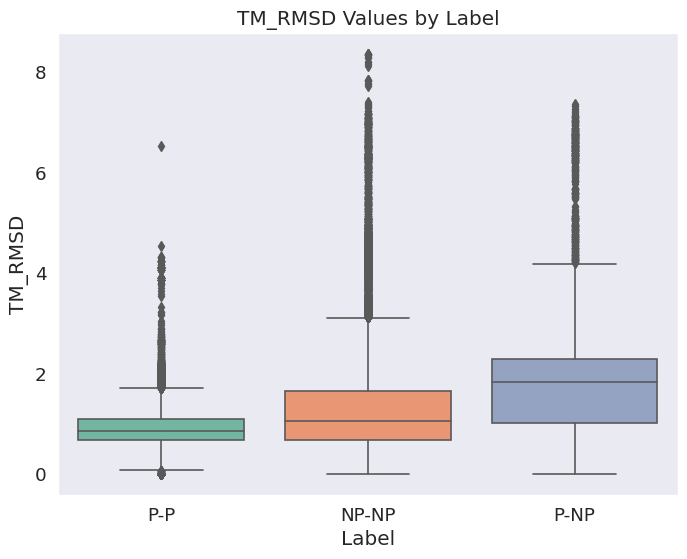

In [103]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df5, x='label', y='TM_RMSD', palette="Set2")

# Customize plot
plt.title('TM_RMSD Values by Label')
plt.xlabel('Label')
plt.ylabel('TM_RMSD')

plt.show()

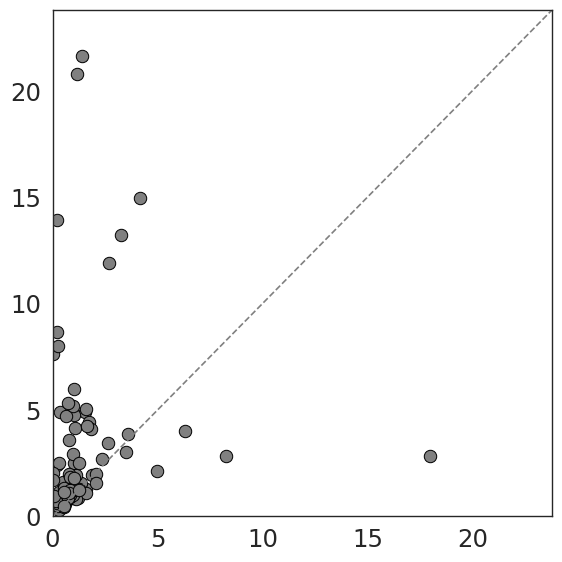

In [69]:
# Group by ACC_ID and label, calculating the median TM_RMSD for each group
sns.set_context("paper", font_scale=2)
sns.set_style("white")
median_rmsd_df = combined_df5.groupby(['ACC_ID', 'label'], as_index=False)['PDBsup_RMSD'].median()

# Pivot the data so that each ACC_ID has separate columns for each label's median TM_RMSD
pivot_df = median_rmsd_df.pivot(index='ACC_ID', columns='label', values='PDBsup_RMSD').reset_index()

# Drop rows with NaN values (missing P-P or P-NP)
pivot_df = pivot_df.dropna(subset=['P-P', 'P-NP'])

# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot with transparency and adjusted marker size
sns.scatterplot(data=pivot_df, x='P-P', y='P-NP', s=80, color='gray', edgecolor='black')

# Get the combined maximum value of both axes
max_val = max(pivot_df['P-P'].max(), pivot_df['P-NP'].max())

# Set axis limits explicitly from 0 to max_val + buffer
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)

# Add a diagonal line from corner to corner
plt.plot([0, max_val * 1.1], [0, max_val * 1.1], linestyle='--', color='gray')

# Customize the plot
# plt.xlabel('Median RMSD (Å) between all phospho conformers',fontsize=14.5) #fontsize=9.5
# plt.ylabel('Median RMSD (Å) between phospho and non-phospho conformers',fontsize=14.5)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('scatter_P_NP.svg', format='svg', dpi=1200)


plt.show()


In [774]:
combined_df5.ACC_ID.nunique()

109

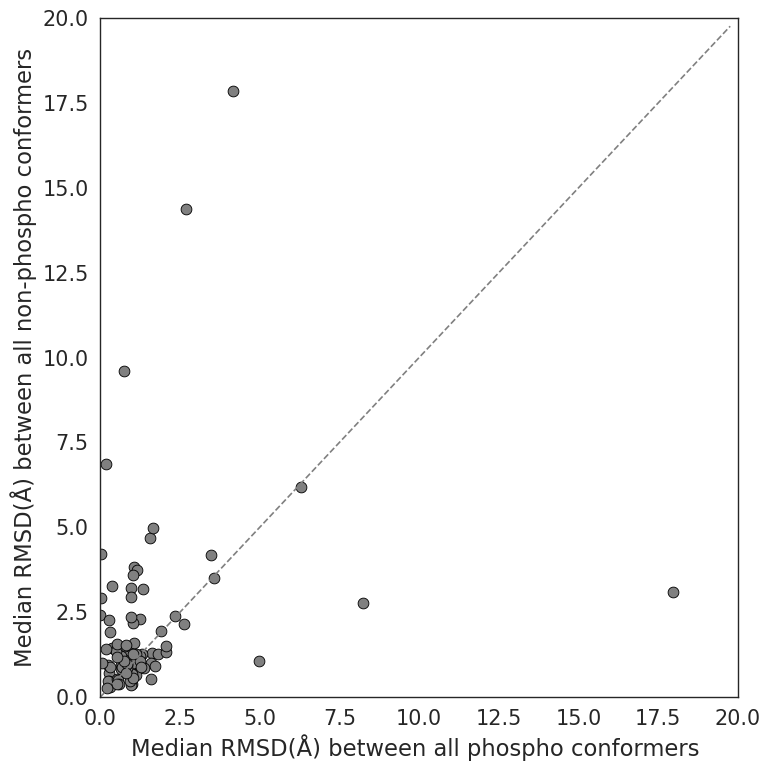

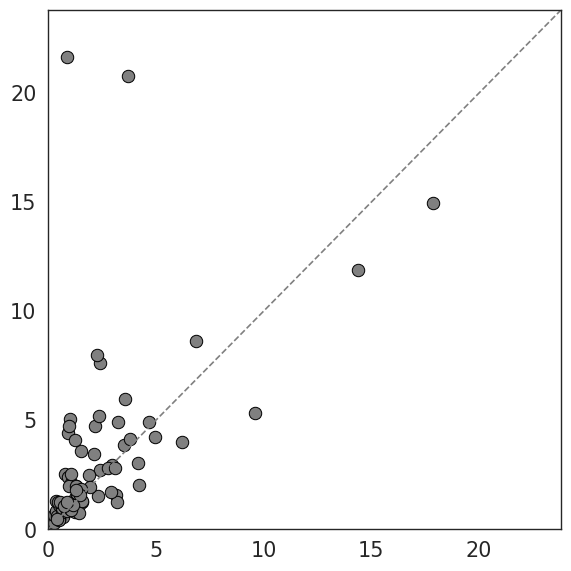

In [70]:
# Group by ACC_ID and label, calculating the median TM_RMSD for each group
# median_rmsd_df = combined_df5.groupby(['ACC_ID', 'label'], as_index=False)['TM_RMSD'].median()

# Pivot the data so that each ACC_ID has separate columns for each label's median TM_RMSD
# pivot_df = median_rmsd_df.pivot(index='ACC_ID', columns='label', values='TM_RMSD').reset_index()

# Plotting
sns.set_context("paper", font_scale=1.7)
sns.set_style("white")
plt.figure(figsize=(8, 8))
# sns.set_style('dark')

# Scatter plot with 'P-P' on x-axis and 'P-NP' on y-axis
sns.scatterplot(data=pivot_df, x='P-P', y='NP-NP', s=60, color='gray', edgecolor='black')

# Add a diagonal line y = x for reference
max_val = max(pivot_df['P-P'].max(), pivot_df['NP-NP'].max())
# Set axis limits explicitly from 0 to max_val + buffer
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)

# Add a diagonal line from corner to corner
plt.plot([0, max_val * 1.1], [0, max_val * 1.1], linestyle='--', color='gray')

# Customize the plot
# plt.title('Comparison of Median TM_RMSD Values: P-P vs NP-NP')
plt.xlabel('Median RMSD(Å) between all phospho conformers ')
plt.ylabel('Median RMSD(Å) between all non-phospho conformers')
plt.ylim(0,20)
plt.xlim(0,20)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_Pall_NPall.svg', format='svg', dpi=1200)


plt.show()


# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot with 'P-P' on x-axis and 'P-NP' on y-axis
sns.scatterplot(data=pivot_df, y='P-NP', x='NP-NP', s=80, color='gray', edgecolor='black')

# Add a diagonal line y = x for reference
max_val = max(pivot_df['P-NP'].max(), pivot_df['NP-NP'].max())
# Set axis limits explicitly from 0 to max_val + buffer
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)

# Add a diagonal line from corner to corner
plt.plot([0, max_val * 1.1], [0, max_val * 1.1], linestyle='--', color='gray')
# Customize the plot
# plt.title('Comparison of Median TM_RMSD Values: P-NP vs NP-NP')
# plt.xlabel('Median RMSD(Å) between phospho and non-phospho conformers')
plt.xlabel('')
plt.ylabel('')
# plt.ylabel('Median RMSD(Å) between all non-phospho conformers')
# plt.grid(False, linestyle='--', alpha=0.5)
# plt.ylim(0,20)
# plt.xlim(0,20)
plt.tight_layout()
plt.savefig('scatter_PnP_NPall_1.svg', format='svg', dpi=1200)

plt.show()



## Mean


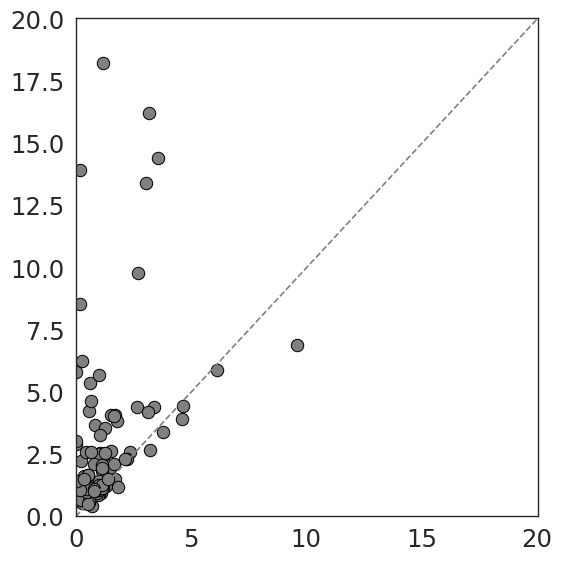

In [66]:
# Group by ACC_ID and label, calculating the median TM_RMSD for each group
sns.set_context("paper", font_scale=2)
sns.set_style("white")
mean_rmsd_df = combined_df5.groupby(['ACC_ID', 'label'], as_index=False)['PDBsup_RMSD'].mean()

# Pivot the data so that each ACC_ID has separate columns for each label's median TM_RMSD
pivot_df = mean_rmsd_df.pivot(index='ACC_ID', columns='label', values='PDBsup_RMSD').reset_index()

# Drop rows with NaN values (missing P-P or P-NP)
pivot_df = pivot_df.dropna(subset=['P-P', 'P-NP'])

# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot with transparency and adjusted marker size
sns.scatterplot(data=pivot_df, x='P-P', y='P-NP', s=80, color='gray', edgecolor='black')

# Get the combined maximum value of both axes
max_val = max(pivot_df['P-P'].max(), pivot_df['P-NP'].max())

# Set axis limits explicitly from 0 to max_val + buffer
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)

# Add a diagonal line from corner to corner
plt.plot([0, max_val * 1.1], [0, max_val * 1.1], linestyle='--', color='gray')

# Customize the plot
# plt.xlabel('Median RMSD (Å) between all phospho conformers',fontsize=14.5) #fontsize=9.5
# plt.ylabel('Median RMSD (Å) between phospho and non-phospho conformers',fontsize=14.5)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
# plt.savefig('scatter_P_NP.svg', format='svg', dpi=1200)


plt.show()


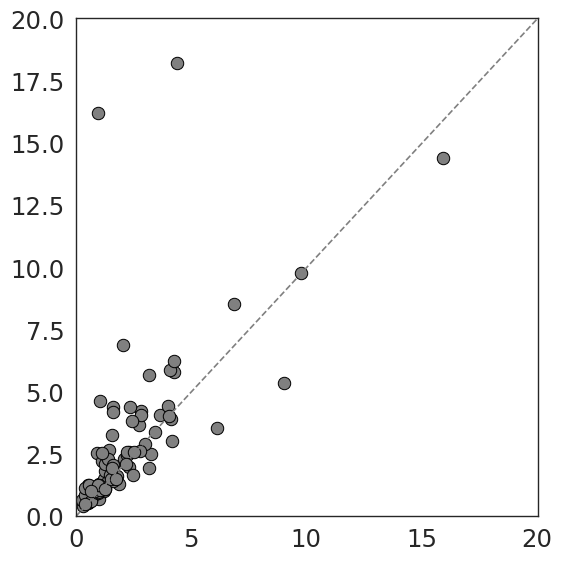

In [68]:
# Group by ACC_ID and label, calculating the median TM_RMSD for each group
# median_rmsd_df = combined_df5.groupby(['ACC_ID', 'label'], as_index=False)['TM_RMSD'].median()

# Pivot the data so that each ACC_ID has separate columns for each label's median TM_RMSD
# pivot_df = median_rmsd_df.pivot(index='ACC_ID', columns='label', values='TM_RMSD').reset_index()




# Plotting
plt.figure(figsize=(6, 6))

# Scatter plot with 'P-P' on x-axis and 'P-NP' on y-axis
sns.scatterplot(data=pivot_df, y='P-NP', x='NP-NP', s=80, color='gray', edgecolor='black')

# Add a diagonal line y = x for reference
max_val = max(pivot_df['P-NP'].max(), pivot_df['NP-NP'].max())
# Set axis limits explicitly from 0 to max_val + buffer
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)

# Add a diagonal line from corner to corner
plt.plot([0, max_val * 1.1], [0, max_val * 1.1], linestyle='--', color='gray')
# Customize the plot
# plt.title('Comparison of Median TM_RMSD Values: P-NP vs NP-NP')
# plt.xlabel('Median RMSD(Å) between phospho and non-phospho conformers')
plt.xlabel('')
plt.ylabel('')
# plt.ylabel('Median RMSD(Å) between all non-phospho conformers')
# plt.grid(False, linestyle='--', alpha=0.5)
# plt.ylim(0,20)
# plt.xlim(0,20)
plt.tight_layout()
# plt.savefig('scatter_PnP_NPall.svg', format='svg', dpi=1200)

plt.show()



In [6]:
import pandas as pd
import numpy as np



# Initialize a list to store CDS for each protein
cds_list = []

# Group by protein (ACC_ID) to calculate CDS for each
for acc_id, group in cluster_context_df.groupby('ACC_ID'):
    total_cluster_size = group['Cluster_Size'].sum()  # Total size of all clusters for normalization
    
    # Calculate the entropy-based CDS
    entropy_sum = 0
    for size in group['Cluster_Size']:
        proportion = size / total_cluster_size
        if proportion > 0:  # Avoid log(0)
            entropy_sum += proportion * np.log(proportion)
    
    # CDS is the negative of entropy_sum to make it positive
    cds = -entropy_sum
    
    # Append the results
    cds_list.append({'ACC_ID': acc_id, 'CDS': cds})

# Create a DataFrame for the CDS results
cds_df = pd.DataFrame(cds_list)




In [142]:
import pandas as pd
import numpy as np

# Define the minimum threshold for weight adjustment
THRESHOLD = 0.3

# Initialize a list to store Adjusted Phospho-CDS for each protein
adjusted_cds_list = []

# Group by protein (ACC_ID) to calculate the Adjusted Phospho-CDS for each
for acc_id, group in cluster_context_df.groupby('ACC_ID'):
    total_cluster_size = group['Cluster_Size'].sum()  # Total size of all clusters for normalization
    
    # Calculate the adjusted phospho-CDS
    entropy_sum = 0
    for _, row in group.iterrows():
        # Calculate proportion of this cluster relative to the total size
        cluster_proportion = row['Cluster_Size'] / total_cluster_size
        
        # Calculate proportions of phospho and non-phospho structures within this cluster
        num_p = row['num_P_in_cluster']
        num_np = row['num_NP_in_cluster']
        cluster_size = row['Cluster_Size']
        
        if cluster_size > 0:  # Avoid division by zero
            p_proportion = num_p / cluster_size  # Proportion of phospho
            np_proportion = num_np / cluster_size  # Proportion of non-phospho
            
            # Calculate the weight with thresholding
            weight = max(1 - abs(p_proportion - 0.5), THRESHOLD)
            
            # Calculate the entropy component for phospho and non-phospho
            if p_proportion > 0:  # Avoid log(0)
                entropy_sum += cluster_proportion * weight * p_proportion * np.log(p_proportion)
            if np_proportion > 0:  # Avoid log(0)
                entropy_sum += cluster_proportion * weight * np_proportion * np.log(np_proportion)
    
    # Adjusted Phospho-CDS is the negative of entropy_sum to make it positive
    adjusted_cds = -entropy_sum
    
    # Append the results
    adjusted_cds_list.append({'ACC_ID': acc_id, 'Adjusted_Phospho_CDS': adjusted_cds})

# Create a DataFrame for the Adjusted Phospho-CDS results
adjusted_cds_df = pd.DataFrame(adjusted_cds_list)
print(adjusted_cds_df)


     ACC_ID  Adjusted_Phospho_CDS
0    O14920              0.145951
1    O14939              0.550646
2    O14965              0.442866
3    O15075              0.125491
4    O15151              0.075641
..      ...                   ...
107  Q9UKE5              0.500300
108  Q9UP95              0.383123
109  Q9Y478              0.198300
110  Q9Y572             -0.000000
111  Q9Y6E0              0.545660

[112 rows x 2 columns]


In [143]:
adjusted_cds_df.head(10)

,ACC_ID,Adjusted_Phospho_CDS
0,O14920,0.145951
1,O14939,0.550646
2,O14965,0.442866
3,O15075,0.125491
4,O15151,0.075641
5,O15264,-0.000000
6,O15530,0.105292
7,O43293,0.470069
8,O43353,0.071731
9,O43683,0.265214


In [146]:
cds_merged.ACC_ID.nunique()

109

In [145]:
cds_merged=cds_df.merge(adjusted_cds_df,on='ACC_ID')
cds_merged=cds_merged.loc[cds_merged.ACC_ID.isin(protfilt)]
cds_merged.loc[cds_merged.CDS>cds_merged.Adjusted_Phospho_CDS].head(20)

,ACC_ID,CDS,Adjusted_Phospho_CDS
0,O14920,1.143708,0.145951
2,O14965,0.601750,0.442866
3,O15075,0.562335,0.125491
4,O15151,0.082565,0.075641
5,O15264,0.529706,-0.000000
6,O15530,0.159916,0.105292
7,O43293,0.693147,0.470069
8,O43353,0.482578,0.071731
9,O43683,1.011404,0.265214
10,O43741,0.974315,0.346574


In [ ]:
cds_merged.to_csv('CDS_merged.txt',sep='\t',index=False)

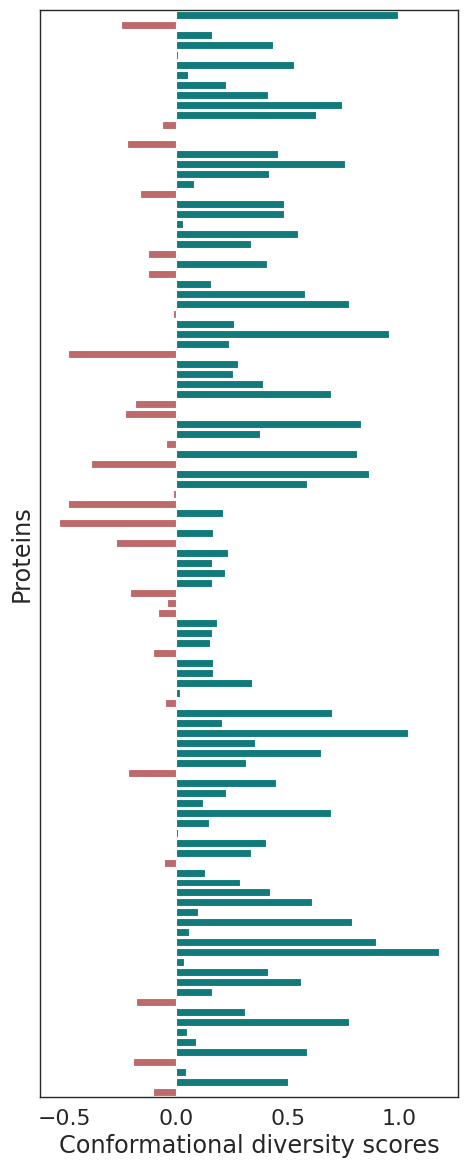

In [187]:
# Calculate the absolute difference
sns.set_style('white')
cds_merged['cds_diff'] = (cds_merged['CDS'] - cds_merged['Adjusted_Phospho_CDS'])
sns.set_context('paper',font_scale=1.8)
plt.subplots(figsize=(5, 12))
# Draw the barplot, using positive and negative colors for cds_diff
barplot = sns.barplot(
    data=cds_merged, 
    y='ACC_ID', 
    x='cds_diff', 
    palette=['indianred' if val < 0 else 'darkcyan' for val in cds_merged['cds_diff']]
)

# Add labels and customize the plot
# plt.title("CDS upon phosphorylation")
plt.ylabel("Proteins")
plt.yticks([],[])
plt.xlabel("Conformational diversity scores")

# Display the plot
plt.tight_layout()
plt.savefig('CDS_scores.svg', format='svg', dpi=1200)

plt.show()

In [2]:
import pandas as pd
cds_merged=pd.read_csv('CDS_merged.txt',sep='\t')

In [3]:
cds_merged.loc[cds_merged.ACC_ID=='P28482']

,ACC_ID,CDS,Adjusted_Phospho_CDS,abs_diff,cds_diff
49,P28482,0.721135,0.131852,0.589282,0.589282


In [4]:
cds_merged.loc[cds_merged.ACC_ID=='P04406']

,ACC_ID,CDS,Adjusted_Phospho_CDS,abs_diff,cds_diff
21,P04406,0.107509,0.078368,0.029141,0.029141


In [5]:
cds_merged.loc[cds_merged.ACC_ID=='P07949']

,ACC_ID,CDS,Adjusted_Phospho_CDS,abs_diff,cds_diff
32,P07949,0.441803,0.457765,0.015962,-0.015962


## Residue level conformational diversity analysis

In [153]:
rmsd_best_npall=pd.read_csv('RMSD_best_structuresP_allNP.txt',sep='\t')
rmsd_best_npall=rmsd_best_npall.loc[~rmsd_best_npall.ACC_ID.isin(['P07358','P07477','Q9Y478'])] # due to NAN values

rmsd_best_category=pd.read_csv('Prot_RMSD_PbestNPall_categoryLabel.txt',sep='\t',\
                              usecols=['ACC_ID','RMSD_type','max_TM_RMSD','max_PDBsup_RMSD'])
rmsd_best_category=rmsd_best_category.loc[~rmsd_best_category.ACC_ID.isin(['P07358','P07477','Q9Y478'])]


## merge to cluster_context to get the conflabel
rmsd_best_category=rmsd_best_category.merge(cluster_context[['ACC_ID','conf_label']].drop_duplicates(),on='ACC_ID')

In [154]:
rmsd_best_category['max_PDBsup_RMSD']=pd.to_numeric(rmsd_best_category['max_PDBsup_RMSD'], errors='coerce')
rmsd_best_npall['PDBsup_RMSD']=pd.to_numeric(rmsd_best_npall['PDBsup_RMSD'], errors='coerce')
# rmsd_best_category['max_PDBsup_RMSD']=rmsd_best_category['max_PDBsup_RMSD'].astype(str)


In [159]:
PDBsup_rmsd_df=rmsd_best_category[['ACC_ID','RMSD_type','max_PDBsup_RMSD',\
                               'conf_label']].merge(rmsd_best_npall[['ACC_ID',\
                                                                     'RMSD_type','PDBsup_RMSD','prot1','prot2']],\
                                                    left_on=['ACC_ID','RMSD_type','max_PDBsup_RMSD'],\
                                                   right_on=['ACC_ID','RMSD_type','PDBsup_RMSD'])

PDBsup_rmsd_df

,ACC_ID,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2
0,O14920,global,2.94,medium,2.94,4kik_A,4e3c_A
1,O14920,segment,1.07,medium,1.07,4kik_A,4e3c_A
2,O14939,global,0.73,small,0.73,6ohp_A,6ohq_B
3,O14939,segment,1.21,small,1.21,6ohp_A,6oho_A
4,O14965,global,7.18,large,7.18,5l8l_A,8of5_A
...,...,...,...,...,...,...,...
220,Q9UP95,segment,0.86,small,0.86,7aip_A,7aiq_A
221,Q9Y572,global,2.13,medium,2.13,7mon_B,7mx3_A
222,Q9Y572,segment,2.87,medium,2.87,7mon_B,7mx3_A
223,Q9Y6E0,global,4.28,large,4.28,3a7i_A,8qlq_A


In [161]:
PDBsup_rmsd_df = PDBsup_rmsd_df.drop_duplicates(subset=['ACC_ID', 'RMSD_type', 'max_PDBsup_RMSD','conf_label'], keep='first')

In [164]:
phosPos_filtered['prot_chain']=phosPos_filtered['PDBID']+'_'+phosPos_filtered['CHAINID']
phosPos_filtered

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain
0,P07949,2x2k,A,905_PTR,905,PTR,1,2x2kA,2x2k_A
1,P07949,2x2l,A,905_PTR,905,PTR,1,2x2lA,2x2l_A
2,P07949,4cki,A,"900_PTR,905_PTR","900,905","PTR,PTR",2,4ckiA,4cki_A
3,P07949,2ivt,A,905_PTR,905,PTR,1,2ivtA,2ivt_A
4,P07949,2x2m,B,905_PTR,905,PTR,1,2x2mB,2x2m_B
...,...,...,...,...,...,...,...,...,...
2694,Q13131,6c9j,A,174_TPO,174,TPO,1,6c9jA,6c9j_A
2695,Q13131,7jij,A,174_TPO,174,TPO,1,7jijA,7jij_A
2696,P17252,3iw4,C,"638_TPO,657_SEP","638,657","TPO,SEP",2,3iw4C,3iw4_C
2697,Q99683,6e2n,B,838_TPO,838,TPO,1,6e2nB,6e2n_B


In [165]:

# Performing the merge based on condition that 'prot_chain' in df1 matches either 'prot1' or 'prot2' in df2
merged_df = phosPos_filtered.merge(PDBsup_rmsd_df, left_on=['ACC_ID','prot_chain'], right_on=['ACC_ID','prot1'], how='inner').append(
    phosPos_filtered.merge(PDBsup_rmsd_df, left_on='prot_chain', right_on='prot2', how='inner')
).drop_duplicates()

# Display the merged result
merged_df[['ACC_ID', 'PDBID', 'CHAINID', 'ModPosList', 'modres',\
           'numMod','RMSD_type', 'max_PDBsup_RMSD', 'conf_label', 'PDBsup_RMSD', 'prot1', 'prot2']]


/tmp/ipykernel_89/642434093.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = phosPos_filtered.merge(PDBsup_rmsd_df, left_on=['ACC_ID','prot_chain'], right_on=['ACC_ID','prot1'], how='inner').append(


,ACC_ID,PDBID,CHAINID,ModPosList,modres,numMod,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2
0,P07949,6vhg,A,"905_PTR,928_PTR","PTR,PTR",2,global,2.14,medium,2.14,6vhg_A,6nec_A
1,P07949,6vhg,A,"905_PTR,928_PTR","PTR,PTR",2,segment,3.82,medium,3.82,6vhg_A,6nec_A
2,Q9UP95,7aip,A,"734_SEP,916_SEP","SEP,SEP",2,global,0.68,small,0.68,7aip_A,7aiq_A
3,Q9UP95,7aip,A,"734_SEP,916_SEP","SEP,SEP",2,segment,0.86,small,0.86,7aip_A,7aiq_A
4,P22681,4a49,A,371_PTR,PTR,1,global,12.59,large,12.59,4a49_A,2k4d_A
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Q5S007,6vp6,A,1343_TPO,TPO,1,segment,1.92,medium,1.92,6vp6_A,6ojf_A
217,Q92918,6nfz,A,"165_TPO,171_SEP","TPO,SEP",2,global,6.40,large,6.40,6nfz_A,7siu_A
218,Q92918,6nfz,A,"165_TPO,171_SEP","TPO,SEP",2,segment,10.43,large,10.43,6nfz_A,7kac_B
219,O15264,4myg,A,"180_TPO,182_PTR","TPO,PTR",2,global,2.68,medium,2.68,4myg_A,8x23_A


In [166]:
merged_df.ACC_ID.nunique()

109

In [611]:
merged_df.to_csv('forAF3_eval.txt',sep='\t',index=False)

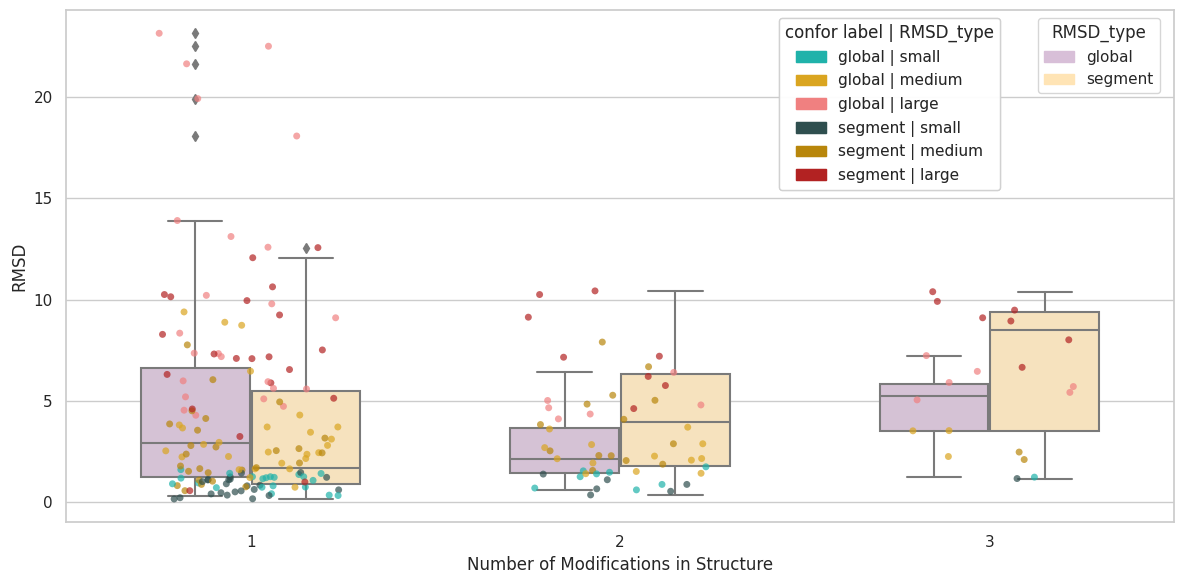

In [532]:


# Define custom colors for each combination of RMSD_type and conf_label
custom_colors = {
    'global_small': 'lightseagreen',  # lighter color for 'global' and 'small' conf_label
    'global_medium': 'goldenrod',     # lighter color for 'global' and 'medium' conf_label
    'global_large': 'lightcoral',     # lighter color for 'global' and 'large' conf_label
    'segment_small': 'darkslategray', # darker color for 'segment' and 'small' conf_label
    'segment_medium': 'darkgoldenrod', # darker color for 'segment' and 'medium' conf_label
    'segment_large': 'firebrick'       # darker color for 'segment' and 'large' conf_label
}

# Create a new column in the DataFrame to represent the combination of RMSD_type and conf_label
merged_df['RMSD_conf_combo'] = merged_df['RMSD_type'] + '_' + merged_df['conf_label']

# Set the plot style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(12, 6))

# Box Plot with custom colors for RMSD_type
sns.boxplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_type", 
            palette=['thistle', 'moccasin'], dodge=True, width=0.6,zorder=1)

# Overlay Jitter Plot for conf_label with custom colors and slight jitter
sns.stripplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_conf_combo", 
              palette=custom_colors, dodge=False, marker='o', edgecolor='gray', alpha=0.7, jitter=0.25,zorder=2)

# Remove the automatic legend to avoid duplication
plt.gca().get_legend().remove()

# Custom legend for RMSD_type (Box Plot Colors)
rmsd_type_patches = [
    mpatches.Patch(color='thistle', label='global'),
    mpatches.Patch(color='moccasin', label='segment')
]
legend_rmsd_type = plt.legend(handles=rmsd_type_patches, title="RMSD_type", loc='upper left',\
                              bbox_to_anchor=(0.87, 1.0), ncol=1)

# Custom legend for conf_label based on RMSD_type (using custom colors)
conf_label_patches = [mpatches.Patch(color=color, label=label.replace('_', ' | ')) for label, color in custom_colors.items()]
legend_conf_label = plt.legend(handles=conf_label_patches, title="confor label | RMSD_type", \
                               loc='upper right', bbox_to_anchor=(0.85, 1.0), ncol=1)

# Add both legends to the plot
plt.gca().add_artist(legend_rmsd_type)
plt.gca().add_artist(legend_conf_label)

# Customize plot
# plt.title("Combined Boxplot and Jitter Plot of PDBsup_RMSD Grouped by RMSD_type and numMod")
plt.xlabel("Number of Modifications in Structure")
plt.ylabel("RMSD")

plt.tight_layout()
plt.show()


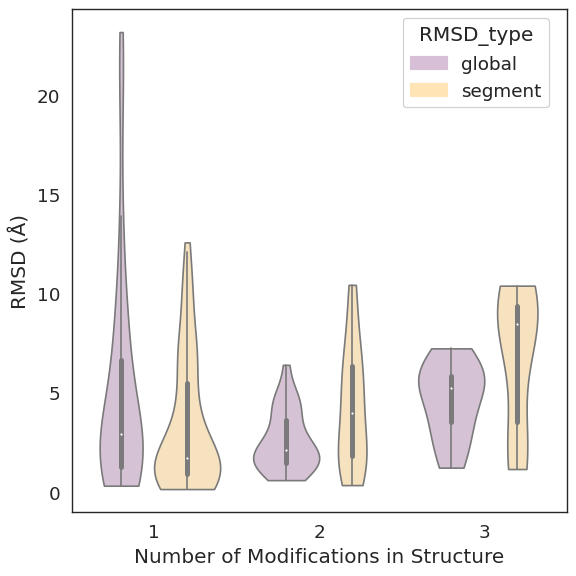

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set the plot style
sns.set(style="white")
sns.set_context('paper',font_scale=1.5)
# Initialize the plot
plt.figure(figsize=(6, 6))

# Violin Plot with custom colors for RMSD_type
sns.violinplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_type", 
               palette=['thistle', 'moccasin'], dodge=True, width=0.8, cut=0, zorder=1)

# # Optionally, overlay a jitter plot for individual points
# sns.stripplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_conf_combo", 
#               palette=custom_colors, dodge=False, marker='o', edgecolor='gray', alpha=0.7, jitter=0.25, zorder=2)

# Remove the automatic legend to avoid duplication
plt.gca().get_legend().remove()

# Custom legend for RMSD_type (Violin Plot Colors)
rmsd_type_patches = [
    mpatches.Patch(color='thistle', label='global'),
    mpatches.Patch(color='moccasin', label='segment')
]
legend_rmsd_type = plt.legend(handles=rmsd_type_patches, title="RMSD_type", loc='upper left',
                              bbox_to_anchor=(0.65, 1.0), ncol=1)

# # Custom legend for conf_label based on RMSD_type (if needed)
# conf_label_patches = [mpatches.Patch(color=color, label=label.replace('_', ' | ')) for label, color in custom_colors.items()]
# legend_conf_label = plt.legend(handles=conf_label_patches, title="Confor Label | RMSD_type",
#                                loc='upper right', bbox_to_anchor=(0.85, 1.0), ncol=1)

# Add both legends to the plot
plt.gca().add_artist(legend_rmsd_type)
# plt.gca().add_artist(legend_conf_label)

# Customize plot
plt.xlabel("Number of Modifications in Structure")
plt.ylabel("RMSD (Å)")

plt.tight_layout()
plt.savefig('Modification_violin.svg', format='svg', dpi=1200)

plt.show()


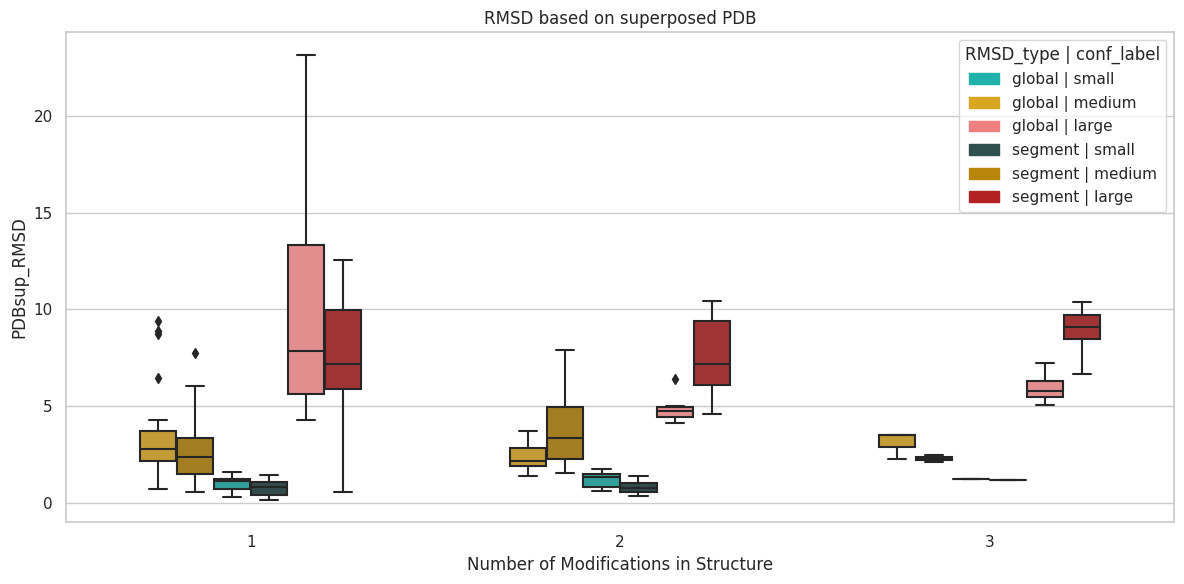

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define custom colors for each combination of RMSD_type and conf_label
custom_colors = {
    'global_small': 'lightseagreen',  # lighter color for 'global' and 'small' conf_label
    'global_medium': 'goldenrod',     # lighter color for 'global' and 'medium' conf_label
    'global_large': 'lightcoral',     # lighter color for 'global' and 'large' conf_label
    'segment_small': 'darkslategray', # darker color for 'segment' and 'small' conf_label
    'segment_medium': 'darkgoldenrod', # darker color for 'segment' and 'medium' conf_label
    'segment_large': 'firebrick'       # darker color for 'segment' and 'large' conf_label
}

# Create a new column in the DataFrame to represent the combination of RMSD_type and conf_label
merged_df['RMSD_conf_combo'] = merged_df['RMSD_type'] + '_' + merged_df['conf_label']

# Set the plot style
sns.set(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(12, 6))

# Create the box plot with dodge set to True to align with the RMSD_conf_combo categories
sns.boxplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_conf_combo", 
            palette=custom_colors, dodge=True, width=0.6)

# # Overlay strip plot with jitter, using RMSD_conf_combo for hue
# sns.stripplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_conf_combo", 
#               palette=custom_colors, dodge=True, marker='o', edgecolor='gray', alpha=0.7, jitter=0.2)

# Remove the automatic legend to avoid duplication
plt.gca().get_legend().remove()

# Custom legend for the RMSD_type and conf_label combinations
legend_patches = [mpatches.Patch(color=color, label=label.replace('_', ' | ')) for label, color in custom_colors.items()]
plt.legend(handles=legend_patches, title="RMSD_type | conf_label", loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

# Customize plot
plt.title("RMSD based on superposed PDB")
plt.xlabel("Number of Modifications in Structure")
plt.ylabel("PDBsup_RMSD")

plt.tight_layout()
plt.show()


In [173]:
### MODRES specific
resDF=merged_df[['ACC_ID','modres','conf_label','PDBsup_RMSD','RMSD_type']].drop_duplicates()

def sort_combinations(combination):
    # Split the combination by comma, sort the elements, and join them back together
    return ','.join(sorted(combination.split(',')))

# Apply the function to the 'Combination' column
resDF['modres_sort'] = resDF['modres'].apply(sort_combinations)
resDF

,ACC_ID,modres,conf_label,PDBsup_RMSD,RMSD_type,modres_sort
0,P07949,"PTR,PTR",medium,2.14,global,"PTR,PTR"
1,P07949,"PTR,PTR",medium,3.82,segment,"PTR,PTR"
2,Q9UP95,"SEP,SEP",small,0.68,global,"SEP,SEP"
3,Q9UP95,"SEP,SEP",small,0.86,segment,"SEP,SEP"
4,P22681,PTR,large,12.59,global,PTR
...,...,...,...,...,...,...
216,Q5S007,TPO,medium,1.92,segment,TPO
217,Q92918,"TPO,SEP",large,6.40,global,"SEP,TPO"
218,Q92918,"TPO,SEP",large,10.43,segment,"SEP,TPO"
219,O15264,"TPO,PTR",medium,2.68,global,"PTR,TPO"


In [174]:
resDF[['ACC_ID','modres_sort','RMSD_type']].drop_duplicates().modres_sort.value_counts()

SEP            60
TPO            45
PTR            38
PTR,TPO        14
SEP,TPO        13
PTR,PTR        12
PTR,PTR,PTR     8
SEP,SEP         7
SEP,SEP,SEP     7
TPO,TPO         7
SEP,TPO,TPO     3
PTR,SEP         2
PTR,SEP,SEP     1
SEP,SEP,TPO     1
Name: modres_sort, dtype: int64

    modres_sort modres_renamed
0       PTR,PTR      PTR2, PTR
1       PTR,PTR      PTR2, PTR
2       SEP,SEP      SEP2, SEP
3       SEP,SEP      SEP2, SEP
4           PTR            PTR
..          ...            ...
216         TPO            TPO
217     SEP,TPO       SEP, TPO
218     SEP,TPO       SEP, TPO
219     PTR,TPO       PTR, TPO
220     PTR,TPO       PTR, TPO

[218 rows x 2 columns]


<Figure size 600x600 with 0 Axes>

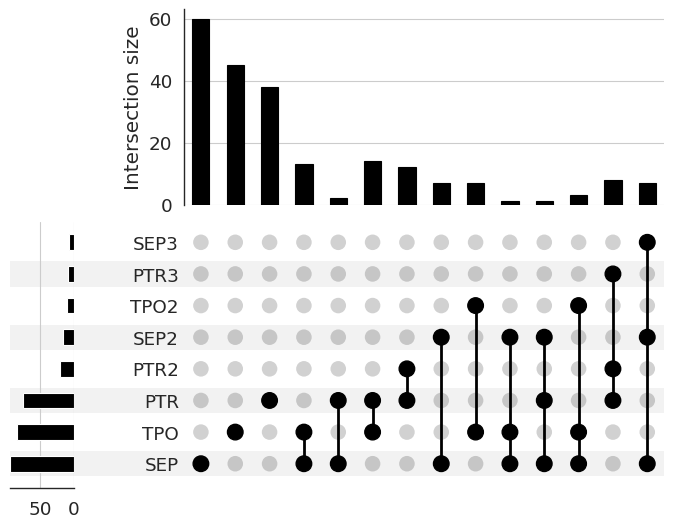

In [176]:
from collections import Counter
import upsetplot
plt.figure(figsize=(6, 6))

# Step 1: Split `modres_sort` into lists and count occurrences for each modification in each row
resDF['modres_list'] = resDF['modres_sort'].str.split(',')

# Step 2: Rename modifications based on occurrences
def rename_modifications(mod_list):
    count = Counter(mod_list)
    renamed_list = []
    
    for mod in mod_list:
        if count[mod] > 1:
            renamed_list.append(f"{mod}{count[mod]}")
            count[mod] -= 1
        else:
            renamed_list.append(mod)
    
    return ', '.join(renamed_list)

# Apply the renaming function
resDF['modres_renamed'] = resDF['modres_list'].apply(rename_modifications)

# Display the resulting DataFrame
print(resDF[['modres_sort', 'modres_renamed']])
# Step 2: One-hot encode the `modres_renamed` column
unique_modifications = sorted(set([mod for row in resDF['modres_renamed'] for mod in row.split(', ')]))
for mod in unique_modifications:
    resDF[mod] = resDF['modres_renamed'].apply(lambda x: mod in x.split(', '))

# Step 3: Aggregate by unique combinations and count occurrences
upset_ready_resDF = resDF[unique_modifications].groupby(unique_modifications).size().reset_index(name='count')

# Step 4: Create an UpSet plot
upset_data = upsetplot.from_memberships(
    upset_ready_resDF[unique_modifications].apply(lambda x: tuple(x.index[x == True]), axis=1),
    data=upset_ready_resDF['count']
)

# Plot the UpSet
upsetplot.plot(upset_data, orientation='horizontal')

# Customize plot
# plt.suptitle("UpSet Plot of Renamed modres_sort Combinations")
plt.savefig('upset_residue.svg', format='svg', dpi=1200)
plt.show()


In [126]:
resDF.ACC_ID.nunique()

109

<AxesSubplot:xlabel='modres_sort', ylabel='PDBsup_RMSD'>

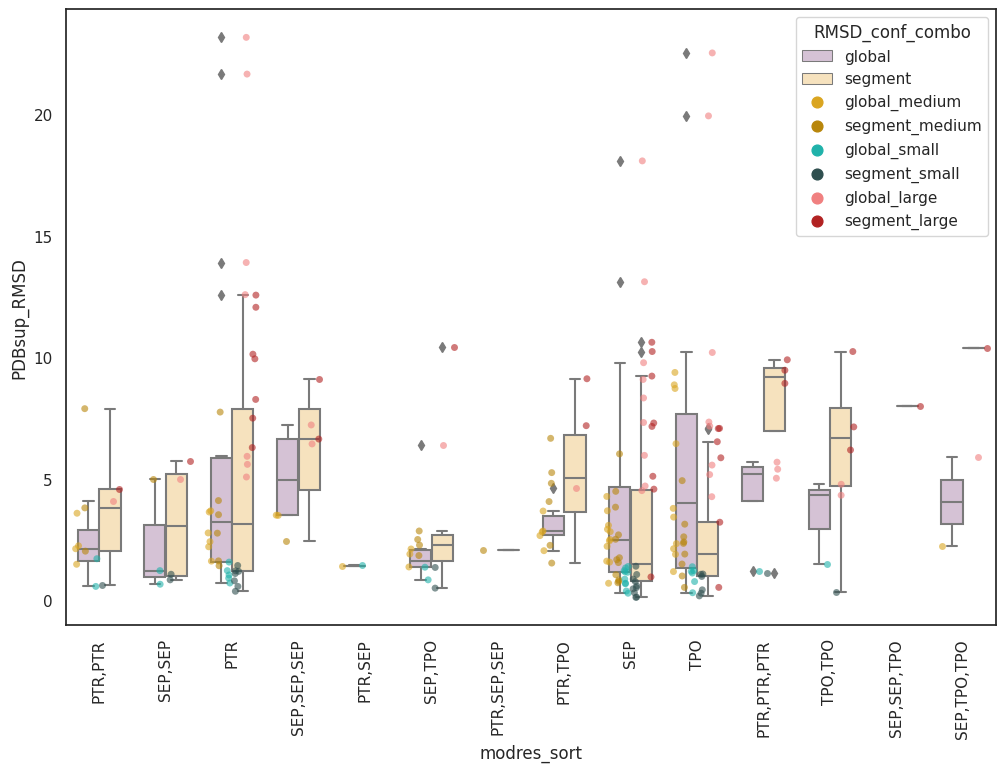

In [793]:
# Initialize the plot
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Define custom colors for each combination of RMSD_type and conf_label
custom_colors = {
    'global_small': 'lightseagreen',  # lighter color for 'global' and 'small' conf_label
    'global_medium': 'goldenrod',     # lighter color for 'global' and 'medium' conf_label
    'global_large': 'lightcoral',     # lighter color for 'global' and 'large' conf_label
    'segment_small': 'darkslategray', # darker color for 'segment' and 'small' conf_label
    'segment_medium': 'darkgoldenrod', # darker color for 'segment' and 'medium' conf_label
    'segment_large': 'firebrick'       # darker color for 'segment' and 'large' conf_label
}

# Create a new column in the DataFrame to represent the combination of RMSD_type and conf_label
resDF['RMSD_conf_combo'] = resDF['RMSD_type'] + '_' + resDF['conf_label']

# Overlay strip plot for conf_label with custom colors and slight jitter for better visibility
sns.boxplot(data=resDF, x="modres_sort", y="PDBsup_RMSD", hue="RMSD_type", palette=['thistle','moccasin'],
              dodge=True,width=0.65)
plt.xticks(rotation=90)
plt.xlabel('')

conf_label_colors = {'small': 'lightseagreen', 'medium': 'goldenrod', 'large': 'indianred'}

# Create the box plot with a smaller width and increased dodge to add spacing between boxes in the same group
# sns.boxplot(data=merged_df, x="numMod", y="PDBsup_RMSD", hue="RMSD_type", palette=['thistle','moccasin'], dodge=True)

# # Overlay strip plot for conf_label with custom colors and slight jitter for better visibility
sns.stripplot(data=resDF, x="modres_sort", y="PDBsup_RMSD", hue="RMSD_conf_combo", 
              dodge=True, marker='o', edgecolor='gray', palette=custom_colors, alpha=0.6, jitter=0.2)

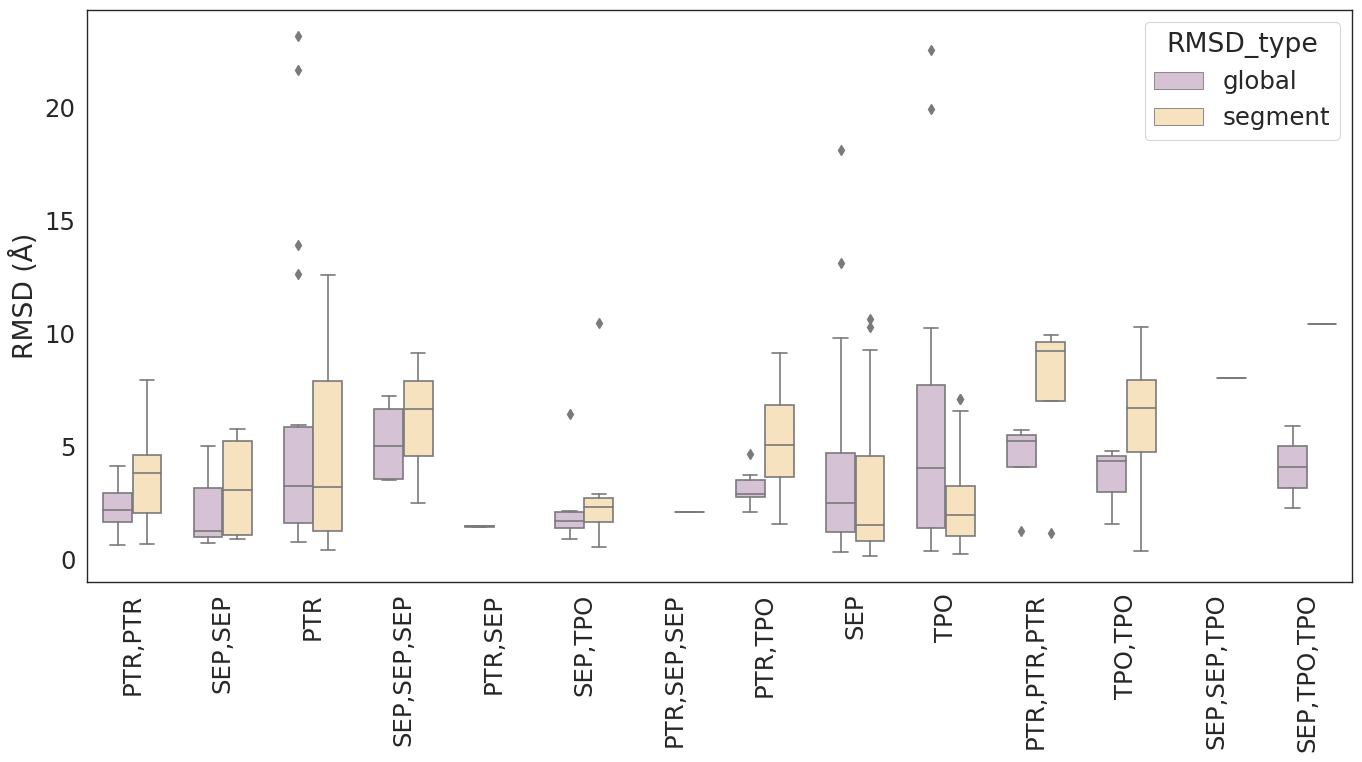

In [180]:
# Initialize the plot
plt.figure(figsize=(14, 8))
sns.set(style="white")
sns.set_context('paper',font_scale=2)

# Define custom colors for each combination of RMSD_type and conf_label
custom_colors = {
    'global_small': 'grey',  # lighter color for 'global' and 'small' conf_label
    'global_medium': 'grey',     # lighter color for 'global' and 'medium' conf_label
    'global_large': 'grey',     # lighter color for 'global' and 'large' conf_label
    'segment_small': 'grey', # darker color for 'segment' and 'small' conf_label
    'segment_medium': 'grey', # darker color for 'segment' and 'medium' conf_label
    'segment_large': 'grey'       # darker color for 'segment' and 'large' conf_label
}

# Create a new column in the DataFrame to represent the combination of RMSD_type and conf_label
resDF['RMSD_conf_combo'] = resDF['RMSD_type'] + '_' + resDF['conf_label']

# Overlay strip plot for conf_label with custom colors and slight jitter for better visibility
sns.boxplot(data=resDF, x="modres_sort", y="PDBsup_RMSD", hue="RMSD_type", palette=['thistle','moccasin'],
              dodge=True,width=0.65)
plt.xticks(rotation=90)

plt.ylabel("RMSD (Å)")
plt.xlabel('')

plt.tight_layout()
plt.savefig('Psites_boxplot.svg', format='svg', dpi=1200)

In [205]:
af3eval=pd.read_csv('forAF3_eval.txt',sep='\t',usecols=['ACC_ID', 'PDBID', 'CHAINID', 'modpos', 'modres',
       'numMod', 'RMSD_type', 'max_PDBsup_RMSD',
       'conf_label', 'prot1', 'prot2'])

rmsd_af3=pd.read_csv('RMSD_AFPDB_final_clustering.txt',sep='\t')
rmsd_af3 = rmsd_af3.loc[
    (rmsd_af3['prot1'].str.contains('F1-model_v4|AF3', regex=True)) |
    (rmsd_af3['prot2'].str.contains('F1-model_v4|AF3', regex=True))
]
rmsd_af3

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd
0,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68
1,O14920,4kik__A,O14920_AF3_257__A,segment,0.25,0.96,0.26
2,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26
3,O14920,4kik__A,AF-O14920-F1-model_v4__A,segment,0.28,0.96,0.28
4,O14920,O14920_AF3__A,4e3c__A,global,2.34,0.78,2.90
...,...,...,...,...,...,...,...
4989,Q9NZQ7,5o45__A,AF-Q9NZQ7-F1-model_v4__A,segment,0.70,0.67,0.70
5024,Q5S007,8fo8__C,Q5S007_AF3_1343__A,global,3.06,0.96,3.29
5025,Q5S007,8fo8__C,Q5S007_AF3_1343__A,segment,0.56,0.85,0.59
5026,Q5S007,8fo8__C,Q5S007_AF3__A,global,3.72,0.93,4.67


In [206]:
def classify_model_type(row):
    if 'F1-model_v4' in row['prot1'] or 'F1-model_v4' in row['prot2']:
        return 'AF2'
    elif 'AF3__A' in row['prot1'] or 'AF3__A' in row['prot2']:
        return 'AF3'
    else:
        return 'AF3-p'

# Apply the function to create the Model_Type column
rmsd_af3['Model_Type'] = rmsd_af3.apply(classify_model_type, axis=1)
rmsd_af3

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type
0,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68,AF3-p
1,O14920,4kik__A,O14920_AF3_257__A,segment,0.25,0.96,0.26,AF3-p
2,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26,AF2
3,O14920,4kik__A,AF-O14920-F1-model_v4__A,segment,0.28,0.96,0.28,AF2
4,O14920,O14920_AF3__A,4e3c__A,global,2.34,0.78,2.90,AF3
...,...,...,...,...,...,...,...,...
4989,Q9NZQ7,5o45__A,AF-Q9NZQ7-F1-model_v4__A,segment,0.70,0.67,0.70,AF2
5024,Q5S007,8fo8__C,Q5S007_AF3_1343__A,global,3.06,0.96,3.29,AF3-p
5025,Q5S007,8fo8__C,Q5S007_AF3_1343__A,segment,0.56,0.85,0.59,AF3-p
5026,Q5S007,8fo8__C,Q5S007_AF3__A,global,3.72,0.93,4.67,AF3


In [208]:
af3eval[af3eval.ACC_ID=='P28482']

,ACC_ID,PDBID,CHAINID,modpos,modres,numMod,RMSD_type,max_PDBsup_RMSD,conf_label,prot1,prot2
142,P28482,5v62,A,"185,187","TPO,PTR",2,global,2.87,medium,5v62_A,3sa0_A
143,P28482,8u8j,A,"183,185","TPO,PTR",2,segment,4.83,medium,8u8j_A,4h3q_A


In [209]:
pdbnewP=pd.read_csv('pdbDF_newP_NP.txt',sep='\t')
pdbnewP.head()

,ACC_ID,PDBID,CHAINID,P_status
0,O00267,6ted,Z,P
1,O00267,7unc,Z,P
2,O00267,7und,Z,P
3,O00267,8uhd,Z,NP
4,O00267,8w8e,Z,NP


In [210]:
# Step 1: Create a combined PDBID__CHAINID column in pdbnewP
pdbnewP['PDBID__CHAINID'] = pdbnewP['PDBID'] + '__' + pdbnewP['CHAINID']

# Step 2: Merge rmsd_af3 with pdbnewP for prot1 matches
rmsd_af3 = rmsd_af3.merge(
    pdbnewP[['PDBID__CHAINID', 'P_status']].rename(columns={'PDBID__CHAINID': 'prot1', 'P_status': 'PDB_status_prot1'}),
    on='prot1',
    how='left'
)

# Step 3: Merge rmsd_af3 with pdbnewP for prot2 matches
rmsd_af3 = rmsd_af3.merge(
    pdbnewP[['PDBID__CHAINID', 'P_status']].rename(columns={'PDBID__CHAINID': 'prot2', 'P_status': 'PDB_status_prot2'}),
    on='prot2',
    how='left'
)

# Step 4: Combine PDB_status_prot1 and PDB_status_prot2 into a single column
rmsd_af3['PDB_status'] = rmsd_af3['PDB_status_prot1'].combine_first(rmsd_af3['PDB_status_prot2'])

# Step 5: Drop intermediate columns if not needed
rmsd_af3 = rmsd_af3.drop(columns=['PDB_status_prot1', 'PDB_status_prot2'])

# Step 6: Display the updated dataframe
rmsd_af3.head()

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status
0,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68,AF3-p,P
1,O14920,4kik__A,O14920_AF3_257__A,segment,0.25,0.96,0.26,AF3-p,P
2,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26,AF2,P
3,O14920,4kik__A,AF-O14920-F1-model_v4__A,segment,0.28,0.96,0.28,AF2,P
4,O14920,O14920_AF3__A,4e3c__A,global,2.34,0.78,2.90,AF3,NP


In [211]:
# Step 1: Adjust prot1 and prot2 in rmsd_af3 to match the af3eval format
rmsd_af3['prot1_adjusted'] = rmsd_af3['prot1'].str.replace('__', '_')
rmsd_af3['prot2_adjusted'] = rmsd_af3['prot2'].str.replace('__', '_')

# Step 2: Create a combined list of prot1 and prot2 from af3eval
af3eval_prot_set = set(af3eval['prot1']).union(set(af3eval['prot2']))

# Step 3: Filter rmsd_af3 where either prot1_adjusted or prot2_adjusted is in the af3eval prot set
filtered_rmsd_af3 = rmsd_af3[
    (rmsd_af3['prot1_adjusted'].isin(af3eval_prot_set)) |
    (rmsd_af3['prot2_adjusted'].isin(af3eval_prot_set))
]

# Step 4: Drop the temporary adjusted columns (if not needed)
filtered_rmsd_af3 = filtered_rmsd_af3.drop(columns=['prot1_adjusted', 'prot2_adjusted'])
# filtered_rmsd_af3=filtered_rmsd_af3.drop('fold_label',axis=1)
# filtered_rmsd_af3=filtered_rmsd_af3.drop_duplicates()
filtered_rmsd_af3=filtered_rmsd_af3.loc[filtered_rmsd_af3.rmsd_type=='global']

In [212]:
filtered_rmsd_af3[filtered_rmsd_af3.ACC_ID=='P07949']

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status
586,P07949,6nec__A,P07949_AF3_905_928__A,global,1.26,0.96,1.49,AF3-p,NP
590,P07949,6vhg__A,P07949_AF3_905_928__A,global,1.51,0.96,2.11,AF3-p,P
592,P07949,6nec__A,AF-P07949-F1-model_v4__A,global,1.59,0.95,2.10,AF2,NP
606,P07949,6nec__A,P07949_AF3__A,global,1.63,0.95,2.43,AF3,NP
3466,P07949,6vhg__A,P07949_AF3__A,global,1.43,0.96,1.79,AF3,P
3478,P07949,6vhg__A,AF-P07949-F1-model_v4__A,global,1.43,0.97,1.77,AF2,P


In [213]:
# filtered_rmsd_af3[filtered_rmsd_af3.ACC_ID=='P07949']

In [214]:
filtered_rmsd_af3[filtered_rmsd_af3.ACC_ID=='O14965']

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status
30,O14965,6vph__A,O14965_AF3_288__A,global,2.38,0.82,5.82,AF3-p,P
54,O14965,8of5__A,O14965_AF3_288__A,global,1.06,0.90,6.64,AF3-p,NP
56,O14965,AF-O14965-F1-model_v4__A,6vph__A,global,2.41,0.58,5.50,AF2,P
62,O14965,AF-O14965-F1-model_v4__A,8of5__A,global,1.33,0.60,6.76,AF2,NP
64,O14965,O14965_AF3__A,8of5__A,global,1.52,0.59,6.73,AF3,NP
68,O14965,O14965_AF3__A,6vph__A,global,2.40,0.58,5.54,AF3,P


In [215]:
# Filter rows with minimum PDB_rmsd for each ACC_ID and Model_Type
filtered_rmsd_af3_min = filtered_rmsd_af3.loc[
    filtered_rmsd_af3.groupby(['ACC_ID', 'Model_Type'])['PDB_rmsd'].idxmin()
]

# Display the result
filtered_rmsd_af3_min

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status
2,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26,AF2,P
22,O14920,4kik__A,O14920_AF3__A,global,1.18,0.98,1.74,AF3,P
0,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68,AF3-p,P
36,O14939,6ohp__A,AF-O14939-F1-model_v4__A,global,0.42,1.00,0.42,AF2,P
44,O14939,6ohp__A,O14939_AF3__A,global,0.45,1.00,0.45,AF3,P
...,...,...,...,...,...,...,...,...,...
2650,Q9Y572,Q9Y572_AF3__A,7mx3__A,global,1.73,0.55,1.79,AF3,NP
2638,Q9Y572,Q9Y572_AF3_224_227__A,7mx3__A,global,1.51,0.55,1.73,AF3-p,NP
2112,Q9Y6E0,8qlq__A,AF-Q9Y6E0-F1-model_v4__A,global,2.35,0.90,2.65,AF2,NP
2126,Q9Y6E0,Q9Y6E0_AF3__A,8qlq__A,global,1.97,0.59,2.43,AF3,NP


In [216]:
filtered_rmsd_af3_min[['Model_Type','PDB_status']].value_counts()

Model_Type  PDB_status
AF3-p       P             80
AF3         P             77
AF2         P             70
            NP            39
AF3         NP            32
AF3-p       NP            29
dtype: int64

In [218]:
filtered_rmsd_af3_min.loc[filtered_rmsd_af3_min.ACC_ID=='P07949']

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status
3478,P07949,6vhg__A,AF-P07949-F1-model_v4__A,global,1.43,0.97,1.77,AF2,P
3466,P07949,6vhg__A,P07949_AF3__A,global,1.43,0.96,1.79,AF3,P
586,P07949,6nec__A,P07949_AF3_905_928__A,global,1.26,0.96,1.49,AF3-p,NP


In [781]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from collections import defaultdict

# Function to group structures by their cluster labels into a dictionary
def group_structures_by_cluster(clusters, unique_structures):
    """Group structures by their cluster labels into a dictionary."""
    cluster_dict = defaultdict(list)
    for structure, cluster in zip(unique_structures, clusters):
        cluster_dict[cluster].append(structure)
    return cluster_dict

# Function to generate clusters for a given protein (ACC_ID)
def generate_cluster_data(protein_data, acc_id, status_df):
    """Generate cluster data for a single protein."""
    # Filter PDB-to-PDB pairs (exclude AlphaFold structures)
    pdb_data = protein_data[~protein_data['prot1'].str.contains("AF") & ~protein_data['prot2'].str.contains("AF")]
    
    # Get unique PDB structures
    unique_structures = sorted(set(pdb_data['prot1']).union(set(pdb_data['prot2'])))
    num_structures = len(unique_structures)
    
    # Create a mapping from structure ID to matrix index
    structure_index_map = {structure: idx for idx, structure in enumerate(unique_structures)}

    # Create an empty matrix to store RMSD values
    rmsd_matrix = np.zeros((num_structures, num_structures))

    # Populate the RMSD matrix using the RMSD values from pdb_data
    for _, row in pdb_data.iterrows():
        idx1 = structure_index_map[row['prot1']]
        idx2 = structure_index_map[row['prot2']]
        rmsd_value = row['TM_RMSD']
        rmsd_matrix[idx1, idx2] = rmsd_value
        rmsd_matrix[idx2, idx1] = rmsd_value  # Symmetric matrix

    # Check if there are enough structures to perform clustering
    if num_structures < 2:
        return None, {}  # Skip if there are fewer than 2 structures

    # Perform hierarchical clustering
    rmsd_condensed = pdist(rmsd_matrix)
    Z_rmsd = linkage(rmsd_condensed, method='average')
    
    # Calculate clusters using a threshold for distance
    clusters = fcluster(Z_rmsd, t=0.7 * np.max(Z_rmsd[:, 2]), criterion='distance')
    
    # Group structures by clusters
    cluster_dict = group_structures_by_cluster(clusters, unique_structures)
    
    # Generate the cluster context dictionary
    cluster_context = {}
    for cluster_id, structures in cluster_dict.items():
        # Filter status_df to include only structures in the current cluster
        cluster_status = status_df[status_df['ACC_ID'] == acc_id]
        cluster_status = cluster_status[cluster_status['PDBCHAIN'].isin(structures)]
        
        # Count P and NP statuses within the cluster
        num_P = sum(cluster_status['P_status'] == 'P')
        num_NP = sum(cluster_status['P_status'] == 'NP')
        
        # Store cluster data
        cluster_context[cluster_id] = {
            'Cluster_Size': len(structures),
            'num_P_in_cluster': num_P,
            'num_NP_in_cluster': num_NP,
        }
    
    return cluster_context, cluster_dict

# Function to assign clusters to filtered RMSD entries
def assign_clusters_to_filtered_rmsd(rmsd_df, filtered_rmsd_foreval, status_df):
    """Assign clusters to filtered RMSD entries based on ACC_ID and Model_Type."""
    cluster_results = []
    
    # Iterate over each ACC_ID in rmsd_df
    for acc_id, protein_data in rmsd_df.groupby('ACC_ID'):
        # Generate cluster data for the protein
        cluster_context, cluster_dict = generate_cluster_data(protein_data, acc_id, status_df)
        if not cluster_context:  # Skip if no clustering was performed
            continue
        
        # Filter the relevant entries from filtered_rmsd_foreval for this ACC_ID
        filtered_data = filtered_rmsd_foreval[filtered_rmsd_foreval['ACC_ID'] == acc_id]
        
        # Check each entry in filtered_data to find its cluster
        for _, row in filtered_data.iterrows():
            for col in ['prot1', 'prot2']:
                structure = row[col]
                # Check which cluster the structure belongs to
                for cluster_id, structures in cluster_dict.items():
                    if structure in structures:
                        cluster_results.append({
                            'ACC_ID': acc_id,
                            'Model_Type': row['Model_Type'],
                            'Structure': structure,
                            'Cluster_ID': cluster_id,
                            'Cluster_Size': cluster_context[cluster_id]['Cluster_Size'],
                            'num_P_in_cluster': cluster_context[cluster_id]['num_P_in_cluster'],
                            'num_NP_in_cluster': cluster_context[cluster_id]['num_NP_in_cluster'],
                        })
                        break  # Structure can belong to only one cluster
    
    # Create a dataframe for the results
    return pd.DataFrame(cluster_results)

# Example Usage
# Read the RMSD data and filter out invalid entries
rmsd_df = rmsd_all.copy()  # Full RMSD dataset
rmsd_df = rmsd_df.loc[rmsd_df['TM_RMSD'] != 'N/A']  # Filter out rows with 'N/A' in RMSD
rmsd_df = rmsd_df.dropna(subset=['TM_RMSD'])
rmsd_df['TM_RMSD'] = rmsd_df['TM_RMSD'].astype(float)  # Ensure RMSD is float

# Read the P/NP status data
status_df = pd.read_csv("pdbDF_newP_NP.txt", sep="\t")
status_df['PDBCHAIN'] = status_df['PDBID'] + '__' + status_df['CHAINID']

filtered_rmsd_foreval=filtered_rmsd_af3_min.copy()

# Assign clusters to filtered RMSD entries
cluster_assignment_df = assign_clusters_to_filtered_rmsd(rmsd_df, filtered_rmsd_foreval, status_df)

# Save the result to a CSV file
cluster_assignment_df.to_csv("filtered_rmsd_cluster_assignment_TM.txt", sep='\t', index=False)
print("Filtered RMSD cluster assignments saved to 'filtered_rmsd_cluster_assignment.txt'")


Filtered RMSD cluster assignments saved to 'filtered_rmsd_cluster_assignment.txt'


In [219]:
cluster_eval=pd.read_csv('filtered_rmsd_cluster_assignment.txt',sep='\t')
cluster_eval
af3_eval_df=filtered_rmsd_af3_min.merge(cluster_eval,on=['ACC_ID','Model_Type'])

af3_eval_df

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status,Structure,Cluster_ID,Cluster_Size,num_P_in_cluster,num_NP_in_cluster
0,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26,AF2,P,4kik__A,2,1,1,0
1,O14920,4kik__A,O14920_AF3__A,global,1.18,0.98,1.74,AF3,P,4kik__A,2,1,1,0
2,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68,AF3-p,P,4kik__A,2,1,1,0
3,O14939,6ohp__A,AF-O14939-F1-model_v4__A,global,0.42,1.00,0.42,AF2,P,6ohp__A,1,10,4,6
4,O14939,6ohp__A,O14939_AF3__A,global,0.45,1.00,0.45,AF3,P,6ohp__A,1,10,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Q9Y572,Q9Y572_AF3__A,7mx3__A,global,1.73,0.55,1.79,AF3,NP,7mx3__A,1,4,0,4
323,Q9Y572,Q9Y572_AF3_224_227__A,7mx3__A,global,1.51,0.55,1.73,AF3-p,NP,7mx3__A,1,4,0,4
324,Q9Y6E0,8qlq__A,AF-Q9Y6E0-F1-model_v4__A,global,2.35,0.90,2.65,AF2,NP,8qlq__A,4,1,0,1
325,Q9Y6E0,Q9Y6E0_AF3__A,8qlq__A,global,1.97,0.59,2.43,AF3,NP,8qlq__A,4,1,0,1


In [785]:
af3_eval_df.to_csv('af3_eval_df_TM.txt',sep='\t',index=False)

## Hypothesis 1

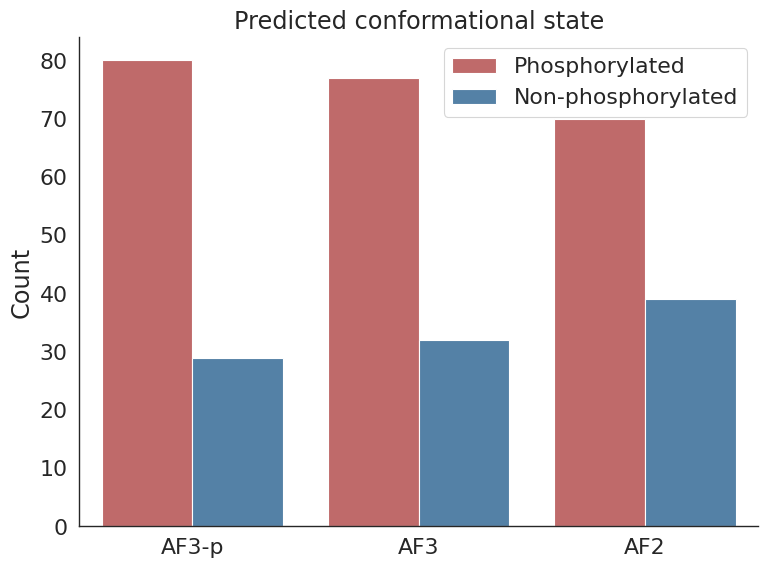

In [228]:
# plt.style.use('default')
sns.set_context("paper",font_scale = 1.8)
sns.set_style("white")

af3_merged_df=af3_eval_df.copy()
plt.figure(figsize=(8, 6))

af3_merged_df['PDB_status']=af3_merged_df['PDB_status'].replace({'P':'Phosphorylated','NP':'Non-phosphorylated'})
model_order = sorted(af3_merged_df['Model_Type'].unique(), reverse=True)  # Sort alphabetically or customize
 
sns.countplot(data=af3_merged_df, x='Model_Type', hue='PDB_status', palette=['indianred','steelblue'],order=model_order)

# Add title and labels
plt.title('Predicted conformational state')
plt.xlabel('')
plt.ylabel('Count')

# Show the plot
plt.legend(title='')
plt.tight_layout()
sns.despine()
plt.savefig('hypothesis1.svg', format='svg', dpi=1200)
plt.show()

In [229]:
af3_merged_df[['Model_Type','PDB_status']].value_counts()

Model_Type  PDB_status        
AF3-p       Phosphorylated        80
AF3         Phosphorylated        77
AF2         Phosphorylated        70
            Non-phosphorylated    39
AF3         Non-phosphorylated    32
AF3-p       Non-phosphorylated    29
dtype: int64

In [230]:
from scipy.stats import chi2_contingency

# Construct contingency table for P and NP alignments
contingency_table = [
    [39, 70],  # AF2: [NP, P]
    [32, 77],  # AF3: [NP, P]
    [29, 80]   # AF3-p: [NP, P]
]

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 2.2760352422907486
P-Value: 0.32045365311446006
Expected Frequencies:
[[33.33333333 75.66666667]
 [33.33333333 75.66666667]
 [33.33333333 75.66666667]]


In [231]:
# Count predictions aligning with P and NP for each Model_Type
phospho_alignment = af3_merged_df.groupby(['Model_Type', 'PDB_status']).size().unstack(fill_value=0)

# Calculate proportions for P and NP alignment
phospho_alignment['P_Proportion'] = phospho_alignment['Phosphorylated'] / (phospho_alignment['Phosphorylated'] + phospho_alignment['Non-phosphorylated'])
phospho_alignment['NP_Proportion'] = phospho_alignment['Non-phosphorylated'] / (phospho_alignment['Phosphorylated'] + phospho_alignment['Non-phosphorylated'])

# Display results
phospho_alignment

PDB_status,Non-phosphorylated,Phosphorylated,P_Proportion,NP_Proportion
Model_Type,,,,
AF2,39,70,0.642202,0.357798
AF3,32,77,0.706422,0.293578
AF3-p,29,80,0.733945,0.266055


In [149]:
af3_merged_df.head()

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status,Structure,Cluster_ID,Cluster_Size,num_P_in_cluster,num_NP_in_cluster
0,O14920,4kik__A,AF-O14920-F1-model_v4__A,global,1.73,0.96,2.26,AF2,Phosphorylated,4kik__A,2,1,1,0
1,O14920,4kik__A,O14920_AF3__A,global,1.18,0.98,1.74,AF3,Phosphorylated,4kik__A,2,1,1,0
2,O14920,4kik__A,O14920_AF3_257__A,global,1.28,0.98,1.68,AF3-p,Phosphorylated,4kik__A,2,1,1,0
3,O14939,6ohp__A,AF-O14939-F1-model_v4__A,global,0.42,1.00,0.42,AF2,Phosphorylated,6ohp__A,1,10,4,6
4,O14939,6ohp__A,O14939_AF3__A,global,0.45,1.00,0.45,AF3,Phosphorylated,6ohp__A,1,10,4,6


In [232]:
af3_merged_df[['Model_Type','PDB_status']].value_counts()

Model_Type  PDB_status        
AF3-p       Phosphorylated        80
AF3         Phosphorylated        77
AF2         Phosphorylated        70
            Non-phosphorylated    39
AF3         Non-phosphorylated    32
AF3-p       Non-phosphorylated    29
dtype: int64

## Hypothesis 2

In [233]:
# Create a pivot table to show cluster distribution by model type for each protein
cluster_membership = af3_merged_df.pivot_table(
    index='ACC_ID', 
    columns='Model_Type', 
    values='Cluster_ID', 
    aggfunc='first'  # Take the first occurrence of each model type's cluster for the protein
).reset_index()

# Display cluster membership for all proteins
cluster_membership


Model_Type,ACC_ID,AF2,AF3,AF3-p
0,O14920,2,2,2
1,O14939,1,1,1
2,O14965,3,3,3
3,O15075,1,1,1
4,O15151,1,1,1
...,...,...,...,...
104,Q9UK32,1,1,1
105,Q9UKE5,1,2,2
106,Q9UP95,2,2,2
107,Q9Y572,1,1,1


In [234]:
# Calculate whether all three models are in the same cluster
cluster_membership['Cluster_Consistency'] = cluster_membership.apply(
    lambda row: row['AF2'] == row['AF3'] == row['AF3-p'], axis=1
)

# Calculate the proportion of proteins where all models fall into the same cluster
total_proteins = len(cluster_membership)
consistent_proteins = cluster_membership['Cluster_Consistency'].sum()
inconsistent_proteins = total_proteins - consistent_proteins

# Print out consistency information
print(f"Total Proteins: {total_proteins}")
print(f"Proteins where AF2, AF3, and AF3-p fall into the same cluster: {consistent_proteins} ({consistent_proteins / total_proteins:.2%})")
print(f"Proteins where models fall into different clusters: {inconsistent_proteins} ({inconsistent_proteins / total_proteins:.2%})")


Total Proteins: 109
Proteins where AF2, AF3, and AF3-p fall into the same cluster: 89 (81.65%)
Proteins where models fall into different clusters: 20 (18.35%)


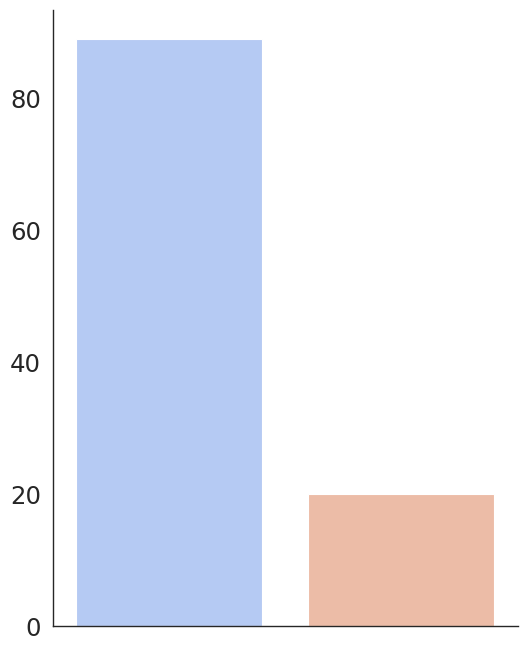

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))
sns.set_context('paper',font_scale=2)

# Create a barplot to show the consistency of predictions
consistency_data = pd.DataFrame({
    'Model_Type': ['All Same Cluster', 'Different Clusters'],
    'Count': [consistent_proteins, inconsistent_proteins]
})

sns.barplot(x='Model_Type', y='Count', data=consistency_data, palette='coolwarm')
sns.despine()
# plt.title('Cluster consistency across predictions')
plt.xlabel('')
plt.ylabel('')
plt.xticks([],[])
# plt.yticks([],[])

plt.savefig('hypothesis2-1.svg', format='svg', dpi=1200)

plt.show()


In [154]:
multiclust=cluster_membership.loc[cluster_membership.Cluster_Consistency==False]

# Check where AF2 and AF3 have the same values
same_af2_af3 = (multiclust['AF2'] == multiclust['AF3']).sum()
print(f"Number of cases where AF2 and AF3 have the same values: {same_af2_af3}")

# Check where AF2 and AF3-p have the same values
same_af2_af3p = (multiclust['AF2'] == multiclust['AF3-p']).sum()
print(f"Number of cases where AF2 and AF3-p have the same values: {same_af2_af3p}")

# Check where AF3 and AF3-p have the same values
same_af3_af3p = (multiclust['AF3'] == multiclust['AF3-p']).sum()
print(f"Number of cases where AF3 and AF3-p have the same values: {same_af3_af3p}")

# Display counts of all pair comparisons
pair_counts = {
    'AF2 == AF3': same_af2_af3,
    'AF2 == AF3-p': same_af2_af3p,
    'AF3 == AF3-p': same_af3_af3p
}

print("\nComparison Counts:")
for pair, count in pair_counts.items():
    print(f"{pair}: {count}")


Number of cases where AF2 and AF3 have the same values: 5
Number of cases where AF2 and AF3-p have the same values: 3
Number of cases where AF3 and AF3-p have the same values: 12

Comparison Counts:
AF2 == AF3: 5
AF2 == AF3-p: 3
AF3 == AF3-p: 12


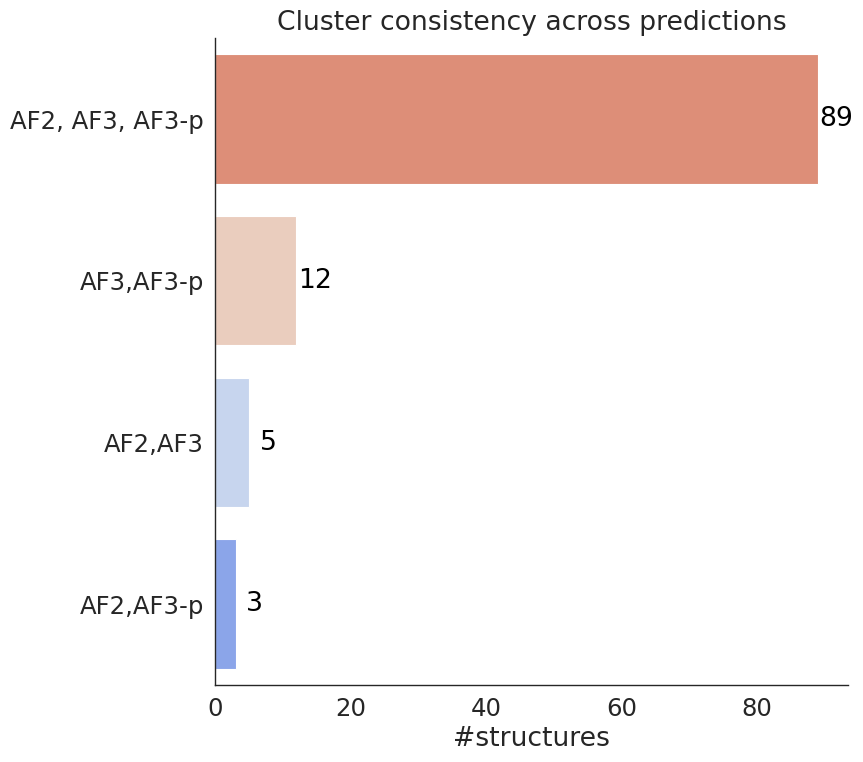

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('default')
plt.figure(figsize=(9, 8))



# Create a barplot to show the consistency of predictions
consistency_data = pd.DataFrame({
    'Model_Type': ['AF2, AF3, AF3-p', 'AF3,AF3-p','AF2,AF3','AF2,AF3-p'],
    'Count': [89, 12,5,3]
})

sns.barplot(y='Model_Type', x='Count', data=consistency_data, palette='coolwarm_r')
# Annotate numbers above the bars
for index, row in consistency_data.iterrows():
    plt.text(row['Count'] +2.8, index, row['Count'], color='black', ha="center", va="center")

# Add title
plt.title('Cluster consistency across predictions')
plt.ylabel('')
plt.xlabel('#structures')
sns.despine()
plt.tight_layout()

plt.savefig('hypothesis2-2.svg', format='svg', dpi=1200)


plt.show()

In [156]:
# Step 1: Determine Dominant Clusters in `cluster_context_df`
# Group by ACC_ID and find the maximum cluster size for each protein


# Step 1: Find the maximum cluster size per protein
max_size_per_protein = cluster_context_df.groupby('ACC_ID')['Cluster_Size'].max().reset_index()

# Step 2: Count how many clusters have the maximum size per protein
max_size_counts = cluster_context_df.groupby(['ACC_ID', 'Cluster_Size']).size().reset_index(name='Count')
max_size_counts = max_size_counts[max_size_counts['Cluster_Size'].isin(max_size_per_protein['Cluster_Size'])]

# Step 3: Merge to identify dominant clusters
dominant_clusters_df = pd.merge(cluster_context_df, max_size_counts, on=['ACC_ID', 'Cluster_Size'], how='inner')

# Step 4: Mark clusters as "True" or "equal"
dominant_clusters_df['Is_Dominant'] = dominant_clusters_df['Count'].apply(lambda x: "equal" if x > 1 else True)

# Step 5: Drop the 'Count' column if not needed
dominant_clusters_df = dominant_clusters_df.drop(columns=['Count'])


# Step 2: Merge `af3_merged` with `dominant_clusters_df` to get dominance status
af3_with_dominance = pd.merge(
    af3_merged_df,
    dominant_clusters_df[['ACC_ID', 'Cluster_ID', 'Is_Dominant']],
    left_on=['ACC_ID', 'Cluster_ID'],
    right_on=['ACC_ID', 'Cluster_ID'],
    how='left'
)

# Fill missing values for `Is_Dominant` with False (for non-dominant clusters)
af3_with_dominance['Is_Dominant'].fillna(False, inplace=True)
af3_with_dominance

# Step 3: Calculate Proportion of Each Model Type in Dominant vs. Non-Dominant Clusters
dominant_model_distribution = af3_with_dominance.groupby(['Model_Type', 'Is_Dominant']).size().unstack(fill_value=0)
dominant_model_distribution

# Calculate Proportion in Dominant Clusters (including "equal") for Each Model
dominant_model_distribution['Dominant_Proportion'] = (
    (dominant_model_distribution[True] ) +dominant_model_distribution["equal"]/
    (dominant_model_distribution[True] + dominant_model_distribution[False] + dominant_model_distribution["equal"])
)

# Output Proportions
print("Proportion of Model Predictions in Dominant Clusters (Including 'Equal') vs. Non-Dominant Clusters")
print(dominant_model_distribution[['Dominant_Proportion']])


Proportion of Model Predictions in Dominant Clusters (Including 'Equal') vs. Non-Dominant Clusters
Is_Dominant  Dominant_Proportion
Model_Type                      
AF2                    98.082569
AF3                    98.082569
AF3-p                  99.073394


In [157]:
dominant_model_distribution

Is_Dominant,False,True,equal,Dominant_Proportion
Model_Type,,,,
AF2,2,98,9,98.082569
AF3,2,98,9,98.082569
AF3-p,2,99,8,99.073394


In [188]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Data for Z-test: "True" (Dominant) and total counts for each model
dominant_counts = np.array([98, 98, 99])  # True counts: AF2, AF3, AF3-p
total_counts = np.array([109, 109, 109])  # Total counts: AF2, AF3, AF3-p

# Perform pairwise Z-tests for proportions
z_test_results = {}
model_pairs = [("AF2", "AF3"), ("AF2", "AF3-p"), ("AF3", "AF3-p")]
indices = [(0, 1), (0, 2), (1, 2)]

for (model1, model2), (i, j) in zip(model_pairs, indices):
    count = dominant_counts[[i, j]]
    total = total_counts[[i, j]]
    z_stat, p_value = proportions_ztest(count, total, alternative="two-sided")
    z_test_results[f"{model1} vs {model2}"] = {"Z-Statistic": z_stat, "P-Value": p_value}

z_test_results


{'AF2 vs AF3': {'Z-Statistic': 0.0, 'P-Value': 1.0},
 'AF2 vs AF3-p': {'Z-Statistic': -0.22955432853907742,
  'P-Value': 0.818438099658854},
 'AF3 vs AF3-p': {'Z-Statistic': -0.22955432853907742,
  'P-Value': 0.818438099658854}}

In [159]:
af3_with_dominance.loc[af3_with_dominance.Is_Dominant==False]

,ACC_ID,prot1,prot2,rmsd_type,TM_rmsd,TM_score,PDB_rmsd,Model_Type,PDB_status,Structure,Cluster_ID,Cluster_Size,num_P_in_cluster,num_NP_in_cluster,Is_Dominant
6,O14965,AF-O14965-F1-model_v4__A,6vph__A,global,2.41,0.58,5.50,AF2,Phosphorylated,6vph__A,3,17,5,12,False
7,O14965,O14965_AF3__A,6vph__A,global,2.40,0.58,5.54,AF3,Phosphorylated,6vph__A,3,17,5,12,False
8,O14965,6vph__A,O14965_AF3_288__A,global,2.38,0.82,5.82,AF3-p,Phosphorylated,6vph__A,3,17,5,12,False
141,P28482,AF-P28482-F1-model_v4__A,4h3q__A,global,1.17,0.95,1.28,AF2,Non-phosphorylated,4h3q__A,3,54,9,45,False
142,P28482,4h3q__A,P28482_AF3__A,global,1.47,0.97,1.82,AF3,Non-phosphorylated,4h3q__A,3,54,9,45,False
143,P28482,5v62__A,P28482_AF3_185_187__A,global,0.78,0.99,0.78,AF3-p,Phosphorylated,5v62__A,3,54,9,45,False


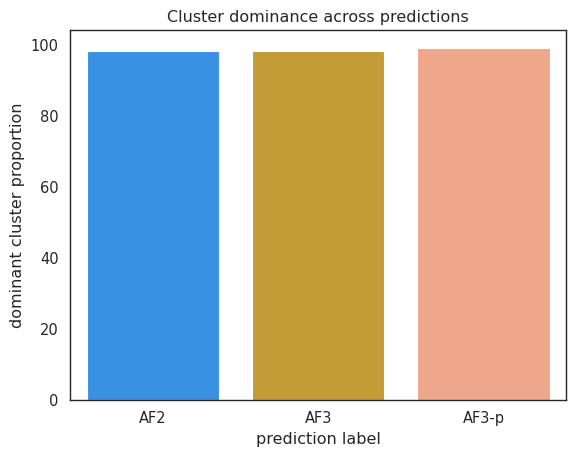

In [160]:
clustdom=dominant_model_distribution.reset_index()

sns.barplot(x='Model_Type', y='Dominant_Proportion', data=clustdom, palette=['dodgerblue','goldenrod','lightsalmon'])
# Annotate numbers above the bars


# Add title
plt.title('Cluster dominance across predictions')
plt.ylabel('dominant cluster proportion')
plt.xlabel('prediction label')
# plt.savefig("cluster_dominance.svg", format="svg", transparent=True)

plt.show()

In [206]:
af3_new=pd.read_csv('AF_PDB_structure_Stat.txt',sep='\t')
af3_new.ACC_ID.nunique()

90

### Cluster comparison P vs NP data and all PDB data (another analysis did originally)


In [207]:
allPDB=pd.read_csv('AF3_merged.txt',sep='\t',usecols=['ACC_ID','prot1','prot2','PDB_Cluster','P_status','Cluster_Size','Model_Type','PDBsup_RMSD'])
allPDB.columns=['ACC_ID','prot1_all','prot2_all','PDBsupRMSD_all','PDBsup_clusterall_ID','PDBsup_clusterall_size','PDBsupall_status','Model_Type',]

# allPDB
PNP_PDB=af3_with_dominance[['ACC_ID','prot1','prot2','Cluster_ID','PDB_status','Cluster_Size','Model_Type','TM_rmsd']]
PNP_PDB.columns=['ACC_ID','prot1_PNP','prot2_PNP','PNP_cluster_ID','PNP_status','PNP_cluster_size','Model_Type','TMRMSD_PNP']

cluster_combined=allPDB.merge(PNP_PDB,on=['ACC_ID','Model_Type'])

cluster_combined['PDBsupall_status']=cluster_combined['PDBsupall_status'].replace({'P':'Phosphorylated','NP':'Non-phosphorylated'})
cluster_combined


,ACC_ID,prot1_all,prot2_all,PDBsupRMSD_all,PDBsup_clusterall_ID,PDBsup_clusterall_size,PDBsupall_status,Model_Type,prot1_PNP,prot2_PNP,PNP_cluster_ID,PNP_status,PNP_cluster_size,TMRMSD_PNP
0,P53778,AF-P53778-F1-model_v4__A,7cga__D,2.07,2,6,Non-phosphorylated,AF2,AF-P53778-F1-model_v4__A,7cga__A,2,Non-phosphorylated,6,2.01
1,P53778,1cm8__B,P53778_AF3_183_185__A,1.61,2,6,Phosphorylated,AF3-p,P53778_AF3_183_185__A,7cga__A,2,Non-phosphorylated,6,2.25
2,P53778,P53778_AF3__A,7cga__B,2.64,2,6,Non-phosphorylated,AF3,P53778_AF3__A,7cga__A,2,Non-phosphorylated,6,2.09
3,P06493,AF-P06493-F1-model_v4__A,4yc6__E,1.90,1,10,Non-phosphorylated,AF2,6gu7__C,AF-P06493-F1-model_v4__A,2,Non-phosphorylated,8,1.57
4,P06493,P06493_AF3_161__A,7nj0__B,1.06,1,10,Phosphorylated,AF3-p,P06493_AF3_161__A,7nj0__B,1,Phosphorylated,10,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Q16288,4ymj__A,Q16288_AF3_706__A,0.80,1,4,Phosphorylated,AF3-p,Q16288_AF3_706__A,3v5q__A,1,Non-phosphorylated,4,1.03
323,Q16288,Q16288_AF3__A,4ymj__A,0.96,1,4,Phosphorylated,AF3,Q16288_AF3__A,3v5q__A,1,Non-phosphorylated,4,0.78
324,P23443,7n91__A,AF-P23443-F1-model_v4__A,1.06,2,18,Phosphorylated,AF2,3wf8__A,AF-P23443-F1-model_v4__A,2,Phosphorylated,18,1.55
325,P23443,7n91__A,P23443_AF3_252__A,0.96,2,18,Phosphorylated,AF3-p,4l3j__A,P23443_AF3_252__A,2,Non-phosphorylated,18,1.67


In [210]:
cluster_combined.ACC_ID.nunique()

109

In [259]:
cluster_combined=pd.read_csv('cluster_combined_forDendrogram.txt',sep='\t')

In [260]:
cluster_combined.loc[cluster_combined.ACC_ID=='P07949']

,ACC_ID,prot1_all,prot2_all,PDBsupRMSD_all,PDBsup_clusterall_ID,PDBsup_clusterall_size,PDBsupall_status,Model_Type,prot1_PNP,prot2_PNP,PNP_cluster_ID,PNP_status,PNP_cluster_size,TMRMSD_PNP
306,P07949,5fm2__A,AF-P07949-F1-model_v4__A,1.62,1,5,Phosphorylated,AF2,6vhg__A,AF-P07949-F1-model_v4__A,1,Phosphorylated,5,1.43
307,P07949,7ju5__B,P07949_AF3_905_928__A,1.30,2,26,Non-phosphorylated,AF3-p,6nec__A,P07949_AF3_905_928__A,2,Non-phosphorylated,26,1.26
308,P07949,5fm2__A,P07949_AF3__A,1.65,1,5,Phosphorylated,AF3,6vhg__A,P07949_AF3__A,1,Phosphorylated,5,1.43


In [215]:
cluster_combined.to_csv('cluster_combined_forDendrogram.txt',sep='\t',index=False)

In [216]:
cluster_combined.loc[cluster_combined.ACC_ID=='P07949']

,ACC_ID,prot1_all,prot2_all,PDBsupRMSD_all,PDBsup_clusterall_ID,PDBsup_clusterall_size,PDBsupall_status,Model_Type,prot1_PNP,prot2_PNP,PNP_cluster_ID,PNP_status,PNP_cluster_size,TMRMSD_PNP
306,P07949,5fm2__A,AF-P07949-F1-model_v4__A,1.62,1,5,Phosphorylated,AF2,6vhg__A,AF-P07949-F1-model_v4__A,1,Phosphorylated,5,1.43
307,P07949,7ju5__B,P07949_AF3_905_928__A,1.30,2,26,Non-phosphorylated,AF3-p,6nec__A,P07949_AF3_905_928__A,2,Non-phosphorylated,26,1.26
308,P07949,5fm2__A,P07949_AF3__A,1.65,1,5,Phosphorylated,AF3,6vhg__A,P07949_AF3__A,1,Phosphorylated,5,1.43


In [747]:
# cluster_combined[(cluster_combined.PDBRMSD_PNP>=cluster_combined.PDBRMSD_all)&(cluster_combined.PDB_clusterall_ID!=cluster_combined.PNP_cluster_ID)\
#                 &(cluster_combined.PDBall_status!=cluster_combined.PNP_status)]

In [217]:
cluster_combined[(cluster_combined.PDBsup_clusterall_ID==cluster_combined.PNP_cluster_ID)]

,ACC_ID,prot1_all,prot2_all,PDBsupRMSD_all,PDBsup_clusterall_ID,PDBsup_clusterall_size,PDBsupall_status,Model_Type,prot1_PNP,prot2_PNP,PNP_cluster_ID,PNP_status,PNP_cluster_size,TMRMSD_PNP
0,P53778,AF-P53778-F1-model_v4__A,7cga__D,2.07,2,6,Non-phosphorylated,AF2,AF-P53778-F1-model_v4__A,7cga__A,2,Non-phosphorylated,6,2.01
1,P53778,1cm8__B,P53778_AF3_183_185__A,1.61,2,6,Phosphorylated,AF3-p,P53778_AF3_183_185__A,7cga__A,2,Non-phosphorylated,6,2.25
2,P53778,P53778_AF3__A,7cga__B,2.64,2,6,Non-phosphorylated,AF3,P53778_AF3__A,7cga__A,2,Non-phosphorylated,6,2.09
4,P06493,P06493_AF3_161__A,7nj0__B,1.06,1,10,Phosphorylated,AF3-p,P06493_AF3_161__A,7nj0__B,1,Phosphorylated,10,1.05
5,P06493,P06493_AF3__A,7nj0__B,1.08,1,10,Phosphorylated,AF3,P06493_AF3__A,7nj0__B,1,Phosphorylated,10,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Q16288,4ymj__A,Q16288_AF3_706__A,0.80,1,4,Phosphorylated,AF3-p,Q16288_AF3_706__A,3v5q__A,1,Non-phosphorylated,4,1.03
323,Q16288,Q16288_AF3__A,4ymj__A,0.96,1,4,Phosphorylated,AF3,Q16288_AF3__A,3v5q__A,1,Non-phosphorylated,4,0.78
324,P23443,7n91__A,AF-P23443-F1-model_v4__A,1.06,2,18,Phosphorylated,AF2,3wf8__A,AF-P23443-F1-model_v4__A,2,Phosphorylated,18,1.55
325,P23443,7n91__A,P23443_AF3_252__A,0.96,2,18,Phosphorylated,AF3-p,4l3j__A,P23443_AF3_252__A,2,Non-phosphorylated,18,1.67


In [218]:
# Compare Cluster_ID_x (predicted) with Cluster_ID_y (closest conformer)
merged_data_cluster=cluster_combined.copy()
merged_data_cluster['Cluster_Match'] = merged_data_cluster.apply(
    lambda row: 'Same' if row['PDBsup_clusterall_ID'] == row['PNP_cluster_ID'] else 'Different',
    axis=1
)

# Summarize proportions of same and different clusters
cluster_summary = merged_data_cluster.groupby(['Model_Type', 'Cluster_Match']).size().unstack(fill_value=0)
cluster_summary['Same_Proportion'] = cluster_summary['Same'] / (cluster_summary['Same'] + cluster_summary['Different'])
cluster_summary['Different_Proportion'] = cluster_summary['Different'] / (cluster_summary['Same'] + cluster_summary['Different'])

# Display the summary
cluster_summary

Cluster_Match,Different,Same,Same_Proportion,Different_Proportion
Model_Type,,,,
AF2,31,78,0.715596,0.284404
AF3,21,88,0.807339,0.192661
AF3-p,20,89,0.816514,0.183486


In [222]:
from scipy.stats import kruskal

# Simulated data reflecting proportions and total counts
af2_data = [1] * 78 + [0] * 29  # 78 "Same", 31 "Different"
af3_data = [1] * 88 + [0] * 18  # 88 "Same", 21 "Different"
af3p_data = [1] * 89 + [0] * 19  # 89 "Same", 20 "Different"

# Perform Kruskal-Wallis test
stat, p = kruskal(af2_data, af3_data, af3p_data)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-Value: {p}")


Kruskal-Wallis Statistic: 4.2047207803777145
P-Value: 0.12216772416236402


In [220]:
# Add labels for the closest and predicted conformers
merged_data_cluster['Closest_Label'] = merged_data_cluster['PDBsupall_status']  # Label of closest conformer
merged_data_cluster['Predicted_Label'] = merged_data_cluster['PNP_status']  # Label of predicted conformer

# Compare labels
merged_data_cluster['Label_Match'] = merged_data_cluster.apply(
    lambda row: 'Same Label' if row['Closest_Label'] == row['Predicted_Label'] else 'Different Label',
    axis=1
)

# Summarize label matches
label_match_summary = merged_data_cluster.groupby(['Model_Type', 'Cluster_Match', 'Label_Match']).size().unstack(fill_value=0)

# Display results
label_match_summary

Label_Match               Different Label  Same Label
Model_Type Cluster_Match                             
AF2        Different                   21          10
           Same                        35          43
AF3        Different                   14           7
           Same                        38          50
AF3-p      Different                   10          10
           Same                        40          49

In [221]:
from scipy.stats import chi2_contingency, binomtest

# Data for Chi-Squared Test
# Contingency table: "Different Label" and "Same Label" counts across models
chi_squared_data = [
    [21 + 35, 10 + 43],  # AF2: Different Label, Same Label
    [14 + 38, 7 + 50],   # AF3: Different Label, Same Label
    [10 + 40, 10 + 49],  # AF3-p: Different Label, Same Label
]

# Perform Chi-Squared Test
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(chi_squared_data)

# Data for Binomial Tests
# Total "Same Label" and overall total for each model
same_label_counts = {
    "AF2": 10 + 43,
    "AF3": 7 + 50,
    "AF3-p": 10 + 49
}
total_counts = {
    "AF2": (21 + 10) + (35 + 43),
    "AF3": (14 + 7) + (38 + 50),
    "AF3-p": (10 + 10) + (40 + 49)
}

# Perform Binomial Tests
binomial_results = {
    model: {
        "P-Value": binomtest(same_label, n=total, p=0.5).pvalue,
        "Same Label Proportion": same_label / total
    }
    for model, (same_label, total) in zip(same_label_counts.keys(), zip(same_label_counts.values(), total_counts.values()))
}

# Combine results
results = {
    "Chi-Squared Test": {
        "Chi2 Statistic": chi2_stat,
        "P-Value": p_value_chi2,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected.tolist(),
    },
    "Binomial Tests": binomial_results
}

results


{'Chi-Squared Test': {'Chi2 Statistic': 0.6857913264923975,
  'P-Value': 0.7097122567703275,
  'Degrees of Freedom': 2,
  'Expected Frequencies': [[52.666666666666664, 56.333333333333336],
   [52.666666666666664, 56.333333333333336],
   [52.666666666666664, 56.333333333333336]]},
 'Binomial Tests': {'AF2': {'P-Value': 0.8481947835965661,
   'Same Label Proportion': 0.48623853211009177},
  'AF3': {'P-Value': 0.7018111820646827,
   'Same Label Proportion': 0.5229357798165137},
  'AF3-p': {'P-Value': 0.4436695012023487,
   'Same Label Proportion': 0.5412844036697247}}}

## Ligand and ions in the filtered data 

In [37]:
#pair df data to get PDBIDs
merged_df=pd.read_csv('forAF3_eval.txt',sep='\t')
pdblist=list(set(merged_df.prot1.tolist()+merged_df.prot2.tolist()))
pdb_ids = [item.split("_")[0] for item in pdblist]
len(pdb_ids)

277

In [14]:
allPDB=pd.read_csv("pdbDF_newP_NP.txt",sep='\t')
allPDB['pdbchain']=allPDB.PDBID+'_'+allPDB.CHAINID
pdb_ids=list(set(allPDB.pdbchain.tolist()))
print (len(pdb_ids),allPDB.shape)

7693 (7709, 5)


In [15]:
allPDB

,ACC_ID,PDBID,CHAINID,P_status,pdbchain
0,O00267,6ted,Z,P,6ted_Z
1,O00267,7unc,Z,P,7unc_Z
2,O00267,7und,Z,P,7und_Z
3,O00267,8uhd,Z,NP,8uhd_Z
4,O00267,8w8e,Z,NP,8w8e_Z
...,...,...,...,...,...
7704,Q9Y6E0,7b33,A,NP,7b33_A
7705,Q9Y6E0,3ckw,A,NP,3ckw_A
7706,Q9Y6E0,3zhp,D,NP,3zhp_D
7707,Q9Y6E0,7b31,A,NP,7b31_A


In [17]:
import requests
import pandas as pd

def fetch_molecule_info(pdb_ids, url_template):
    all_data = []
    x=0
    for pdb_chain in pdb_ids:
        x+=1
        pdb_id,chain_id=pdb_chain.split('_')
        print ("processing PDB", pdb_id, x, "of",len(pdb_ids))
        # Replace placeholder in URL with actual PDB ID
        url = url_template.replace(":pdbid", pdb_id)
        response = requests.get(url)
        
        if response.status_code != 200:
            print(f"Failed to fetch data for {pdb_id}. Skipping.")
            continue
        
        data = response.json()
        pdb_data = data.get(pdb_id, [])
        
        # Extract relevant information
        for molecule in pdb_data:
            all_data.append({
                "PDB_ID": pdb_id,
                "Molecule_Type": molecule.get("molecule_type"),
                "Entity_ID": molecule.get("entity_id"),
                "In_Chains": ", ".join(molecule.get("in_chains", [])),
                "Molecule_Name": "; ".join(molecule.get("molecule_name", []))
            })
    
    # Convert to a pandas DataFrame
    return pd.DataFrame(all_data)

# Example Usage
url_template = "https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/:pdbid"
result_df = fetch_molecule_info(pdb_ids, url_template)

# Save to CSV or display
result_df.to_csv("pdb_molecule_info.txt", index=False,sep='\t')



In [215]:
pdb_mol=pd.read_csv("pdb_molecule_info.txt",sep='\t')
pdb_mol=pdb_mol.loc[pdb_mol.Entity_ID!=1] ## remove self entity id 1 = same chain as polypeptide
pdb_mol=pdb_mol.loc[pdb_mol.Molecule_Type!='water'] # remove water molecules
pdb_mol

,PDB_ID,Molecule_Type,Entity_ID,In_Chains,Molecule_Name
1,4j96,bound,2,"A, B",SULFATE ION
2,4j96,bound,3,"A, B",CITRATE ANION
5,8swe,bound,2,"A, B",GLYCEROL
6,8swe,bound,3,A,GLUTATHIONE
7,8swe,bound,4,"A, B",N-{4-[4-amino-5-(4-methoxyphenyl)-7-methyl-7H-...
...,...,...,...,...,...
20535,4lhv,bound,2,"A, B, C, D, E",GUANOSINE-5'-DIPHOSPHATE
20536,4lhv,bound,3,"A, B, C, D, E",MAGNESIUM ION
20539,5epc,bound,2,"A, B",MAGNESIUM ION
20540,5epc,bound,3,"A, B",SULFATE ION


In [217]:
pdb_mol.PDB_ID.nunique()

3632

In [17]:
pdb_mol.Molecule_Type.value_counts()

bound             9656
polypeptide(L)     322
Name: Molecule_Type, dtype: int64

In [18]:
pdb_mol.Molecule_Name.value_counts().head(20)

SULFATE ION                                     926
MAGNESIUM ION                                   648
1,2-ETHANEDIOL                                  468
GLYCEROL                                        459
CHLORIDE ION                                    386
PHOSPHOAMINOPHOSPHONIC ACID-GUANYLATE ESTER     186
DIMETHYL SULFOXIDE                              176
CALCIUM ION                                     164
SODIUM ION                                      164
PHOSPHATE ION                                   130
2-acetamido-2-deoxy-beta-D-glucopyranose        130
ZINC ION                                        118
ADENOSINE-5'-DIPHOSPHATE                        118
PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER      93
GUANOSINE-5'-DIPHOSPHATE                         87
ADENOSINE-5'-TRIPHOSPHATE                        83
ACETATE ION                                      82
octyl beta-D-glucopyranoside                     75
PHOSPHOMETHYLPHOSPHONIC ACID ADENYLATE ESTER     64
DI(HYDROXYET

In [19]:
merged_df

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2,ACC_ID_x,ACC_ID_y
0,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,global,2.14,medium,2.14,6vhg_A,6nec_A,NaN,NaN
1,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,segment,3.82,medium,3.82,6vhg_A,6nec_A,NaN,NaN
2,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,global,0.68,small,0.68,7aip_A,7aiq_A,NaN,NaN
3,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,segment,0.86,small,0.86,7aip_A,7aiq_A,NaN,NaN
4,P22681,4a49,A,371_PTR,371,PTR,1,4a49A,4a49_A,global,12.59,large,12.59,4a49_A,2k4d_A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Q5S007,6vp6,A,1343_TPO,1343,TPO,1,6vp6A,6vp6_A,segment,1.92,medium,1.92,6vp6_A,6ojf_A,NaN,NaN
214,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,global,6.40,large,6.40,6nfz_A,7siu_A,NaN,NaN
215,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,segment,10.43,large,10.43,6nfz_A,7kac_B,NaN,NaN
216,O15264,4myg,A,"180_TPO,182_PTR","180,182","TPO,PTR",2,4mygA,4myg_A,global,2.68,medium,2.68,4myg_A,8x23_A,NaN,NaN


### Best P and all NP

In [208]:
## RMSD best P and NP all
RMSD_all=pd.read_csv('RMSD_best_structuresP_allNP.txt',sep='\t')
RMSD_all

,ACC_ID,prot1,prot2,RMSD_type,TM_RMSD,TM_score,PDBsup_RMSD
0,Q13627,6s14_A,8t2h_A,global,0.86,0.98,0.87
1,O15530,5lvo_A,3pwy_A,global,0.70,0.96,0.70
2,Q9UKE5,6ra7_A,8x88_B,global,3.17,0.80,4.79
3,O60674,8bxh_A,4bbe_A,global,1.10,0.94,1.09
4,O60674,8bxh_A,4bbf_A,global,0.96,0.95,0.95
...,...,...,...,...,...,...,...
5269,Q61686,2rvm_A,2rvl_A,global,2.45,0.65,10.68
5270,Q9H3Z4,2n04_A,2n05_A,global,2.96,0.58,8.56
5271,P46109,2lqw_A,2lqn_A,segment,3.91,0.21,14.13
5272,Q61686,2rvm_A,2rvl_A,segment,1.68,0.29,15.49


In [209]:

result_df=pdb_mol.copy()
rmsd_df=RMSD_all.copy()
# Extract PDB_ID and chain ID from prot1 and prot2
rmsd_df["PDB_ID1"] = rmsd_df["prot1"].str.split("_").str[0]
rmsd_df["Chain1"] = rmsd_df["prot1"].str.split("_").str[1]

rmsd_df["PDB_ID2"] = rmsd_df["prot2"].str.split("_").str[0]
rmsd_df["Chain2"] = rmsd_df["prot2"].str.split("_").str[1]

# Function to find matches
def match_prot(pdb_id, chain, result_df):
    # Match rows in result_df where PDB_ID matches and chain is in In_Chains
    matches = result_df[
        (result_df["PDB_ID"] == pdb_id) &
        (result_df["In_Chains"].str.contains(chain, regex=False))
    ]
    return matches.iloc[0] if not matches.empty else None

# Add columns for Molecule_Type and Molecule_Name for prot1 and prot2
molecule_type1 = []
molecule_name1 = []
molecule_type2 = []
molecule_name2 = []

for _, row in rmsd_df.iterrows():
    # Match prot1
    match1 = match_prot(row["PDB_ID1"], row["Chain1"], result_df)
    if match1 is not None:
        molecule_type1.append(match1["Molecule_Type"])
        molecule_name1.append(match1["Molecule_Name"])
    else:
        molecule_type1.append(None)
        molecule_name1.append(None)
    
    # Match prot2
    match2 = match_prot(row["PDB_ID2"], row["Chain2"], result_df)
    if match2 is not None:
        molecule_type2.append(match2["Molecule_Type"])
        molecule_name2.append(match2["Molecule_Name"])
    else:
        molecule_type2.append(None)
        molecule_name2.append(None)

# Add the results to rmsd_df
rmsd_df["Molecule_Type1"] = molecule_type1
rmsd_df["Molecule_Name1"] = molecule_name1
rmsd_df["Molecule_Type2"] = molecule_type2
rmsd_df["Molecule_Name2"] = molecule_name2

# Drop temporary columns
rmsd_df = rmsd_df.drop(columns=["PDB_ID1", "Chain1", "PDB_ID2", "Chain2"])

# Display the final dataframe
rmsd_df


,ACC_ID,prot1,prot2,RMSD_type,TM_RMSD,TM_score,PDBsup_RMSD,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2
0,Q13627,6s14_A,8t2h_A,global,0.86,0.98,0.87,bound,SULFATE ION,bound,(4P)-4-{(3M)-3-[3-fluoro-4-(4-methylpiperazin-...
1,O15530,5lvo_A,3pwy_A,global,0.70,0.96,0.70,bound,ADENOSINE-5'-TRIPHOSPHATE,bound,N-[2-({6-[(2-sulfanylethyl)amino]pyrimidin-4-y...
2,Q9UKE5,6ra7_A,8x88_B,global,3.17,0.80,4.79,bound,"1,2-ETHANEDIOL",None,None
3,O60674,8bxh_A,4bbe_A,global,1.10,0.94,1.09,bound,Momelotinib,bound,N-[4-[2-[(4-morpholin-4-ylphenyl)amino]pyrimid...
4,O60674,8bxh_A,4bbf_A,global,0.96,0.95,0.95,bound,Momelotinib,bound,(2R)-N-[4-[2-[(4-morpholin-4-ylphenyl)amino]py...
...,...,...,...,...,...,...,...,...,...,...,...
5269,Q61686,2rvm_A,2rvl_A,global,2.45,0.65,10.68,None,None,None,None
5270,Q9H3Z4,2n04_A,2n05_A,global,2.96,0.58,8.56,None,None,None,None
5271,P46109,2lqw_A,2lqn_A,segment,3.91,0.21,14.13,None,None,None,None
5272,Q61686,2rvm_A,2rvl_A,segment,1.68,0.29,15.49,None,None,None,None


In [55]:
## Get phospos from phospho pdbs
phospos_df=pd.read_csv('Proteome_phosPos_filtered.txt',sep='\t')

In [56]:
phospos_df.head()

,ACC_ID,PDBID,CHAINID,ModPosList,numMod,modpos,mosres
0,P07949,2x2k,A,905_PTR,905,PTR,1
1,P07949,2x2l,A,905_PTR,905,PTR,1
2,P07949,4cki,A,"900_PTR,905_PTR","900,905","PTR,PTR",2
3,P07949,2ivt,A,905_PTR,905,PTR,1
4,P07949,2x2m,B,905_PTR,905,PTR,1


In [ ]:
# Extract PDBID and CHAINID from prot1 and prot2
rmsd_df["PDBID1"] = rmsd_df["prot1"].str.split("_").str[0].str.strip()
rmsd_df["CHAINID1"] = rmsd_df["prot1"].str.split("_").str[1].str.strip()
rmsd_df["PDBID2"] = rmsd_df["prot2"].str.split("_").str[0].str.strip()
rmsd_df["CHAINID2"] = rmsd_df["prot2"].str.split("_").str[1].str.strip()

# Strip spaces in phospos_df as well
phospos_df["PDBID"] = phospos_df["PDBID"].str.strip()
phospos_df["CHAINID"] = phospos_df["CHAINID"].str.strip()
phospos_df["ModPosList"] = phospos_df["ModPosList"].str.strip()

# Merge with prot1 match
modposlist1 = pd.merge(
    rmsd_df, 
    phospos_df, 
    left_on=["ACC_ID", "PDBID1", "CHAINID1"], 
    right_on=["ACC_ID", "PDBID", "CHAINID"], 
    how="left"
)

# Merge with prot2 match
modposlist2 = pd.merge(
    rmsd_df, 
    phospos_df, 
    left_on=["ACC_ID", "PDBID2", "CHAINID2"], 
    right_on=["ACC_ID", "PDBID", "CHAINID"], 
    how="left"
)

# Combine the results, filling ModPosList from both matches
modposlist1["ModPosList"] = modposlist1["ModPosList"].fillna(modposlist2["ModPosList"])

# Drop temporary columns
final_df_merged = modposlist1.drop(columns=["PDBID1", "CHAINID1", "PDBID2", "CHAINID2", "PDBID", "CHAINID"])
final_df_merged=final_df_merged.drop(["numMod","modpos","mosres"],axis=1)
final_df_merged=final_df_merged.drop_duplicates()
final_df_merged

In [127]:
af3eval_df=pd.read_csv('forAF3_eval.txt',sep='\t')
af3eval_df

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2,ACC_ID_x,ACC_ID_y
0,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,global,2.14,medium,2.14,6vhg_A,6nec_A,NaN,NaN
1,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,segment,3.82,medium,3.82,6vhg_A,6nec_A,NaN,NaN
2,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,global,0.68,small,0.68,7aip_A,7aiq_A,NaN,NaN
3,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,segment,0.86,small,0.86,7aip_A,7aiq_A,NaN,NaN
4,P22681,4a49,A,371_PTR,371,PTR,1,4a49A,4a49_A,global,12.59,large,12.59,4a49_A,2k4d_A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Q5S007,6vp6,A,1343_TPO,1343,TPO,1,6vp6A,6vp6_A,segment,1.92,medium,1.92,6vp6_A,6ojf_A,NaN,NaN
214,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,global,6.40,large,6.40,6nfz_A,7siu_A,NaN,NaN
215,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,segment,10.43,large,10.43,6nfz_A,7kac_B,NaN,NaN
216,O15264,4myg,A,"180_TPO,182_PTR","180,182","TPO,PTR",2,4mygA,4myg_A,global,2.68,medium,2.68,4myg_A,8x23_A,NaN,NaN


In [79]:
# del ligand_df_all

In [7]:
# Filter af3eval_df

filtered_af3eval = af3eval_df[["ACC_ID", "prot1", "prot2", "PDBsup_RMSD","RMSD_type", "ModPosList","max_PDBsup_RMSD"]]


# Step 1: Convert all columns to string and strip spaces
columns_to_check = ["ACC_ID", "prot1", "prot2", "RMSD_type", "PDBsup_RMSD", "ModPosList"]

for col in columns_to_check:
    filtered_af3eval[col] = filtered_af3eval[col].astype(str).str.strip()
    final_df_merged[col] = final_df_merged[col].astype(str).str.strip()

# Step 2: Merge the DataFrames using the specified columns

# Convert to string for a uniform comparison
final_df_merged[columns_to_check] = final_df_merged[columns_to_check].astype(str)
filtered_af3eval[columns_to_check] = filtered_af3eval[columns_to_check].astype(str)

# Round numerical columns for consistent comparison
final_df_merged["PDBsup_RMSD"] = pd.to_numeric(final_df_merged["PDBsup_RMSD"], errors='coerce').astype(float).round(2)
filtered_af3eval["PDBsup_RMSD"] = pd.to_numeric(filtered_af3eval["PDBsup_RMSD"], errors='coerce').astype(float).round(2)

ligand_df_all = pd.merge(final_df_merged,filtered_af3eval, on=columns_to_check, how="outer", indicator=True)
ligand_df_all=ligand_df_all.drop_duplicates()
ligand_df_all

In [ ]:
ligand_df_all.to_csv("RMSD_ligand_phosinfo.txt",sep='\t',index=False)

### Ligand analysis starts from here

In [16]:
### The above DF has all the P and NP pair with their phospos and ligand info
final_df=pd.read_csv("RMSD_ligand_phosinfo.txt",sep='\t')
final_df.ACC_ID.nunique()

118

In [18]:
#### For every protein for the max RMSD pair get the ligand bound and unbound pairs if available
protcheck=af3eval_df.copy()
protcheck=protcheck[['ACC_ID','ModPosList','RMSD_type','max_PDBsup_RMSD']].drop_duplicates()
protcheck=protcheck.loc[(protcheck.ACC_ID.isin(protfilt))&(protcheck.RMSD_type=='global')] ## keeping only global
protcheck=protcheck.drop('RMSD_type',axis=1)
protcheck

,ACC_ID,ModPosList,max_PDBsup_RMSD
0,P07949,"905_PTR,928_PTR",2.14
2,Q9UP95,"734_SEP,916_SEP",0.68
4,P22681,371_PTR,12.59
6,P04406,"51_SEP,151_SEP",1.24
8,Q92731,488_PTR,3.70
...,...,...,...
208,P22607,"577_PTR,647_PTR,648_PTR",1.22
210,P35557,411_SEP,9.79
212,Q5S007,1343_TPO,8.88
214,Q92918,"165_TPO,171_SEP",6.40


In [19]:
protcheck.ACC_ID.nunique()

109

## Keeping only global pairs 

In [20]:
filt_df=final_df[final_df.ACC_ID.isin(protcheck.ACC_ID.tolist())]
filt_df=filt_df[filt_df.RMSD_type=='global']
filt_df

,ACC_ID,prot1,prot2,RMSD_type,TM_RMSD,TM_score,PDBsup_RMSD,prot1_base,prot2_base,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2,ModPosList1,ModPosList2,ModPosList
0,Q13627,6s14_A,8t2h_A,global,0.86,0.98,0.87,6s14,8t2h,bound,SULFATE ION,bound,(4P)-4-{(3M)-3-[3-fluoro-4-(4-methylpiperazin-...,321_PTR,NaN,NaN
1,O15530,5lvo_A,3pwy_A,global,0.70,0.96,0.70,5lvo,3pwy,bound,ADENOSINE-5'-TRIPHOSPHATE,bound,N-[2-({6-[(2-sulfanylethyl)amino]pyrimidin-4-y...,241_SEP,NaN,241_SEP
2,Q9UKE5,6ra7_A,8x88_B,global,3.17,0.80,4.79,6ra7,8x88,bound,"1,2-ETHANEDIOL",NaN,NaN,"181_TPO,187_TPO",NaN,"181_TPO,187_TPO"
3,O60674,8bxh_A,4bbe_A,global,1.10,0.94,1.09,8bxh,4bbe,bound,Momelotinib,bound,N-[4-[2-[(4-morpholin-4-ylphenyl)amino]pyrimid...,"1007_PTR,1008_PTR",NaN,NaN
4,O60674,8bxh_A,4bbf_A,global,0.96,0.95,0.95,8bxh,4bbf,bound,Momelotinib,bound,(2R)-N-[4-[2-[(4-morpholin-4-ylphenyl)amino]py...,"1007_PTR,1008_PTR",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,P06493,7nj0_B,6gu3_A,global,1.80,0.94,10.19,7nj0,6gu3,polypeptide(L),Cyclin-dependent kinase 1,bound,4-(2-methyl-3-propan-2-yl-imidazol-4-yl)-~{N}-...,3_SEP,NaN,NaN
5250,P06493,7nj0_B,6gu4_A,global,1.76,0.94,10.17,7nj0,6gu4,polypeptide(L),Cyclin-dependent kinase 1,bound,"~{N}2-[(1~{R},2~{S})-2-azanylcyclohexyl]-~{N}6...",3_SEP,NaN,NaN
5251,P06493,7nj0_B,6gu7_C,global,2.34,0.90,10.21,7nj0,6gu7,polypeptide(L),Cyclin-dependent kinase 1,NaN,NaN,161_TPO,NaN,161_TPO
5252,Q9UP95,7air_B,7aiq_A,global,0.45,1.00,0.46,7air,7aiq,polypeptide(L),Solute carrier family 12 member 4,bound,2-acetamido-2-deoxy-beta-D-glucopyranose,161_TPO,NaN,NaN


In [21]:
filt_df.ACC_ID.nunique()

109

In [22]:
# list(set(protcheck.ACC_ID.tolist())-set(filt_df.ACC_ID.tolist()))

In [27]:
# Step 1: Group by ACC_ID and check conditions
group_conditions = filt_df.groupby("ACC_ID").apply(
    lambda group: pd.Series({
        "all_nan": group["Molecule_Type1"].isna().all() and group["Molecule_Type2"].isna().all(),
        "all_non_nan": group["Molecule_Type1"].notna().all() and group["Molecule_Type2"].notna().all(),
    })
)

# Step 2: Get ACC_IDs for each condition
all_nan_acc_ids = group_conditions[group_conditions["all_nan"]].index
all_non_nan_acc_ids = group_conditions[group_conditions["all_non_nan"]].index
mixed_acc_ids = group_conditions[~(group_conditions["all_nan"] | group_conditions["all_non_nan"])].index

# Step 3: Filter the original DataFrame into three subsets
noLig_df = filt_df[filt_df["ACC_ID"].isin(all_nan_acc_ids)]
allLig_df = filt_df[filt_df["ACC_ID"].isin(all_non_nan_acc_ids)]
mixed_df = filt_df[filt_df["ACC_ID"].isin(mixed_acc_ids)]


In [29]:
noLig_df.ACC_ID.nunique()

0

In [30]:
allLig_df.ACC_ID.nunique()

59

In [31]:
mixed_df.ACC_ID.nunique()

50

In [32]:
# del allLig_df

In [35]:
protcheck[protcheck.ACC_ID=='Q9UHD2']

,ACC_ID,ModPosList,max_PDBsup_RMSD
156,Q9UHD2,172_SEP,7.33


In [124]:
# del filt_df

### all P-P, NP-NP, P-NP data

In [37]:
rmsd_df=pd.read_csv('combined_df5.txt',sep='\t')
rmsd_df

,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2,label
0,O14920,4kik__A,4kik__B,1.75,2.36,P,P,P-P
1,O14939,6ohp__A,6ohp__D,0.34,0.34,P,P,P-P
2,O14939,6ohp__A,6ohp__B,0.44,0.44,P,P,P-P
3,O14939,6ohp__A,6ohp__C,0.35,0.35,P,P,P-P
4,O14939,6ohp__C,6ohp__B,0.29,0.29,P,P,P-P
...,...,...,...,...,...,...,...,...
471794,Q9UK32,6g76__A,6g77__B,0.42,0.42,P,NP,P-NP
471795,Q9Y572,7mx3__D,7mon__B,1.91,2.21,NP,P,P-NP
471796,Q9Y572,7mx3__B,7mon__B,1.83,2.12,NP,P,P-NP
471797,Q9Y572,7mon__B,7mx3__C,1.83,1.98,P,NP,P-NP


In [38]:
protlist=list(set(rmsd_df.prot1.tolist()+rmsd_df.prot2.tolist()))
protlist=[elem.split('__')[0] for elem in protlist]
protlist=set(protlist)
len(protlist)

3889

In [39]:
pdb_mol=pd.read_csv("pdb_molecule_info.txt",sep='\t')
pdb_mol=pdb_mol.loc[pdb_mol.Entity_ID!=1] ## remove self entity id 1 = same chain as polypeptide
pdb_mol=pdb_mol.loc[pdb_mol.Molecule_Type!='water'] # remove water molecules
pdb_mol=pdb_mol.drop_duplicates()

# Group by PDB_ID and merge the columns using ";"
pdbmol_df = pdb_mol.groupby("PDB_ID").agg({
    "Molecule_Type": lambda x: "; ".join(x),
    "Entity_ID": lambda x: "; ".join(map(str, x)),
    "In_Chains": lambda x: "; ".join(x),
    "Molecule_Name": lambda x: "; ".join(x)
}).reset_index()

pdbmol_df

,PDB_ID,Molecule_Type,Entity_ID,In_Chains,Molecule_Name
0,121p,bound; bound,2; 3,A; A,MAGNESIUM ION; PHOSPHOMETHYLPHOSPHONIC ACID GU...
1,1a9u,bound,2,A,4-[5-(4-FLUORO-PHENYL)-2-(4-METHANESULFINYL-PH...
2,1aa9,bound; bound,2; 3,A; A,MAGNESIUM ION; GUANOSINE-5'-DIPHOSPHATE
3,1agp,bound; bound,2; 3,A; A,MAGNESIUM ION; PHOSPHOAMINOPHOSPHONIC ACID-GUA...
4,1agw,bound,2,"A, B",3-[4-(1-FORMYLPIPERAZIN-4-YL)-BENZYLIDENYL]-2-...
...,...,...,...,...,...
3627,8x5k,bound; bound,2; 3,A; A,"2-{[(1R,2S)-2-aminocyclohexyl]amino}-4-{[3-(2H..."
3628,8xn6,bound; bound; bound; bound,2; 3; 4; 5,"A, B; A, B; A, B; B",PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER; M...
3629,8y7e,polypeptide(L); polypeptide(L),4; 2,3; 1,Splicing factor 3B subunit 3; Splicing factor ...
3630,8yhk,bound,2,A,TRIETHYLENE GLYCOL


In [40]:
pdbmol_df[pdbmol_df.PDB_ID=='7mx3']

,PDB_ID,Molecule_Type,Entity_ID,In_Chains,Molecule_Name
3197,7mx3,bound; bound,2; 3,"A, B, C, D; A","3-(1,3-benzothiazol-5-yl)-7-(1,3-dimethyl-1H-p..."


In [41]:
pdb_mol.PDB_ID.nunique()

3632

In [44]:

result_df = pdbmol_df.copy()

# Step 1: Extract PDB_ID and Chain for merging
rmsd_df[["PDB_ID1", "Chain1"]] = rmsd_df["prot1"].str.split("__", expand=True)
rmsd_df[["PDB_ID2", "Chain2"]] = rmsd_df["prot2"].str.split("__", expand=True)

# Step 2: Explode In_Chains to ensure compatibility for merging
result_df = result_df.assign(In_Chains=result_df["In_Chains"].str.split(",")).explode("In_Chains")

# Step 3: Prepare result_df for merging with prot1 and prot2 separately
prot1_merge = result_df.rename(columns={"PDB_ID": "PDB_ID1", "In_Chains": "Chain1"})
prot2_merge = result_df.rename(columns={"PDB_ID": "PDB_ID2", "In_Chains": "Chain2"})

# Step 4: Perform the merge using vectorized pandas operations
rmsd_df = rmsd_df.merge(prot1_merge[["PDB_ID1", "Chain1", "Molecule_Type", "Molecule_Name"]],
                        on=["PDB_ID1", "Chain1"], how="left").rename(
    columns={"Molecule_Type": "Molecule_Type1", "Molecule_Name": "Molecule_Name1"})

rmsd_df = rmsd_df.merge(prot2_merge[["PDB_ID2", "Chain2", "Molecule_Type", "Molecule_Name"]],
                        on=["PDB_ID2", "Chain2"], how="left").rename(
    columns={"Molecule_Type": "Molecule_Type2", "Molecule_Name": "Molecule_Name2"})

# Step 5: Drop temporary columns
rmsd_df.drop(columns=["PDB_ID1", "Chain1", "PDB_ID2", "Chain2"], inplace=True)

# Display the final dataframe
rmsd_df

,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2,label,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2
0,O14920,4kik__A,4kik__B,1.75,2.36,P,P,P-P,NaN,NaN,NaN,NaN
1,O14939,6ohp__A,6ohp__D,0.34,0.34,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
2,O14939,6ohp__A,6ohp__B,0.44,0.44,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
3,O14939,6ohp__A,6ohp__C,0.35,0.35,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
4,O14939,6ohp__C,6ohp__B,0.29,0.29,P,P,P-P,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
471794,Q9UK32,6g76__A,6g77__B,0.42,0.42,P,NP,P-NP,bound; bound,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER; Z...,NaN,NaN
471795,Q9Y572,7mx3__D,7mon__B,1.91,2.21,NP,P,P-NP,NaN,NaN,NaN,NaN
471796,Q9Y572,7mx3__B,7mon__B,1.83,2.12,NP,P,P-NP,NaN,NaN,NaN,NaN
471797,Q9Y572,7mon__B,7mx3__C,1.83,1.98,P,NP,P-NP,NaN,NaN,NaN,NaN


In [45]:
rmsd_df=rmsd_df.drop_duplicates()
rmsd_df

,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2,label,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2
0,O14920,4kik__A,4kik__B,1.75,2.36,P,P,P-P,NaN,NaN,NaN,NaN
1,O14939,6ohp__A,6ohp__D,0.34,0.34,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
2,O14939,6ohp__A,6ohp__B,0.44,0.44,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
3,O14939,6ohp__A,6ohp__C,0.35,0.35,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN
4,O14939,6ohp__C,6ohp__B,0.29,0.29,P,P,P-P,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
471794,Q9UK32,6g76__A,6g77__B,0.42,0.42,P,NP,P-NP,bound; bound,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER; Z...,NaN,NaN
471795,Q9Y572,7mx3__D,7mon__B,1.91,2.21,NP,P,P-NP,NaN,NaN,NaN,NaN
471796,Q9Y572,7mx3__B,7mon__B,1.83,2.12,NP,P,P-NP,NaN,NaN,NaN,NaN
471797,Q9Y572,7mon__B,7mx3__C,1.83,1.98,P,NP,P-NP,NaN,NaN,NaN,NaN


In [46]:
# rmsd_df[rmsd_df.Molecule_Type2.notna()&rmsd_df.Molecule_Type1.notna()]

In [47]:
phospos_df=pd.read_csv('Proteome_phosPos_filtered.txt',sep='\t')
phospos_df

,ACC_ID,PDBID,CHAINID,ModPosList,numMod,modpos,mosres
0,P07949,2x2k,A,905_PTR,905,PTR,1
1,P07949,2x2l,A,905_PTR,905,PTR,1
2,P07949,4cki,A,"900_PTR,905_PTR","900,905","PTR,PTR",2
3,P07949,2ivt,A,905_PTR,905,PTR,1
4,P07949,2x2m,B,905_PTR,905,PTR,1
...,...,...,...,...,...,...,...
2694,Q13131,6c9j,A,174_TPO,174,TPO,1
2695,Q13131,7jij,A,174_TPO,174,TPO,1
2696,P17252,3iw4,C,"638_TPO,657_SEP","638,657","TPO,SEP",2
2697,Q99683,6e2n,B,838_TPO,838,TPO,1


In [48]:
# Extract PDBID and CHAINID from prot1 and prot2
rmsd_df["PDBID1"] = rmsd_df["prot1"].str.split("__").str[0].str.strip()
rmsd_df["CHAINID1"] = rmsd_df["prot1"].str.split("__").str[1].str.strip()
rmsd_df["PDBID2"] = rmsd_df["prot2"].str.split("__").str[0].str.strip()
rmsd_df["CHAINID2"] = rmsd_df["prot2"].str.split("__").str[1].str.strip()

# Strip spaces in phospos_df as well
phospos_df["PDBID"] = phospos_df["PDBID"].str.strip()
phospos_df["CHAINID"] = phospos_df["CHAINID"].str.strip()
phospos_df["ModPosList"] = phospos_df["ModPosList"].str.strip()

# Merge with prot1 match
modposlist1 = pd.merge(
    rmsd_df, 
    phospos_df, 
    left_on=["ACC_ID", "PDBID1", "CHAINID1"], 
    right_on=["ACC_ID", "PDBID", "CHAINID"], 
    how="left"
)

# Merge with prot2 match
modposlist2 = pd.merge(
    rmsd_df, 
    phospos_df, 
    left_on=["ACC_ID", "PDBID2", "CHAINID2"], 
    right_on=["ACC_ID", "PDBID", "CHAINID"], 
    how="left"
)

# Combine the results, filling ModPosList from both matches
modposlist1["ModPosList"] = modposlist1["ModPosList"].fillna(modposlist2["ModPosList"])

# Drop temporary columns
final_df_merged = modposlist1.drop(columns=["PDBID1", "CHAINID1", "PDBID2", "CHAINID2", "PDBID", "CHAINID"])
final_df_merged=final_df_merged.drop(["numMod","modpos","mosres"],axis=1)
final_df_merged=final_df_merged.drop_duplicates()
final_df_merged

,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2,label,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2,ModPosList
0,O14920,4kik__A,4kik__B,1.75,2.36,P,P,P-P,NaN,NaN,NaN,NaN,257_SEP
1,O14939,6ohp__A,6ohp__D,0.34,0.34,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN,573_PTR
2,O14939,6ohp__A,6ohp__B,0.44,0.44,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN,573_PTR
3,O14939,6ohp__A,6ohp__C,0.35,0.35,P,P,P-P,bound; bound; bound,"N-{2-[4-(5-chloro-2-oxo-2,3-dihydro-1H-benzimi...",NaN,NaN,573_PTR
4,O14939,6ohp__C,6ohp__B,0.29,0.29,P,P,P-P,NaN,NaN,NaN,NaN,573_PTR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472222,Q9UK32,6g76__A,6g77__B,0.42,0.42,P,NP,P-NP,bound; bound,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER; Z...,NaN,NaN,232_SEP
472223,Q9Y572,7mx3__D,7mon__B,1.91,2.21,NP,P,P-NP,NaN,NaN,NaN,NaN,NaN
472224,Q9Y572,7mx3__B,7mon__B,1.83,2.12,NP,P,P-NP,NaN,NaN,NaN,NaN,NaN
472225,Q9Y572,7mon__B,7mx3__C,1.83,1.98,P,NP,P-NP,NaN,NaN,NaN,NaN,"224_TPO,227_SEP"


In [9]:
# Filter af3eval_df
af3eval_df=pd.read_csv('forAF3_eval.txt',sep='\t')

filtered_af3eval = af3eval_df[["ACC_ID", "prot1", "prot2", "PDBsup_RMSD","RMSD_type", "ModPosList","max_PDBsup_RMSD"]]


filtered_af3eval
# Adding an extra underscore between PDB_ID and Chain in prot1 and prot2
filtered_af3eval["prot1"] = filtered_af3eval["prot1"].str.replace("_", "__", regex=False)
filtered_af3eval["prot2"] = filtered_af3eval["prot2"].str.replace("_", "__", regex=False)
filtered_af3eval

In [13]:
#### For every protein for the max RMSD pair get the ligand bound and unbound pairs if available
protcheck=af3eval_df.copy()
protcheck=protcheck[['ACC_ID','ModPosList','RMSD_type','max_PDBsup_RMSD']].drop_duplicates()
protcheck=protcheck.loc[(protcheck.ACC_ID.isin(protfilt))&(protcheck.RMSD_type=='global')] ## keeping only global
protcheck=protcheck.drop('RMSD_type',axis=1)
protcheck

,ACC_ID,ModPosList,max_PDBsup_RMSD
0,P07949,"905_PTR,928_PTR",2.14
2,Q9UP95,"734_SEP,916_SEP",0.68
4,P22681,371_PTR,12.59
6,P04406,"51_SEP,151_SEP",1.24
8,Q92731,488_PTR,3.70
...,...,...,...
208,P22607,"577_PTR,647_PTR,648_PTR",1.22
210,P35557,411_SEP,9.79
212,Q5S007,1343_TPO,8.88
214,Q92918,"165_TPO,171_SEP",6.40


In [51]:
final_df=final_df_merged.copy()
filt_df=final_df[final_df.ACC_ID.isin(protcheck.ACC_ID.tolist())]
# filt_df=filt_df[filt_df.RMSD_type=='global']
filt_df.ACC_ID.nunique()

109

In [60]:
# Step 1: Create boolean conditions for filtering directly
all_nan_condition = (filt_df["Molecule_Type1"].isna()) & (filt_df["Molecule_Type2"].isna())
all_non_nan_condition = (filt_df["Molecule_Type1"].notna()) & (filt_df["Molecule_Type2"].notna())

# Step 2: Filter the DataFrame into three subsets directly
noLig_df = filt_df[all_nan_condition]
allLig_df = filt_df[all_non_nan_condition]
mixed_df = filt_df[~(all_nan_condition | all_non_nan_condition)]  # Anything else falls here

# ✅ Display the counts for each category
print("No Ligand Entries:", len(noLig_df))
print("All Ligand Entries:", len(allLig_df))
print("Mixed Entries:", len(mixed_df))


No Ligand Entries: 181838
All Ligand Entries: 86471
Mixed Entries: 203490


In [61]:
noLig_df.ACC_ID.nunique(),allLig_df.ACC_ID.nunique(),mixed_df.ACC_ID.nunique()

(108, 100, 104)

In [62]:
sns.set_context("paper",font_scale = 1.2)
sns.set_style("white")

## No ligand in both

In [63]:
noLig_df.head()

,ACC_ID,prot1,prot2,TM_RMSD,PDBsup_RMSD,P_status1,P_status2,label,Molecule_Type1,Molecule_Name1,Molecule_Type2,Molecule_Name2,ModPosList
0,O14920,4kik__A,4kik__B,1.75,2.36,P,P,P-P,NaN,NaN,NaN,NaN,257_SEP
4,O14939,6ohp__C,6ohp__B,0.29,0.29,P,P,P-P,NaN,NaN,NaN,NaN,573_PTR
5,O14939,6ohp__C,6ohp__D,0.25,0.25,P,P,P-P,NaN,NaN,NaN,NaN,573_PTR
6,O14939,6ohp__B,6ohp__D,0.40,0.40,P,P,P-P,NaN,NaN,NaN,NaN,573_PTR
7,O14965,5os1__A,6r49__A,0.18,0.18,P,P,P-P,NaN,NaN,NaN,NaN,288_TPO


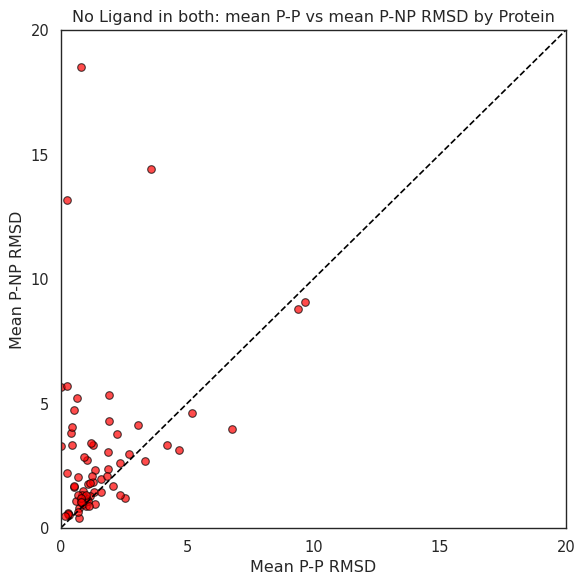

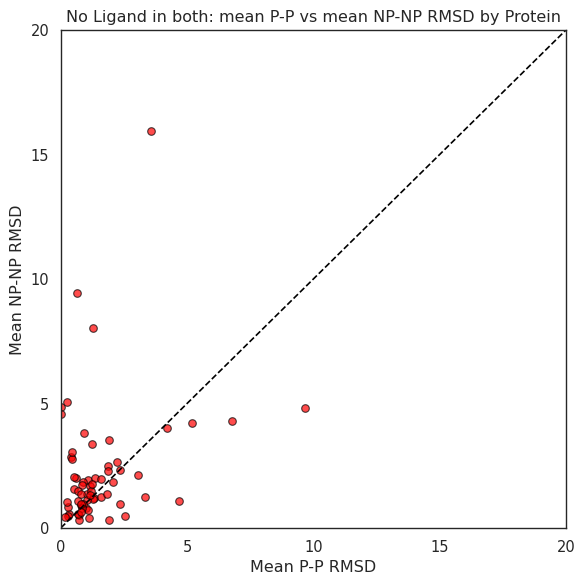

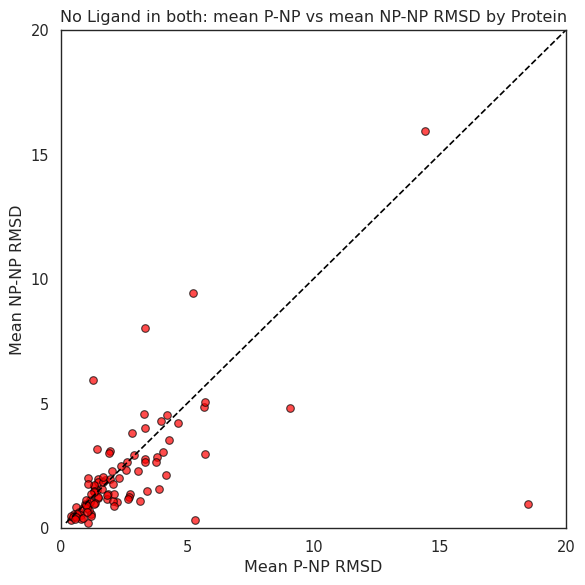

In [106]:
# Convert PDBsup_RMSD to numeric, coercing invalid entries to NaN
noLig_df["PDBsup_RMSD"] = pd.to_numeric(noLig_df["PDBsup_RMSD"], errors="coerce")

# Drop rows with NaN values in PDBsup_RMSD
noLig_df = noLig_df.dropna(subset=["PDBsup_RMSD"])

# Calculate mean values for P-P and P-NP
mean_values = noLig_df.groupby(["ACC_ID", "label"]).agg({"PDBsup_RMSD": "mean"}).unstack(fill_value=np.nan)

# Extract mean values for scatter plot
pp_mean = mean_values["PDBsup_RMSD"].get("P-P", np.nan)
pnp_mean = mean_values["PDBsup_RMSD"].get("P-NP", np.nan)
npnp_mean=mean_values["PDBsup_RMSD"].get("NP-NP", np.nan)

# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, pnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, pnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs P-NP balance)
min_val = min(pp_mean.min(), pnp_mean.min())
max_val = max(pp_mean.max(), pnp_mean.max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean P-NP RMSD")
plt.title("No Ligand in both: mean P-P vs mean P-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pp-pnp.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, npnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs NP-NP balance)
min_val = min(pp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("No Ligand in both: mean P-P vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pp-npnp.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pnp_mean, npnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pnp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-NP vs NP-NP balance)
min_val = min(pnp_mean.min(), npnp_mean.min())
max_val = max(pnp_mean.max(), npnp_mean.max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-NP RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("No Ligand in both: mean P-NP vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pnp-npnp.svg', format='svg', dpi=1200)
plt.show()



# Median 

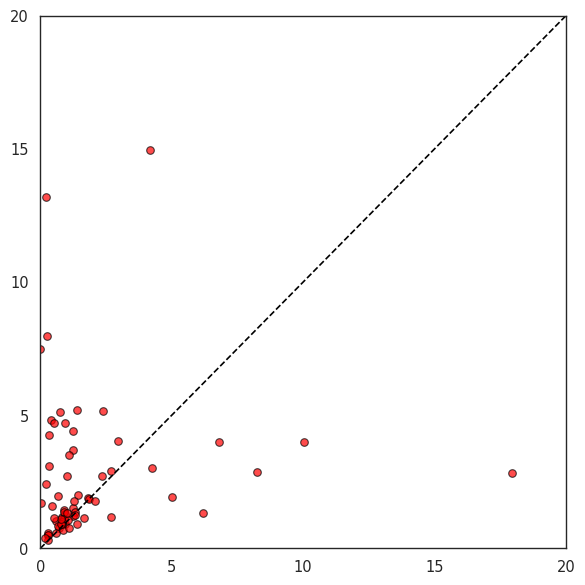

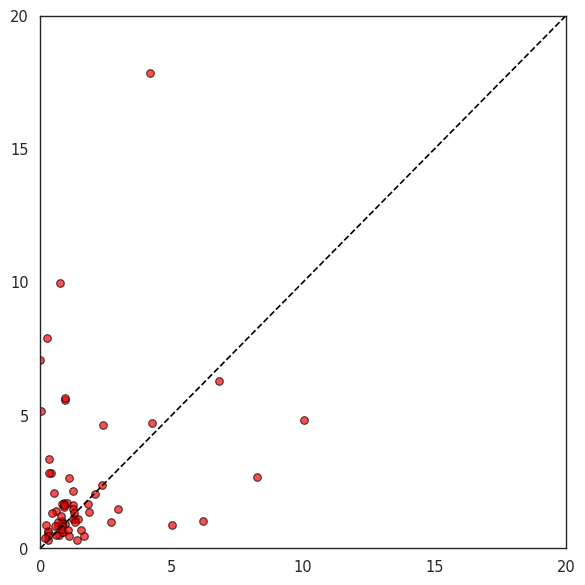

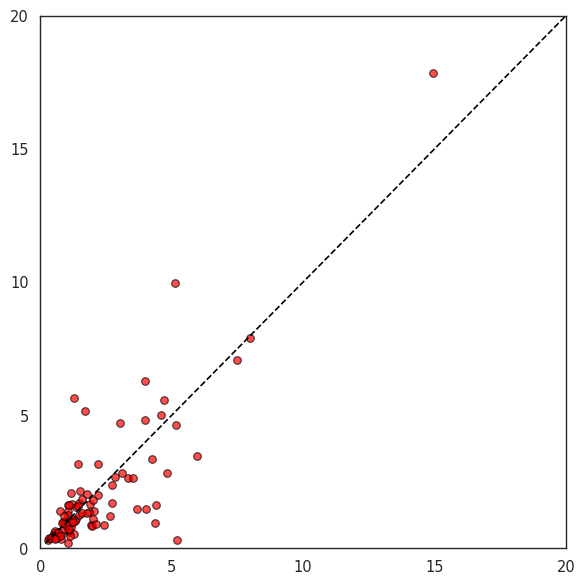

In [65]:
# Convert PDBsup_RMSD to numeric, coercing invalid entries to NaN
import numpy as np
noLig_df["PDBsup_RMSD"] = pd.to_numeric(noLig_df["PDBsup_RMSD"], errors="coerce")

# Drop rows with NaN values in PDBsup_RMSD
noLig_df = noLig_df.dropna(subset=["PDBsup_RMSD"])

# Calculate mean values for P-P and P-NP
mean_values = noLig_df.groupby(["ACC_ID", "label"]).agg({"PDBsup_RMSD": "median"}).unstack(fill_value=np.nan)

# Extract mean values for scatter plot
pp_mean = mean_values["PDBsup_RMSD"].get("P-P", np.nan)
pnp_mean = mean_values["PDBsup_RMSD"].get("P-NP", np.nan)
npnp_mean=mean_values["PDBsup_RMSD"].get("NP-NP", np.nan)

# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, pnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, pnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs P-NP balance)
min_val = min(pp_mean.min(), pnp_mean.min())
max_val = max(pp_mean.max(), pnp_mean.max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-P RMSD")
# plt.ylabel("Mean P-NP RMSD")
# plt.title("No Ligand in both: median P-P vs mean P-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pp-pnp_median.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, npnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs NP-NP balance)
min_val = min(pp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-P RMSD")
# plt.ylabel("Mean NP-NP RMSD")
# plt.title("No Ligand in both: mean P-P vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pp-npnp_median.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pnp_mean, npnp_mean, c="red", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pnp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-NP vs NP-NP balance)
min_val = min(pnp_mean.min(), npnp_mean.min())
max_val = max(pnp_mean.max(), npnp_mean.max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-NP RMSD")
# plt.ylabel("Mean NP-NP RMSD")
# plt.title("No Ligand in both: mean P-NP vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('noLig_pnp-npnp_median.svg', format='svg', dpi=1200)
plt.show()



## Ligand in both PDB

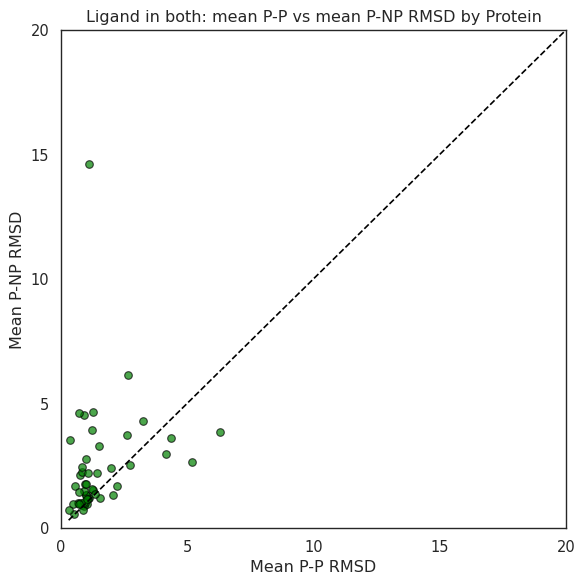

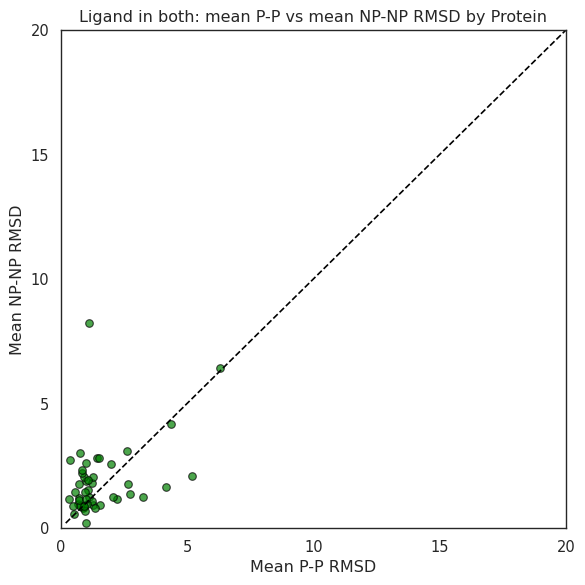

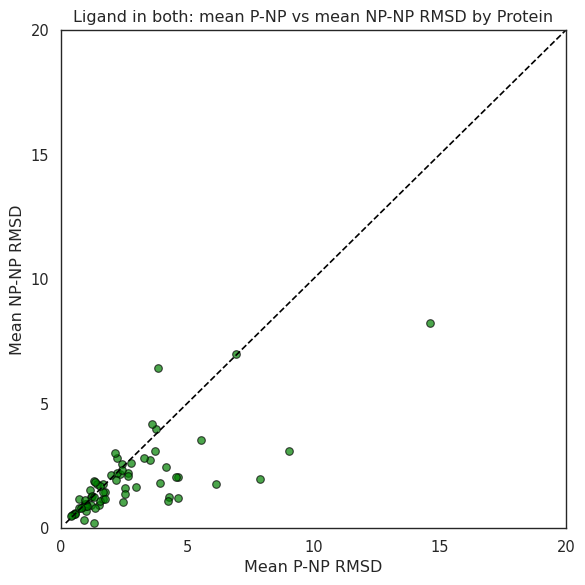

In [107]:
# Convert PDBsup_RMSD to numeric, coercing invalid entries to NaN
allLig_df["PDBsup_RMSD"] = pd.to_numeric(allLig_df["PDBsup_RMSD"], errors="coerce")

# Drop rows with NaN values in PDBsup_RMSD
allLig_df = allLig_df.dropna(subset=["PDBsup_RMSD"])

# Calculate mean values for P-P and P-NP
mean_values = allLig_df.groupby(["ACC_ID", "label"]).agg({"PDBsup_RMSD": "mean"}).unstack(fill_value=np.nan)

# Extract mean values for scatter plot
pp_mean = mean_values["PDBsup_RMSD"].get("P-P", np.nan)
pnp_mean = mean_values["PDBsup_RMSD"].get("P-NP", np.nan)
npnp_mean=mean_values["PDBsup_RMSD"].get("NP-NP", np.nan)

# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, pnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, pnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs P-NP balance)
min_val = min(pp_mean.min(), pnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean P-NP RMSD")
plt.title("Ligand in both: mean P-P vs mean P-NP RMSD by Protein")

plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Lig_pp-pnp.svg', format='svg', dpi=1200)
plt.show()




# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, npnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs NP-NP balance)
min_val = min(pp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("Ligand in both: mean P-P vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Lig_pp-npnp.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pnp_mean, npnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pnp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-NP vs NP-NP balance)
min_val = min(pnp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-NP RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("Ligand in both: mean P-NP vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5
# Show the plot
plt.tight_layout()
plt.savefig('Lig_pnp-npnp.svg', format='svg', dpi=1200)
plt.show()


## Median

/tmp/ipykernel_41/2339205497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allLig_df["PDBsup_RMSD"] = pd.to_numeric(allLig_df["PDBsup_RMSD"], errors="coerce")


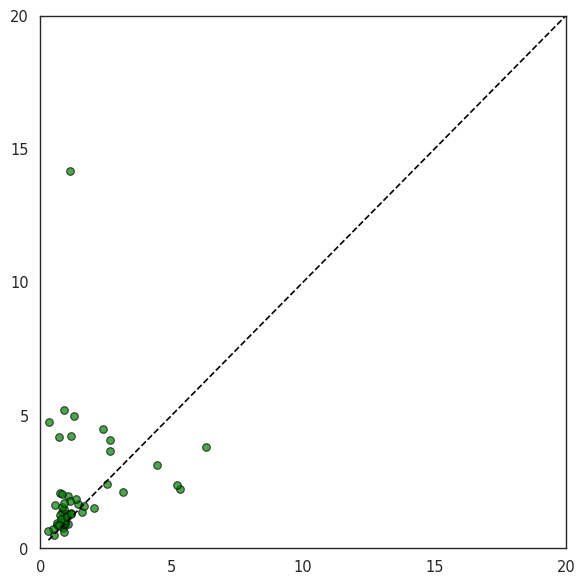

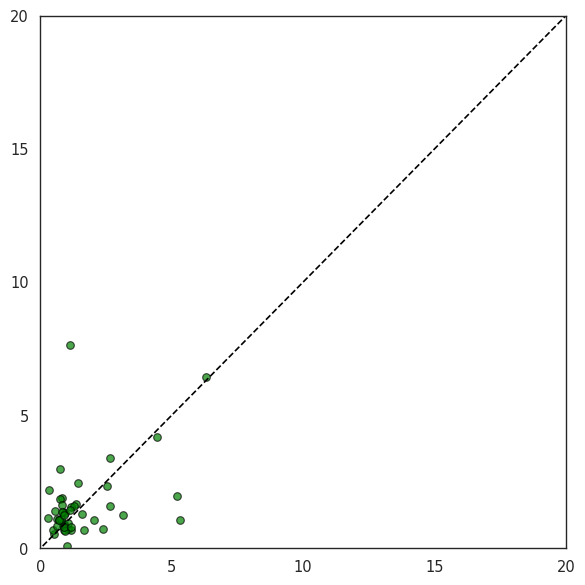

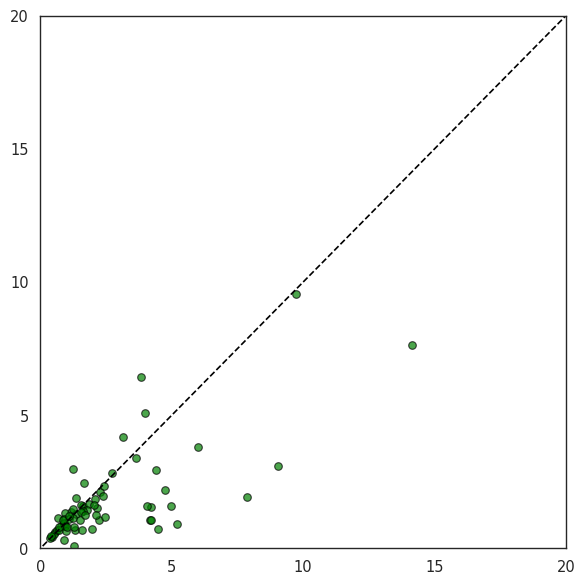

In [66]:
# Convert PDBsup_RMSD to numeric, coercing invalid entries to NaN
allLig_df["PDBsup_RMSD"] = pd.to_numeric(allLig_df["PDBsup_RMSD"], errors="coerce")

# Drop rows with NaN values in PDBsup_RMSD
allLig_df = allLig_df.dropna(subset=["PDBsup_RMSD"])

# Calculate mean values for P-P and P-NP
mean_values = allLig_df.groupby(["ACC_ID", "label"]).agg({"PDBsup_RMSD": "median"}).unstack(fill_value=np.nan)

# Extract mean values for scatter plot
pp_mean = mean_values["PDBsup_RMSD"].get("P-P", np.nan)
pnp_mean = mean_values["PDBsup_RMSD"].get("P-NP", np.nan)
npnp_mean=mean_values["PDBsup_RMSD"].get("NP-NP", np.nan)

# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, pnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, pnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs P-NP balance)
min_val = min(pp_mean.min(), pnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-P RMSD")
# plt.ylabel("Mean P-NP RMSD")
# plt.title("Ligand in both: mean P-P vs mean P-NP RMSD by Protein")

plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Lig_pp-pnp-median.svg', format='svg', dpi=1200)
plt.show()




# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, npnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs NP-NP balance)
min_val = min(pp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-P RMSD")
# plt.ylabel("Mean NP-NP RMSD")
# plt.title("Ligand in both: mean P-P vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Lig_pp-npnp-medain.svg', format='svg', dpi=1200)
plt.show()



# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pnp_mean, npnp_mean, c="green", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pnp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-NP vs NP-NP balance)
min_val = min(pnp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
# plt.xlabel("Mean P-NP RMSD")
# plt.ylabel("Mean NP-NP RMSD")
# plt.title("Ligand in both: mean P-NP vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5
# Show the plot
plt.tight_layout()
plt.savefig('Lig_pnp-npnp-median.svg', format='svg', dpi=1200)
plt.show()


## When Only one pdb has lignd 

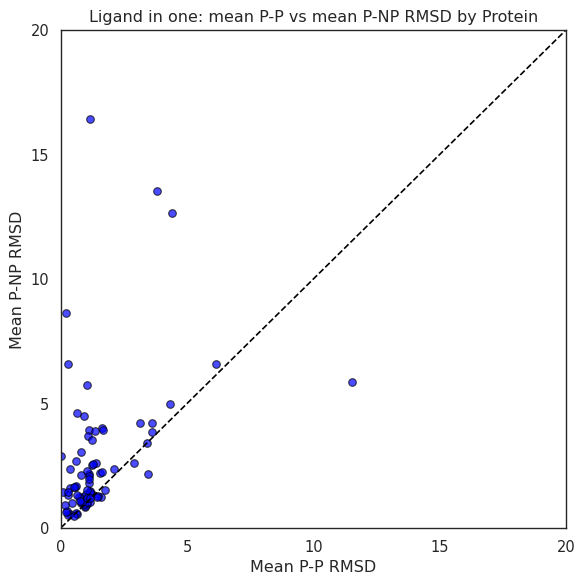

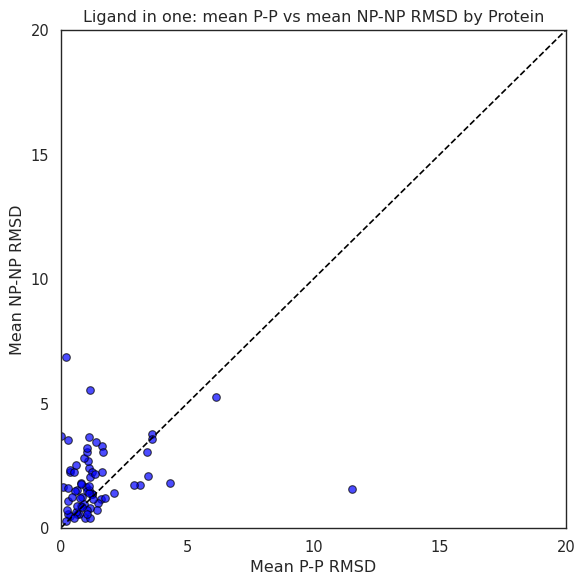

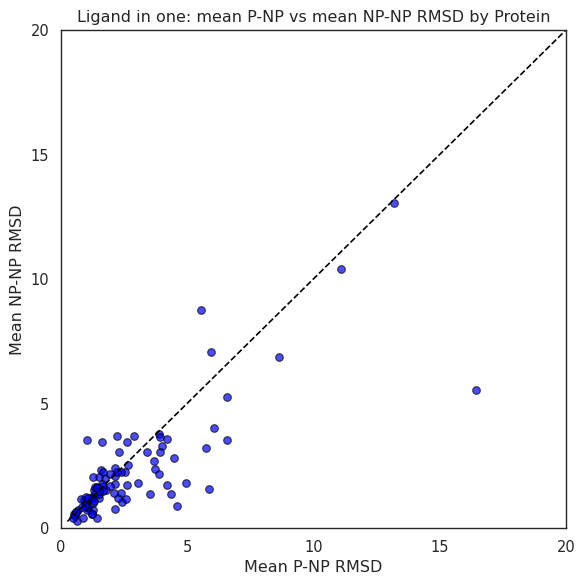

In [108]:
# Convert PDBsup_RMSD to numeric, coercing invalid entries to NaN
mixed_df["PDBsup_RMSD"] = pd.to_numeric(mixed_df["PDBsup_RMSD"], errors="coerce")

# Drop rows with NaN values in PDBsup_RMSD
mixed_df = mixed_df.dropna(subset=["PDBsup_RMSD"])

# Calculate mean values for P-P and P-NP
mean_values = mixed_df.groupby(["ACC_ID", "label"]).agg({"PDBsup_RMSD": "mean"}).unstack(fill_value=np.nan)

# Extract mean values for scatter plot
pp_mean = mean_values["PDBsup_RMSD"].get("P-P", np.nan)
pnp_mean = mean_values["PDBsup_RMSD"].get("P-NP", np.nan)
npnp_mean=mean_values["PDBsup_RMSD"].get("NP-NP", np.nan)

# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, pnp_mean, c="blue", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, pnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs P-NP balance)
min_val = min(pp_mean.min(), pnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean P-NP RMSD")
plt.title("Ligand in one: mean P-P vs mean P-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Mix-Lig_pp-pnp.svg', format='svg', dpi=1200)
plt.show()




# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pp_mean, npnp_mean, c="blue", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-P vs NP-NP balance)
min_val = min(pp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")

# Customization
# Customization
plt.xlabel("Mean P-P RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("Ligand in one: mean P-P vs mean NP-NP RMSD by Protein")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5

# Show the plot
plt.tight_layout()
plt.savefig('Mix-Lig_pp-npnp.svg', format='svg', dpi=1200)
plt.show()


# Set up the figure for scatter plot
plt.figure(figsize=(6, 6))

# ✅ Scatter plot with P-P on X-axis and P-NP on Y-axis
plt.scatter(pnp_mean, npnp_mean, c="blue", s=30, alpha=0.7, edgecolor="k")

# Annotate the points with ACC_ID for better identification
# for acc_id, (x, y) in zip(mean_values.index, zip(pnp_mean, npnp_mean)):
#     plt.annotate(acc_id, (x, y), fontsize=5)

# Line for reference (if you want to check P-NP vs NP-NP balance)
min_val = min(pnp_mean.min(), npnp_mean.min())
max_val = max(20, 20)
plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="--")
plt.xlim(0,20)
plt.ylim(0,20)
plt.xticks(np.arange(0, 21, 5))  # Step size of 5
plt.yticks(np.arange(0, 21, 5))  # Step size of 5
# Customization
# Customization
plt.xlabel("Mean P-NP RMSD")
plt.ylabel("Mean NP-NP RMSD")
plt.title("Ligand in one: mean P-NP vs mean NP-NP RMSD by Protein")

# Show the plot
plt.tight_layout()
plt.savefig('Mix-Lig_pnp-npnp.svg', format='svg', dpi=1200)
plt.show()


## Medain

In [ ]:
## Statistical tests


In [120]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Imagine we have three DataFrames: df_ligand, df_no_ligand, df_mixed
# All DataFrames should have the same columns: ACC_ID, prot1, prot2, PDBsupRMSD, label

# Combine all DataFrames into one for analysis
allLig_df['category'] = 'Ligand'
noLig_df['category'] = 'No Ligand'
mixed_df['category'] = 'Mixed'

combined_df = pd.concat([allLig_df, noLig_df,mixed_df])

# 1. ANOVA: Compare RMSD for each label across ligand categories
anova_results = {}
for label in combined_df['label'].unique():
    subset = combined_df[combined_df['label'] == label]
    anova_result = stats.f_oneway(
        subset[subset['category'] == 'Ligand']['PDBsup_RMSD'],
        subset[subset['category'] == 'No Ligand']['PDBsup_RMSD'],
        subset[subset['category'] == 'Mixed']['PDBsup_RMSD']
    )
    anova_results[label] = anova_result

# Print ANOVA results
print("ANOVA Results for each label:")
for label, result in anova_results.items():
    print(f"{label}: F-statistic = {result.statistic}, p-value = {result.pvalue}")

# 2. Pairwise Tukey HSD test for significant differences
print("\nPairwise Tukey HSD Test:")
for label in combined_df['label'].unique():
    subset = combined_df[combined_df['label'] == label]
    tukey = pairwise_tukeyhsd(subset['PDBsup_RMSD'], subset['category'], alpha=0.05)
    print(f"Tukey HSD for {label}:\n", tukey)



ANOVA Results for each label:
P-P: F-statistic = 124.84355918420005, p-value = 7.312012436877031e-55
NP-NP: F-statistic = 1049.4570337832777, p-value = 0.0
P-NP: F-statistic = 304.09639420562445, p-value = 1.818908498681108e-132

Pairwise Tukey HSD Test:
Tukey HSD for P-P:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
Ligand     Mixed  -0.0706 0.0022 -0.1197 -0.0214   True
Ligand No Ligand  -0.2715    0.0 -0.3209  -0.222   True
 Mixed No Ligand  -0.2009    0.0 -0.2364 -0.1654   True
-------------------------------------------------------
Tukey HSD for NP-NP:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1   group2  meandiff p-adj  lower  upper  reject
-----------------------------------------------------
Ligand     Mixed   0.3063    0.0 0.2884 0.3241   True
Ligand No Ligand   0.3304    0.0 0.3127 0.3481   True
 Mixed No Ligand   0.0241 0.0001 0.0102  

In [121]:
# 3. Two-way ANOVA: Test for interaction between label and ligand category
# Convert categorical columns to numeric for modeling


# Example input: combined_df with columns ACC_ID, prot1, prot2, PDBsupRMSD, label (P-P, P-NP, NP-NP), and category (Ligand, No Ligand, Mixed)

# Ensure no NaN values in key columns
combined_df = combined_df.dropna(subset=['PDBsup_RMSD', 'label', 'category'])

# Check group sizes
group_sizes = combined_df.groupby(['label', 'category']).size()
print("Group Sizes:\n", group_sizes)

# Ensure all combinations of 'label' and 'category' exist
for label in combined_df['label'].unique():
    for category in combined_df['category'].unique():
        if (label, category) not in group_sizes.index:
            print(f"Adding placeholder for missing group: Label = {label}, Category = {category}")
            combined_df = combined_df.append({
                'ACC_ID': None,
                'prot1': None,
                'prot2': None,
                'PDBsup_RMSD': combined_df['PDBsup_RMSD'].mean(),  # Placeholder RMSD value
                'label': label,
                'category': category
            }, ignore_index=True)

# Recheck group sizes after fixing missing groups
group_sizes = combined_df.groupby(['label', 'category']).size()
print("\nUpdated Group Sizes:\n", group_sizes)

# Two-Way ANOVA (Handles unbalanced groups)
print("\nRunning Two-Way ANOVA on Original Data (Unbalanced Groups):")
model = ols('PDBsup_RMSD ~ C(label) * C(category)', data=combined_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
print("\nTwo-Way ANOVA Results:")
print(anova_table)



Group Sizes:
 label  category 
NP-NP  Ligand        47397
       Mixed        104520
       No Ligand    110834
P-NP   Ligand        26245
       Mixed         60895
       No Ligand     35201
P-P    Ligand        12123
       Mixed         35560
       No Ligand     33799
dtype: int64

Updated Group Sizes:
 label  category 
NP-NP  Ligand        47397
       Mixed        104520
       No Ligand    110834
P-NP   Ligand        26245
       Mixed         60895
       No Ligand     35201
P-P    Ligand        12123
       Mixed         35560
       No Ligand     33799
dtype: int64

Running Two-Way ANOVA on Original Data (Unbalanced Groups):

Two-Way ANOVA Results:
                            sum_sq        df             F        PR(>F)
C(label)              2.139271e+05       2.0  30172.969556  0.000000e+00
C(category)           4.086605e+02       2.0     57.638804  9.351420e-26
C(label):C(category)  8.698434e+03       4.0    613.427703  0.000000e+00
Residual              1.653978e+06  4665

In [124]:
# Extend correlation analysis for additional pair types
pair_combinations = [('P-P', 'P-NP'), ('P-P', 'NP-NP'), ('P-NP', 'NP-NP')]
correlation_results = {}

for pair1, pair2 in pair_combinations:
    correlation_results[f"{pair1} vs {pair2}"] = {}
    for category, group in combined_df[combined_df['label'].isin([pair1, pair2])].groupby('category'):
        # Resolve duplicates by aggregating with mean RMSD for each ACC_ID and label
        aggregated = group.groupby(['ACC_ID', 'label'], as_index=False).agg({'PDBsup_RMSD': 'mean'})

        # Pivot the data to align pair1 and pair2 by ACC_ID
        pivot = aggregated.pivot(index='ACC_ID', columns='label', values='PDBsup_RMSD')

        # Drop rows with missing values (to ensure equal lengths)
        pivot = pivot.dropna(subset=[pair1, pair2])

        # Calculate Pearson correlation
        if not pivot.empty:
            corr, p_value = stats.pearsonr(pivot[pair1], pivot[pair2])
            correlation_results[f"{pair1} vs {pair2}"][category] = (corr, p_value)
        else:
            correlation_results[f"{pair1} vs {pair2}"][category] = (None, None)  # No valid data for correlation

# Display correlation results
print("\nExtended Correlation Results:")
for pair, results in correlation_results.items():
    print(f"\n{pair}:")
    for category, (corr, p_value) in results.items():
        if corr is not None:
            print(f"  {category}: Correlation = {corr:.2f}, p-value = {p_value.round(4)}")
        else:
            print(f"  {category}: No valid data for correlation.")



Extended Correlation Results:

P-P vs P-NP:
  Ligand: Correlation = 0.23, p-value = 0.1038
  Mixed: Correlation = 0.40, p-value = 0.0002
  No Ligand: Correlation = 0.26, p-value = 0.0311

P-P vs NP-NP:
  Ligand: Correlation = 0.41, p-value = 0.0039
  Mixed: Correlation = 0.18, p-value = 0.13
  No Ligand: Correlation = 0.27, p-value = 0.0313

P-NP vs NP-NP:
  Ligand: Correlation = 0.74, p-value = 0.0
  Mixed: Correlation = 0.79, p-value = 0.0
  No Ligand: Correlation = 0.50, p-value = 0.0


## Domain analysis

In [14]:
domainpdb=af3eval_df[['ACC_ID','prot1','prot2','RMSD_type']].copy()
domainpdb=domainpdb.loc[domainpdb.RMSD_type=='global']
domainpdb

,ACC_ID,prot1,prot2,RMSD_type
0,P07949,6vhg_A,6nec_A,global
2,Q9UP95,7aip_A,7aiq_A,global
4,P22681,4a49_A,2k4d_A,global
6,P04406,6ade_A,3gpd_G,global
8,Q92731,3oll_A,2yly_B,global
...,...,...,...,...
208,P22607,6lvm_A,4k33_A,global
210,P35557,3qic_A,1v4t_A,global
212,Q5S007,6vp6_A,6ojf_A,global
214,Q92918,6nfz_A,7siu_A,global


In [10]:
import requests
import pandas as pd


import requests

def fetch_pdb_domains(uniprot_id, pdb_id, chain_id):
   
    url = f"https://www.ebi.ac.uk/pdbe/api/mappings/best_structures/{uniprot_id}"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error fetching data for UniProt ID {uniprot_id}: {response.status_code}")
        return None

    data = response.json()
    if uniprot_id not in data:
        print(f"No data found for UniProt ID: {uniprot_id}")
        return None

    domain_info = []

    for entry in data[uniprot_id]:
        if entry['pdb_id'].lower() == pdb_id.lower() and entry['chain_id'] == chain_id:
            domain_info.append({
                "Start": entry['unp_start'],
                "End": entry['unp_end']
            })

    if domain_info:
        return domain_info
    else:
        print(f"No matching domains found for {pdb_id} Chain {chain_id}.")
        return None



# Function to fetch domain information from InterPro API


def get_interpro_domains(acc_id):
    """
    Fetch domain information for a given UniProt ACC_ID from InterPro API.
    """
    url = f"https://www.ebi.ac.uk/interpro/api/entry/interpro/protein/uniprot/{acc_id}"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch data for {acc_id}")
        return []
    
    data = response.json()
    iprdomains = []
    
    # Extract domain information from InterPro API correctly
    for entry in data.get('results', []):
        if entry['metadata']['type'] == 'domain':  # Only extract domains
            for protein in entry.get("proteins", []):
                for location in protein.get("entry_protein_locations", []):
                    for fragment in location.get("fragments", []):
                        iprdomains.append({
                            "ACC_ID": acc_id,
                            "Domain": entry["metadata"]["name"],
                            "Start": fragment["start"],
                            "End": fragment["end"],
                            "InterPro_ID": entry["metadata"]["accession"]
                        })
    return iprdomains

# Main function to process the dataframe
def process_domains(df):
    x=0
    results = []
    for _, row in df.iterrows():
        x+=1
        acc_id = row["ACC_ID"]
        print ("Processing protein", acc_id,x)
        prot1 = row["prot1"]
        prot2 = row["prot2"]
        pdb1_id, chain1 = prot1.split("_")
        pdb2_id, chain2 = prot2.split("_")

        # Fetch UniProt domains
        uniprot_domains = get_interpro_domains(acc_id)

        # Fetch PDB domains for prot1 and prot2
        pdb1_domains = fetch_pdb_domains(acc_id,pdb1_id, chain1)
        pdb2_domains = fetch_pdb_domains(acc_id,pdb2_id, chain2)

        # Append combined information
        for domain in uniprot_domains:
            results.append({
                "ACC_ID": acc_id,
                "prot1": prot1,
                "prot2": prot2,
                "uniprot_domain": domain["Domain"],
                "domain_start": domain["Start"],
                "domain_end": domain["End"],
                "pdb1_start": pdb1_domains[0]["Start"] if pdb1_domains else None,
                "pdb1_end": pdb1_domains[0]["End"] if pdb1_domains else None,
                "pdb2_start": pdb2_domains[0]["Start"] if pdb2_domains else None,
                "pdb2_end": pdb2_domains[0]["End"] if pdb2_domains else None,
            })

    # Return as DataFrame
    return pd.DataFrame(results)



# Process the domains
domain_df_new = process_domains(domainpdb)



In [16]:
domain_df_new

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end
0,P07949,6vhg_A,6nec_A,Protein kinase domain,724,1016,705,1013,705,1013
1,P07949,6vhg_A,6nec_A,"Serine-threonine/tyrosine-protein kinase, cata...",725,1005,705,1013,705,1013
2,P07949,6vhg_A,6nec_A,Cadherin-like,168,272,705,1013,705,1013
3,P07949,6vhg_A,6nec_A,"Tyrosine-protein kinase, catalytic domain",724,1005,705,1013,705,1013
4,P07949,6vhg_A,6nec_A,"Tyrosine-protein kinase receptor Ret, cadherin...",265,379,705,1013,705,1013
...,...,...,...,...,...,...,...,...,...,...
438,Q5S007,6vp6_A,6ojf_A,Roc domain,1328,1511,1327,2527,1329,1520
439,Q5S007,6vp6_A,6ojf_A,C-terminal of Roc (COR) domain,1546,1740,1327,2527,1329,1520
440,Q92918,6nfz_A,7siu_A,Protein kinase domain,17,274,1,307,2,295
441,Q92918,6nfz_A,7siu_A,Citron homology (CNH) domain,495,807,1,307,2,295


In [17]:
domain_df_new.ACC_ID.nunique()

104

In [18]:
##Protein without domains
set(domainpdb.ACC_ID.tolist())-set(domain_df_new.ACC_ID.tolist())

{'O75531', 'P05187', 'P0DMV8', 'P15693', 'P37840'}

In [19]:
import pandas as pd

def filter_longest_overlapping_domains(domain_df_new):
    # Convert start and end positions to numeric for safety
    domain_df_new["domain_start"] = pd.to_numeric(domain_df_new["domain_start"], errors="coerce")
    domain_df_new["domain_end"] = pd.to_numeric(domain_df_new["domain_end"], errors="coerce")

    # Sort the dataframe to prepare for merging overlapping regions
    domain_df_new = domain_df_new.sort_values(by=["ACC_ID", "domain_start", "domain_end"]).reset_index(drop=True)

    longest_domains = []  # List to store the longest regions

    # Iterate through the dataframe protein by protein
    for acc_id, group in domain_df_new.groupby("ACC_ID"):
        # Sort each group based on the domain start position
        merged_intervals = []

        # Process each row in the group
        for _, row in group.iterrows():
            # If merged_intervals is empty, add the first domain
            if not merged_intervals:
                merged_intervals.append(row)
            else:
                # Compare the current domain with the last added one
                last_entry = merged_intervals[-1]
                # If overlapping or touching, extend the domain range
                if row["domain_start"] <= last_entry["domain_end"]:
                    merged_intervals[-1]["domain_end"] = max(last_entry["domain_end"], row["domain_end"])
                else:
                    # Otherwise, add the new non-overlapping domain
                    merged_intervals.append(row)

        # Store the longest merged region
        longest_domains.extend(merged_intervals)

    # Convert results back to a DataFrame
    longest_df = pd.DataFrame(longest_domains).reset_index(drop=True)
    return longest_df

# ✅ Example usage
longest_domains_df = filter_longest_overlapping_domains(domain_df_new)

# Display the filtered dataframe


In [20]:
longest_domains_df

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669
1,O14920,4kik_A,4e3c_A,"IKBKB, scaffold dimerization domain",389,663,2,664,11,669
2,O14920,4kik_A,4e3c_A,I-kappa-kinase-beta NEMO binding domain,705,742,2,664,11,669
3,O14939,6ohp_A,6ohq_B,Phox homology,64,195,294,933,294,933
4,O14939,6ohp_A,6ohq_B,Pleckstrin homology domain,203,313,294,933,294,933
...,...,...,...,...,...,...,...,...,...,...
251,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085
252,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",840,1085,20,1085,20,1085
253,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315
254,Q9Y6E0,3a7i_A,8qlq_A,Protein kinase domain,36,286,10,315,4,301


In [21]:
longest_domains_df.ACC_ID.nunique()

104

In [22]:
longest_domains_df.to_csv('longest_domains_df.txt',sep='\t',index=False)

In [18]:
longest_domains_df=pd.read_csv('longest_domains_df.txt',sep='\t')

In [23]:
longest_domains_df.loc[longest_domains_df.ACC_ID=='Q9UP95']

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end
249,Q9UP95,7aip_A,7aiq_A,Amino acid permease/ SLC12A domain,124,300,20,1085,20,1085
250,Q9UP95,7aip_A,7aiq_A,Amino acid permease/ SLC12A domain,418,695,20,1085,20,1085
251,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085
252,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",840,1085,20,1085,20,1085


In [19]:

def check_pdb_domains_with_unique_names(longest_domains_df):
    # Convert columns to numeric for safety
    for col in ["domain_start", "domain_end", "pdb1_start", "pdb1_end", "pdb2_start", "pdb2_end"]:
        longest_domains_df[col] = pd.to_numeric(longest_domains_df[col], errors="coerce")

    results = []

    # Group by ACC_ID, prot1, and prot2
    for (acc_id, prot1, prot2), group in longest_domains_df.groupby(["ACC_ID", "prot1", "prot2"]):
        # Remove duplicate domain names and count unique domains
        unique_domains_prot1 = group[
            (group["domain_start"] <= group["pdb1_end"]) & 
            (group["domain_end"] >= group["pdb1_start"])
        ]["uniprot_domain"].unique()

        unique_domains_prot2 = group[
            (group["domain_start"] <= group["pdb2_end"]) & 
            (group["domain_end"] >= group["pdb2_start"])
        ]["uniprot_domain"].unique()

        prot1_modelled_domains = len(unique_domains_prot1)
        prot2_modelled_domains = len(unique_domains_prot2)

        # Add results to the list
        results.append({
            "ACC_ID": acc_id,
            "prot1": prot1,
            "prot2": prot2,
            "prot1_domain_count": prot1_modelled_domains,
            "prot2_domain_count": prot2_modelled_domains,
            "prot1_modelled_as": "Multiple domains" if prot1_modelled_domains > 1 else "Single domain",
            "prot2_modelled_as": "Multiple domains" if prot2_modelled_domains > 1 else "Single domain"
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Apply the updated function for overlap with unique domains
overlap_results_df = check_pdb_domains_with_unique_names(longest_domains_df)

# Display the updated results
overlap_results_df


,ACC_ID,prot1,prot2,prot1_domain_count,prot2_domain_count,prot1_modelled_as,prot2_modelled_as
0,O14920,4kik_A,4e3c_A,2,2,Multiple domains,Multiple domains
1,O14939,6ohp_A,6ohq_B,3,3,Multiple domains,Multiple domains
2,O14965,5l8l_A,8of5_A,1,1,Single domain,Single domain
3,O15075,7kxw_A,5jzj_A,1,1,Single domain,Single domain
4,O15151,4rxz_A,2n14_A,1,1,Single domain,Single domain
...,...,...,...,...,...,...,...
99,Q9UK32,6g76_A,6g77_A,1,1,Single domain,Single domain
100,Q9UKE5,6ra7_A,8x88_B,1,1,Single domain,Single domain
101,Q9UP95,7aip_A,7aiq_A,2,2,Multiple domains,Multiple domains
102,Q9Y572,7mon_B,7mx3_A,1,1,Single domain,Single domain


### No data in Interpro for these proteins 

In [21]:
set(domainpdb.ACC_ID.tolist())-set(overlap_results_df.ACC_ID.tolist())

{'O75531', 'P05187', 'P0DMV8', 'P15693', 'P37840'}

In [22]:
rmsd_df_new=af3eval_df[['ACC_ID','prot1','prot2','RMSD_type','PDBsup_RMSD']].copy()
rmsd_df_new=rmsd_df_new.loc[rmsd_df_new.RMSD_type=='global']
rmsd_df_new

,ACC_ID,prot1,prot2,RMSD_type,PDBsup_RMSD
0,P07949,6vhg_A,6nec_A,global,2.14
2,Q9UP95,7aip_A,7aiq_A,global,0.68
4,P22681,4a49_A,2k4d_A,global,12.59
6,P04406,6ade_A,3gpd_G,global,1.24
8,Q92731,3oll_A,2yly_B,global,3.70
...,...,...,...,...,...
208,P22607,6lvm_A,4k33_A,global,1.22
210,P35557,3qic_A,1v4t_A,global,9.79
212,Q5S007,6vp6_A,6ojf_A,global,8.88
214,Q92918,6nfz_A,7siu_A,global,6.40


In [23]:
domain_rmsd=overlap_results_df.merge(rmsd_df_new,on=['ACC_ID','prot1','prot2'])

In [24]:
domain_rmsd.to_csv('domain_rmsd.txt',sep='\t',index=False)

In [30]:
domain_rmsd

,ACC_ID,prot1,prot2,prot1_domain_count,prot2_domain_count,prot1_modelled_as,prot2_modelled_as,RMSD_type,PDBsup_RMSD
0,O14920,4kik_A,4e3c_A,2,2,Multiple domains,Multiple domains,global,2.94
1,O14939,6ohp_A,6ohq_B,3,3,Multiple domains,Multiple domains,global,0.73
2,O14965,5l8l_A,8of5_A,1,1,Single domain,Single domain,global,7.18
3,O15075,7kxw_A,5jzj_A,1,1,Single domain,Single domain,global,1.91
4,O15151,4rxz_A,2n14_A,1,1,Single domain,Single domain,global,2.79
...,...,...,...,...,...,...,...,...,...
99,Q9UK32,6g76_A,6g77_A,1,1,Single domain,Single domain,global,0.40
100,Q9UKE5,6ra7_A,8x88_B,1,1,Single domain,Single domain,global,4.79
101,Q9UP95,7aip_A,7aiq_A,2,2,Multiple domains,Multiple domains,global,0.68
102,Q9Y572,7mon_B,7mx3_A,1,1,Single domain,Single domain,global,2.13


In [25]:
domain_rmsd.loc[domain_rmsd.ACC_ID=='Q3UP24']

,ACC_ID,prot1,prot2,prot1_domain_count,prot2_domain_count,prot1_modelled_as,prot2_modelled_as,RMSD_type,PDBsup_RMSD
83,Q3UP24,4kxf_B,6b5b_B,4,4,Multiple domains,Multiple domains,global,18.09


In [26]:
longest_domains_df.loc[longest_domains_df.ACC_ID=='Q3UP24']

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end
210,Q3UP24,4kxf_B,6b5b_B,CARD domain,1,88,1,1024,1,1024
211,Q3UP24,4kxf_B,6b5b_B,NACHT nucleoside triphosphatase,163,310,1,1024,1,1024
212,Q3UP24,4kxf_B,6b5b_B,"Nlrc4-like, winged helix domain",385,440,1,1024,1,1024
213,Q3UP24,4kxf_B,6b5b_B,"NLRC4, helical domain",465,579,1,1024,1,1024


In [27]:
multi_condition=(domain_rmsd.prot1_modelled_as=='Multiple domains')&(domain_rmsd.prot2_modelled_as=='Multiple domains')
single_condition=(domain_rmsd.prot1_modelled_as=='Single domain')&(domain_rmsd.prot2_modelled_as=='Single domain')
multi_both=domain_rmsd[multi_condition]
single_both=domain_rmsd[single_condition]
mixed_dom=domain_rmsd[~(multi_condition | single_condition)]

multi_both.ACC_ID.nunique(),single_both.ACC_ID.nunique(),mixed_dom.ACC_ID.nunique()

(22, 73, 9)

In [11]:
single_both['label']='single domain'
multi_both['label']='multi domain'
mixed_dom['label']='mixed'

domain_final=pd.concat([single_both,multi_both,mixed_dom])
domain_final

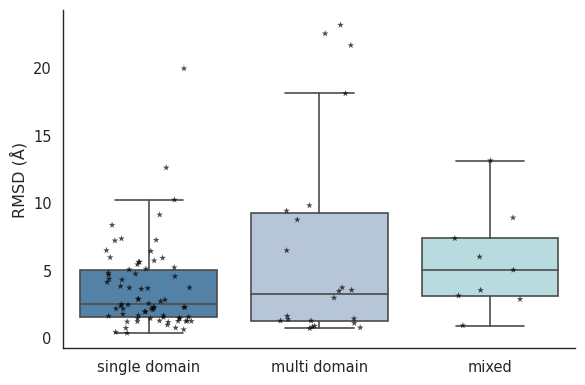

In [106]:
plt.figure(figsize=(6, 4))

# Boxplot with hue (label)
sns.boxplot(x="label", y="PDBsup_RMSD", data=domain_final, showfliers=False,palette=['steelblue',\
                                                                                     'lightsteelblue','powderblue'] , dodge=False)

# Stripplot with black color
sns.stripplot(x="label", y="PDBsup_RMSD", data=domain_final, color="black", 
              dodge=False, marker='*', edgecolor='gray', alpha=0.7, jitter=0.25)

# Customize plot
# plt.title("PDBsup_RMSD Grouped by Label")
plt.xlabel("")
plt.ylabel("RMSD (Å)")

# Prevent double legends by removing the second one
# plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
sns.despine()

plt.tight_layout()
plt.savefig('domain_rmsd.svg', format='svg', dpi=1200)

plt.show()


In [37]:
pdbposdf=pd.read_csv('paired_df_str_NPall.txt',sep='\t')
# pdbposdf[['ACC_ID','PDBID_1','CHAINID_1','P_STATUS_1','newpos_1','PDBID_2','CHAINID_2','P_STATUS_2','newpos_2']]
pdbposdf['prot1']=pdbposdf['PDBID_1']+'_'+pdbposdf['CHAINID_1']
pdbposdf['prot2']=pdbposdf['PDBID_2']+'_'+pdbposdf['CHAINID_2']
pdbposdf[['ACC_ID','prot1','P_STATUS_1','newpos_1','prot2','P_STATUS_2','newpos_2']]


,ACC_ID,prot1,P_STATUS_1,newpos_1,prot2,P_STATUS_2,newpos_2
0,Q13627,6s14_A,P,321,8t2h_A,NP,321
1,O15530,5lvo_A,P,241,3pwy_A,NP,241
2,Q9UKE5,6ra7_A,P,"181,187",8x88_B,NP,"187,193"
3,O60674,8bxh_A,P,"1007,1008",4bbe_A,NP,"1007,1008"
4,O60674,8bxh_A,P,"1007,1008",4bbf_A,NP,"1007,1008"
...,...,...,...,...,...,...,...
2713,P27577,2kmd_A,P,"38,41",2jv3_A,NP,"38,41"
2714,P46108,2dvj_A,P,221,2eyz_A,NP,221
2715,P46109,2lqw_A,P,207,2lqn_A,NP,207
2716,Q61686,2rvm_A,P,"11,12,13,14",2rvl_A,NP,"11,12,13,14"


In [38]:
domain_new=longest_domains_df.merge(pdbposdf[['ACC_ID','prot1','P_STATUS_1','newpos_1','prot2','P_STATUS_2','newpos_2']]\
                        ,on=['ACC_ID','prot1','prot2'])


# Sorting 'newpos_1' and 'newpos_2' as incrementing lists
domain_new["newpos_1"] = domain_new["newpos_1"].apply(lambda x: ",".join(list(set(x.split(',')))))
domain_new["newpos_2"] = domain_new["newpos_2"].apply(lambda x: ",".join(list(set(x.split(',')))))

domain_new["newpos_1"] = domain_new["newpos_1"].apply(lambda x: ",".join(sorted(x.split(','), key=int)))
domain_new["newpos_2"] = domain_new["newpos_2"].apply(lambda x: ",".join(sorted(x.split(','), key=int)))

domain_new

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669,P,257,NP,257
1,O14920,4kik_A,4e3c_A,"IKBKB, scaffold dimerization domain",389,663,2,664,11,669,P,257,NP,257
2,O14920,4kik_A,4e3c_A,I-kappa-kinase-beta NEMO binding domain,705,742,2,664,11,669,P,257,NP,257
3,O14939,6ohp_A,6ohq_B,Phox homology,64,195,294,933,294,933,P,573,NP,573
4,O14939,6ohp_A,6ohq_B,Pleckstrin homology domain,203,313,294,933,294,933,P,573,NP,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,"734,916",NP,"734,916"
252,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",840,1085,20,1085,20,1085,P,"734,916",NP,"734,916"
253,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,"224,227",NP,"224,227"
254,Q9Y6E0,3a7i_A,8qlq_A,Protein kinase domain,36,286,10,315,4,301,P,178,NP,190


In [39]:
domain_new.to_csv('domain_new.txt',sep='\t',index=False)

In [39]:
import pandas as pd

def check_newpos_in_domain_range(domain_new_df):
    # Convert columns to numeric for safety
    for col in ["domain_start", "domain_end", "pdb1_start", "pdb1_end", "pdb2_start", "pdb2_end"]:
        domain_new_df[col] = pd.to_numeric(domain_new_df[col], errors="coerce")

    results = []

    # Function to check positions against the domain range
    def annotate_positions(positions, start, end):
        """Check if each position is within the domain range and annotate."""
        if pd.isna(positions):
            return "-"
        pos_list = [int(pos) for pos in str(positions).split(',')]
        annotations = ["domain" if start <= pos <= end else "-" for pos in pos_list]
        return ",".join(annotations)

    # Group by ACC_ID, prot1, and prot2 for processing
    for (acc_id, prot1, prot2), group in domain_new_df.groupby(["ACC_ID", "prot1", "prot2"]):

        # Apply the annotation check
        group["domain_newpos_1"] = group.apply(
            lambda row: annotate_positions(row["newpos_1"], row["domain_start"], row["domain_end"]), axis=1
        )
        group["domain_newpos_2"] = group.apply(
            lambda row: annotate_positions(row["newpos_2"], row["domain_start"], row["domain_end"]), axis=1
        )

        # Filter rows where no positions fall inside the domain range for both columns
        group = group[
            (group["domain_newpos_1"].str.contains("domain")) | 
            (group["domain_newpos_2"].str.contains("domain"))
        ]

        # Collect the modified rows
        results.append(group)

    # Concatenate results into a single dataframe
    results_df = pd.concat(results).reset_index(drop=True)
    return results_df

# Apply the updated function
updated_domain_new_df = check_newpos_in_domain_range(domain_new)

# Display the filtered dataframe with annotations
updated_domain_new_df


,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669,P,257,NP,257,domain,domain
1,O14965,5l8l_A,8of5_A,Aurora kinase A,127,384,122,403,122,403,P,288,NP,288,domain,domain
2,O15075,7kxw_A,5jzj_A,Protein kinase domain,390,647,372,649,372,649,P,484,NP,484,domain,domain
3,O15151,4rxz_A,2n14_A,SWIB/MDM2 domain,25,108,24,108,23,111,P,99,NP,99,domain,domain
4,O15264,4myg_A,8x23_A,Protein kinase domain,25,308,1,352,1,352,P,"180,182",NP,"180,182","domain,domain","domain,domain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Q9UKE5,6ra7_A,8x88_B,Protein kinase domain,25,289,11,314,11,314,P,"181,187",NP,"187,193","domain,domain","domain,domain"
91,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,"734,916",NP,"734,916","domain,-","domain,-"
92,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",840,1085,20,1085,20,1085,P,"734,916",NP,"734,916","-,domain","-,domain"
93,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,"224,227",NP,"224,227","domain,domain","domain,domain"


In [40]:
import pandas as pd

def merge_domain_annotations_edge_cases(domain_new_df):
    results = []

    # Group by ACC_ID, prot1, prot2
    for (acc_id, prot1, prot2), group in domain_new_df.groupby(["ACC_ID", "prot1", "prot2"]):
        # Prepare combined annotations for the group
        combined_pos_1 = None
        combined_pos_2 = None

        # Iterate through rows to merge annotations while checking different domain names
        for _, row in group.iterrows():
            pos_1_annot = row["domain_newpos_1"].split(',')
            pos_2_annot = row["domain_newpos_2"].split(',')

            # If not initialized, assign directly
            if combined_pos_1 is None:
                combined_pos_1 = pos_1_annot
            else:
                # Merge: If "domain" is found in either position across rows, keep it
                combined_pos_1 = ["domain" if "domain" in (p1, p2) else "-" 
                                  for p1, p2 in zip(combined_pos_1, pos_1_annot)]
                
            if combined_pos_2 is None:
                combined_pos_2 = pos_2_annot
            else:
                combined_pos_2 = ["domain" if "domain" in (p1, p2) else "-" 
                                  for p1, p2 in zip(combined_pos_2, pos_2_annot)]

        # Convert merged annotations back to a string
        merged_domain_newpos_1 = ",".join(combined_pos_1)
        merged_domain_newpos_2 = ",".join(combined_pos_2)

        # Create a merged row, keeping the first row and updating the annotations
        merged_row = group.iloc[0].copy()
        merged_row["domain_newpos_1"] = merged_domain_newpos_1
        merged_row["domain_newpos_2"] = merged_domain_newpos_2

        # **Edge case handling:** Remove rows where no positions match any domain
        if "domain" in combined_pos_1 or "domain" in combined_pos_2:
            results.append(merged_row)

    # Convert results back to a dataframe
    results_df = pd.DataFrame(results).reset_index(drop=True)
    return results_df

# Apply the merging function
merged_domain_new_df = merge_domain_annotations_edge_cases(updated_domain_new_df)

# Display the merged dataframe
merged_domain_new_df


,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669,P,257,NP,257,domain,domain
1,O14965,5l8l_A,8of5_A,Aurora kinase A,127,384,122,403,122,403,P,288,NP,288,domain,domain
2,O15075,7kxw_A,5jzj_A,Protein kinase domain,390,647,372,649,372,649,P,484,NP,484,domain,domain
3,O15151,4rxz_A,2n14_A,SWIB/MDM2 domain,25,108,24,108,23,111,P,99,NP,99,domain,domain
4,O15264,4myg_A,8x23_A,Protein kinase domain,25,308,1,352,1,352,P,"180,182",NP,"180,182","domain,domain","domain,domain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Q9UK32,6g76_A,6g77_A,Protein kinase domain,73,400,48,349,48,349,P,232,NP,232,domain,domain
89,Q9UKE5,6ra7_A,8x88_B,Protein kinase domain,25,289,11,314,11,314,P,"181,187",NP,"187,193","domain,domain","domain,domain"
90,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,"734,916",NP,"734,916","domain,domain","domain,domain"
91,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,"224,227",NP,"224,227","domain,domain","domain,domain"


In [41]:
merged_domain_new_df[['ACC_ID', 'prot1', 'prot2','P_STATUS_1', 'newpos_1', \
                      'P_STATUS_2', 'newpos_2', 'domain_newpos_1',
       'domain_newpos_2']]

,ACC_ID,prot1,prot2,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2
0,O14920,4kik_A,4e3c_A,P,257,NP,257,domain,domain
1,O14965,5l8l_A,8of5_A,P,288,NP,288,domain,domain
2,O15075,7kxw_A,5jzj_A,P,484,NP,484,domain,domain
3,O15151,4rxz_A,2n14_A,P,99,NP,99,domain,domain
4,O15264,4myg_A,8x23_A,P,"180,182",NP,"180,182","domain,domain","domain,domain"
...,...,...,...,...,...,...,...,...,...
88,Q9UK32,6g76_A,6g77_A,P,232,NP,232,domain,domain
89,Q9UKE5,6ra7_A,8x88_B,P,"181,187",NP,"187,193","domain,domain","domain,domain"
90,Q9UP95,7aip_A,7aiq_A,P,"734,916",NP,"734,916","domain,domain","domain,domain"
91,Q9Y572,7mon_B,7mx3_A,P,"224,227",NP,"224,227","domain,domain","domain,domain"


In [42]:
af3eval_df=pd.read_csv('forAF3_eval.txt',sep='\t')
af3eval_df[['ACC_ID','prot1','prot2','modpos','modres']]

## merge
merged_dom=merged_domain_new_df.merge(af3eval_df[['ACC_ID','prot1','prot2','modpos','modres']])
merged_dom=merged_dom.drop_duplicates()
merged_dom

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2,modpos,modres
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669,P,257,NP,257,domain,domain,257,SEP
2,O14965,5l8l_A,8of5_A,Aurora kinase A,127,384,122,403,122,403,P,288,NP,288,domain,domain,288,TPO
3,O15075,7kxw_A,5jzj_A,Protein kinase domain,390,647,372,649,372,649,P,484,NP,484,domain,domain,484,TPO
4,O15151,4rxz_A,2n14_A,SWIB/MDM2 domain,25,108,24,108,23,111,P,99,NP,99,domain,domain,99,PTR
5,O15264,4myg_A,8x23_A,Protein kinase domain,25,308,1,352,1,352,P,"180,182",NP,"180,182","domain,domain","domain,domain","180,182","TPO,PTR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Q9UK32,6g76_A,6g77_A,Protein kinase domain,73,400,48,349,48,349,P,232,NP,232,domain,domain,232,SEP
135,Q9UKE5,6ra7_A,8x88_B,Protein kinase domain,25,289,11,314,11,314,P,"181,187",NP,"187,193","domain,domain","domain,domain","181,187","TPO,TPO"
137,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,"734,916",NP,"734,916","domain,domain","domain,domain","734,916","SEP,SEP"
139,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,"224,227",NP,"224,227","domain,domain","domain,domain","224,227","TPO,SEP"


In [43]:
# Split comma-separated columns into separate rows
cols_to_split = ['newpos_1','newpos_2','modpos','modres','domain_newpos_1', 'domain_newpos_2']
for col in cols_to_split:
    merged_dom[col] = merged_dom[col].str.split(',')

# Apply explode to properly split the columns into separate rows
merged_dom_split = merged_dom.apply(lambda x: x.explode() if x.name in cols_to_split else x, axis=0)
# merged_dom_split=merged_dom_split.drop_duplicates()
merged_dom_split

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2,modpos,modres
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15,384,2,664,11,669,P,257,NP,257,domain,domain,257,SEP
2,O14965,5l8l_A,8of5_A,Aurora kinase A,127,384,122,403,122,403,P,288,NP,288,domain,domain,288,TPO
3,O15075,7kxw_A,5jzj_A,Protein kinase domain,390,647,372,649,372,649,P,484,NP,484,domain,domain,484,TPO
4,O15151,4rxz_A,2n14_A,SWIB/MDM2 domain,25,108,24,108,23,111,P,99,NP,99,domain,domain,99,PTR
5,O15264,4myg_A,8x23_A,Protein kinase domain,25,308,1,352,1,352,P,180,NP,180,domain,domain,180,TPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,734,NP,734,domain,domain,734,SEP
137,Q9UP95,7aip_A,7aiq_A,"SLC12A transporter, C-terminal",709,825,20,1085,20,1085,P,916,NP,916,domain,domain,916,SEP
139,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,224,NP,224,domain,domain,224,TPO
139,Q9Y572,7mon_B,7mx3_A,Protein kinase domain,21,287,1,316,2,315,P,227,NP,227,domain,domain,227,SEP


In [44]:
merged_dom_split.loc[merged_dom_split.ACC_ID=='P07949'] ## 905 and 908 are as seperate rows

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2,modpos,modres
40,P07949,6vhg_A,6nec_A,"Tyrosine-protein kinase, catalytic domain",724,1016,705,1013,705,1013,P,905,NP,905,domain,domain,905,PTR
40,P07949,6vhg_A,6nec_A,"Tyrosine-protein kinase, catalytic domain",724,1016,705,1013,705,1013,P,928,NP,928,domain,domain,928,PTR


In [45]:
nodomain=domain_new.loc[~domain_new.ACC_ID.isin(merged_dom_split.ACC_ID.tolist())]
nodomain=nodomain.drop(['uniprot_domain','domain_start','domain_end','pdb1_start','pdb1_end',\
                        'pdb2_start', 'pdb2_end'],axis=1)
nodomain=nodomain.drop_duplicates()
merged_nodom=nodomain.merge(af3eval_df[['ACC_ID','prot1','prot2','modpos','modres']])

# Split comma-separated columns into separate rows
cols_to_split = ['newpos_1','newpos_2','modpos','modres']
for col in cols_to_split:
    merged_nodom[col] = merged_nodom[col].str.split(',')

# Apply explode to properly split the columns into separate rows
merged_nodom_split = merged_nodom.apply(lambda x: x.explode() if x.name in cols_to_split else x, axis=0)
merged_nodom_split['domain_newpos_1']='-'
merged_nodom_split['domain_newpos_2']='-'
# merged_nodom_split=merged_nodom_split.drop_duplicates()
merged_nodom_split


,ACC_ID,prot1,prot2,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,modpos,modres,domain_newpos_1,domain_newpos_2
0,O14939,6ohp_A,6ohq_B,P,573,NP,573,573,PTR,-,-
1,O75533,7dvq_1,5z58_1,P,129,NP,129,129,SEP,-,-
2,O75533,7dvq_1,5z58_1,P,129,NP,129,129,SEP,-,-
3,P12931,1fmk_A,1y57_A,P,527,NP,527,527,PTR,-,-
4,P12931,1fmk_A,1y57_A,P,527,NP,527,527,PTR,-,-
5,P22681,4a49_A,2k4d_A,P,371,NP,371,371,PTR,-,-
6,P22681,4a49_A,2k4d_A,P,371,NP,371,371,PTR,-,-
7,P23528,5hvk_B,1q8x_A,P,3,NP,3,3,SEP,-,-
8,P54274,8ox1_M,1ity_A,P,434,NP,434,434,SEP,-,-
8,P54274,8ox1_M,1ity_A,P,435,NP,435,435,SEP,-,-


In [194]:
merged_dom.to_csv('merged_dom.txt',sep='\t',index=False)

In [46]:
merged_dom_split.ACC_ID.nunique(),merged_nodom_split.ACC_ID.nunique()

(93, 11)

In [47]:
merged_dom_split.shape, merged_nodom_split.shape

((135, 18), (25, 11))

In [48]:
domain_split_all=pd.concat([merged_dom_split,merged_nodom_split])
domain_split_all

,ACC_ID,prot1,prot2,uniprot_domain,domain_start,domain_end,pdb1_start,pdb1_end,pdb2_start,pdb2_end,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2,domain_newpos_1,domain_newpos_2,modpos,modres
0,O14920,4kik_A,4e3c_A,Protein kinase domain,15.0,384.0,2.0,664.0,11.0,669.0,P,257,NP,257,domain,domain,257,SEP
2,O14965,5l8l_A,8of5_A,Aurora kinase A,127.0,384.0,122.0,403.0,122.0,403.0,P,288,NP,288,domain,domain,288,TPO
3,O15075,7kxw_A,5jzj_A,Protein kinase domain,390.0,647.0,372.0,649.0,372.0,649.0,P,484,NP,484,domain,domain,484,TPO
4,O15151,4rxz_A,2n14_A,SWIB/MDM2 domain,25.0,108.0,24.0,108.0,23.0,111.0,P,99,NP,99,domain,domain,99,PTR
5,O15264,4myg_A,8x23_A,Protein kinase domain,25.0,308.0,1.0,352.0,1.0,352.0,P,180,NP,180,domain,domain,180,TPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Q14653,7jfl_A,1j2f_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,386,NP,386,-,-,386,SEP
13,Q15393,7dvq_3,6en4_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,613,NP,613,-,-,613,TPO
14,Q64610,5dlt_A,5s9m_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,209,NP,209,-,-,209,TPO
15,Q9UBU7,6ya6_B,4f9a_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,226,NP,226,-,-,226,SEP


In [49]:
# Step 1: Create boolean conditions for filtering directly
all_nodom_condition = (domain_split_all["domain_newpos_1"]=='-') & (domain_split_all["domain_newpos_2"]=='-')
all_dom_condition = (domain_split_all["domain_newpos_1"]=='domain') & (domain_split_all["domain_newpos_2"]=='domain')

# Step 2: Filter the DataFrame into three subsets directly
nodom_df = domain_split_all[all_nodom_condition]
alldom_df = domain_split_all[all_dom_condition]
mixeddom_df = domain_split_all[~(all_nodom_condition | all_dom_condition )]  # Anything else falls here

# ✅ Display the counts for each category
print("No domain Entries:", len(nodom_df))
print("All domain Entries:", len(alldom_df))
print("Mixed Entries:", len(mixeddom_df))


No domain Entries: 28
All domain Entries: 130
Mixed Entries: 2


In [12]:
nodom_df['label']='sites not in domain'
alldom_df['label']='sites in domain'
mixeddom_df['label']='mixed'

domain_label=pd.concat([nodom_df,alldom_df,mixeddom_df])
domain_label

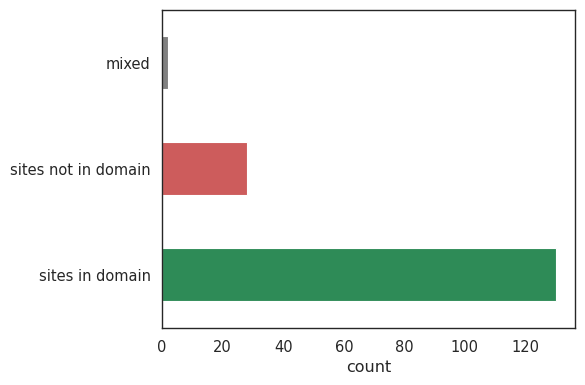

In [105]:
# Counting the frequency of state changes split by modres

# Grouped bar plot for better visualization
plt.figure(figsize=(6, 4))
# Pivot the dataframe for grouped barplot structure
domain_label['label'].value_counts().plot(kind='barh',color=['seagreen','indianred','grey'])

# Plot grouped barplot
plt.xlabel('count')
plt.tight_layout()

plt.savefig('domain_sitesAll.svg', format='svg', dpi=1200)


In [286]:
domain_label['label'].value_counts()

both domain           130
both not in domain     28
mixed                   2
Name: label, dtype: int64

<Figure size 700x1000 with 0 Axes>

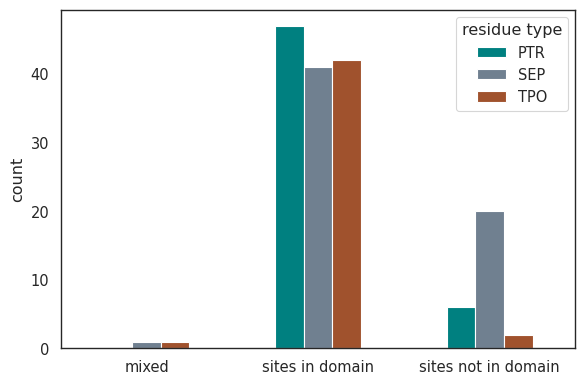

In [103]:
sns.set_context("paper",font_scale = 1.2)
sns.set_style("white")


# Counting the frequency of state changes split by modres
dom_change_counts = domain_label.groupby(['modres', 'label']).size().reset_index(name='count')

# Grouped bar plot for better visualization
plt.figure(figsize=(7, 10))
# Pivot the dataframe for grouped barplot structure
pivot_df = dom_change_counts.pivot(index='label', columns='modres', values='count')

# Plot grouped barplot
pivot_df.plot(kind='bar', figsize=(6, 4), logy=False,color=['teal','slategrey','sienna'])
plt.xlabel('')
plt.ylabel('count')
# plt.title('Grouped Barplot of modres by label')
plt.legend(title="residue type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('domain_sites_specific.svg', format='svg', dpi=1200)

plt.show()







In [202]:
dom_change_counts 

,modres,label,count
0,PTR,both domain,47
1,PTR,both not in domain,6
2,SEP,both domain,41
3,SEP,both not in domain,20
4,SEP,mixed,1
5,TPO,both domain,42
6,TPO,both not in domain,2
7,TPO,mixed,1


In [ ]:
## Conclusion
### Most of the pairs and sites are in domain regions.

## Proteins whose P-sites not in domain

In [46]:
domain_new.loc[~domain_new.ACC_ID.isin(merged_domain_new_df.ACC_ID.tolist())].ACC_ID.nunique()

11

#### Proteins where domain info is not available


In [102]:
set(domainpdb.ACC_ID.tolist())-set(overlap_results_df.ACC_ID.tolist())

{'O75531', 'P05187', 'P0DMV8', 'P15693', 'P37840'}

## Secondary structure details for maximum diversity pairs

## Secondary Structure info

In [72]:
af3eval_df=pd.read_csv('forAF3_eval.txt',sep='\t')
ssdata=af3eval_df.copy()

In [73]:
pdbposdf=pd.read_csv('paired_df_str_NPall.txt',sep='\t')
# pdbposdf[['ACC_ID','PDBID_1','CHAINID_1','P_STATUS_1','newpos_1','PDBID_2','CHAINID_2','P_STATUS_2','newpos_2']]
pdbposdf['prot1']=pdbposdf['PDBID_1']+'_'+pdbposdf['CHAINID_1']
pdbposdf['prot2']=pdbposdf['PDBID_2']+'_'+pdbposdf['CHAINID_2']
pdbposdf[['ACC_ID','prot1','P_STATUS_1','newpos_1','prot2','P_STATUS_2','newpos_2']]

ssdata_new=ssdata.merge(pdbposdf[['ACC_ID','prot1','P_STATUS_1','newpos_1','prot2','P_STATUS_2','newpos_2']]\
                        ,on=['ACC_ID','prot1','prot2'])
ssdata_new=ssdata_new.drop(['ACC_ID_x','ACC_ID_y'],axis=1)


# Sorting 'newpos_1' and 'newpos_2' as incrementing lists
ssdata_new["newpos_1"] = ssdata_new["newpos_1"].apply(lambda x: ",".join(list(set(x.split(',')))))
ssdata_new["newpos_2"] = ssdata_new["newpos_2"].apply(lambda x: ",".join(list(set(x.split(',')))))

ssdata_new["newpos_1"] = ssdata_new["newpos_1"].apply(lambda x: ",".join(sorted(x.split(','), key=int)))
ssdata_new["newpos_2"] = ssdata_new["newpos_2"].apply(lambda x: ",".join(sorted(x.split(','), key=int)))



ssdata_new.head()
# ssdata_new.loc[ssdata_new.newpos_1!=ssdata_new.newpos_2]

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain,RMSD_type,max_PDBsup_RMSD,conf_label,PDBsup_RMSD,prot1,prot2,P_STATUS_1,newpos_1,P_STATUS_2,newpos_2
0,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,global,2.14,medium,2.14,6vhg_A,6nec_A,P,"905,928",NP,"905,928"
1,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,segment,3.82,medium,3.82,6vhg_A,6nec_A,P,"905,928",NP,"905,928"
2,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,global,0.68,small,0.68,7aip_A,7aiq_A,P,"734,916",NP,"734,916"
3,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,segment,0.86,small,0.86,7aip_A,7aiq_A,P,"734,916",NP,"734,916"
4,P22681,4a49,A,371_PTR,371,PTR,1,4a49A,4a49_A,global,12.59,large,12.59,4a49_A,2k4d_A,P,371,NP,371


In [214]:
# ssdata_api.to_csv('ssdata_api.txt',sep='\t',index=False)

In [52]:
# ssdata_new.loc[ssdata_new.newpos_1!=ssdata_new.newpos_2]

In [215]:
# ssdata_api.loc[ssdata_api.RMSD_type=='global']


In [54]:
# # del ssdata
# ssdf=ssdata_api[['ACC_ID','RMSD_type','modres','newpos_1','newpos_2','PDBsup_RMSD','prot1','prot2','prot1_ss','prot2_ss']]
# ssdf=ssdf.loc[ssdf.RMSD_type=='global']

# # Split comma-separated columns into separate rows
# cols_to_split = ['newpos_1','newpos_2','modres','prot1_ss', 'prot2_ss']
# for col in cols_to_split:
#     ssdf[col] = ssdf[col].str.split(',')

# # Apply explode to properly split the columns into separate rows
# ssdf_split = ssdf.apply(lambda x: x.explode() if x.name in cols_to_split else x, axis=0)
# ssdf_split

,ACC_ID,RMSD_type,modres,newpos_1,newpos_2,PDBsup_RMSD,prot1,prot2,prot1_ss,prot2_ss
0,P07949,global,PTR,905,905,2.14,6vhg_A,6nec_A,coil,strands
0,P07949,global,PTR,928,928,2.14,6vhg_A,6nec_A,coil,strands
2,Q9UP95,global,SEP,734,734,0.68,7aip_A,7aiq_A,helices,coil
2,Q9UP95,global,SEP,916,916,0.68,7aip_A,7aiq_A,coil,coil
4,P22681,global,PTR,371,371,12.59,4a49_A,2k4d_A,helices,coil
...,...,...,...,...,...,...,...,...,...,...
212,Q5S007,global,TPO,1343,1343,8.88,6vp6_A,6ojf_A,coil,coil
214,Q92918,global,TPO,165,165,6.40,6nfz_A,7siu_A,coil,helices
214,Q92918,global,SEP,171,171,6.40,6nfz_A,7siu_A,coil,helices
216,O15264,global,TPO,180,180,2.68,4myg_A,8x23_A,coil,coil


In [13]:
import subprocess
import pandas as pd
import os

ssdata_stride=ssdata_new.copy()


# Maximum solvent accessible areas for standard amino acids (in Å²)
MAX_SAA = {
    'ALA': 113, 'ARG': 255, 'ASN': 158, 'ASP': 151, 'CYS': 140,
    'GLN': 189, 'GLU': 183, 'GLY': 85, 'HIS': 194, 'ILE': 182,
    'LEU': 180, 'LYS': 233, 'MET': 203, 'PHE': 218, 'PRO': 143,
    'SER': 122, 'THR': 146, 'TRP': 259, 'TYR': 229, 'VAL': 160,
    'PTR': 229,  # Phosphorylated Tyrosine
    'TPO': 146,  # Phosphorylated Threonine
    'SEP': 122   # Phosphorylated Serine
}

# Function to run STRIDE and parse output, creating a temporary modified PDB file
def run_stride_and_parse(pdb_path, modpos, chain_id):
    modified_pdb_path = 'modified_pdb.pdb'
    with open(pdb_path, 'r') as pdb_file, open(modified_pdb_path, 'w') as modified_file:
        for line in pdb_file:
            if line.startswith('HETATM') and any(res in line for res in ['PTR', 'TPO', 'SEP']):
                modified_file.write(line.replace('HETATM', 'ATOM  ', 1))
            else:
                modified_file.write(line)

    # Run STRIDE on the modified file
    result = subprocess.run(f"stride {modified_pdb_path}", shell=True, capture_output=True, text=True)
    os.remove(modified_pdb_path)

    # Check for errors
    if result.returncode != 0:
        print(f"Error running STRIDE: {result.stderr}")
        return pd.DataFrame()

    stride_output = result.stdout
    parsed_data = []
    for line in stride_output.splitlines():
        if line.startswith("ASG"):
            parts = line.split()
            try:
                residue = parts[1]
                chain = parts[2]
                residue_number = int(parts[3])
                if str(residue_number) not in modpos or chain != chain_id:
                    continue
                structure = parts[6]
                solvent_accessible_area = float(parts[9])
                pdb_id = parts[10]

                max_saa = MAX_SAA.get(residue, 1)
                rsa = (solvent_accessible_area / max_saa) * 100
                rsa=round(rsa,2)

                parsed_data.append({
                    "Residue": residue,
                    "Chain": chain,
                    "Author_Residue_Number": residue_number,
                    "Secondary_Structure": structure,
                    "Solvent_Accessible_Area": solvent_accessible_area,
                    "RSA (%)": rsa,
                    "PDB_ID": pdb_id
                })
            except (IndexError, ValueError):
                print(f"Error parsing line: {line}")

    df_stride = pd.DataFrame(parsed_data)
    return df_stride

# Process each modpos for both prot1 and prot2 using newpos_1 and newpos_2
for col, pos_col in [('prot1', 'newpos_1'), ('prot2', 'newpos_2')]:
    ssdata_stride[[f'{col}_pdb', f'{col}_chain']] = ssdata_stride[col].str.split('_', expand=True)
    ss_annotations = []
    rsa_annotations = []

    for _, row in ssdata_stride.iterrows():
        print("Processing protein", row['ACC_ID'])
        pdb_path = os.path.join('PDB_Files', f"{row[f'{col}_pdb']}.pdb")
        modpos_list = row[pos_col].split(',')
        df_stride = run_stride_and_parse(pdb_path, modpos_list, row[f'{col}_chain'])

        # Ensure results match the order of modpos
        ss_result = []
        rsa_result = []

        for pos in modpos_list:
            match = df_stride[(df_stride['Author_Residue_Number'] == int(pos)) & 
                              (df_stride['Chain'] == row[f'{col}_chain'])]
            if not match.empty:
                ss_result.append(match.iloc[0]['Secondary_Structure'])
                rsa_result.append(str(match.iloc[0]['RSA (%)']))
            else:
                ss_result.append('Coil')
                rsa_result.append('NA')

        ss_annotations.append(','.join(ss_result))
        rsa_annotations.append(','.join(rsa_result))

    # Assign the corrected results to the dataframe
    ssdata_stride[f'{col}_ss'] = ss_annotations
    ssdata_stride[f'{col}_rsa'] = rsa_annotations

# Display the updated dataframe


In [58]:
ssdata_stride

,ACC_ID,PDBID,CHAINID,ModPosList,modpos,modres,numMod,PDBchain,prot_chain,RMSD_type,...,P_STATUS_2,newpos_2,prot1_pdb,prot1_chain,prot1_ss,prot1_rsa,prot2_pdb,prot2_chain,prot2_ss,prot2_rsa
0,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,global,...,NP,"905,928",6vhg,A,"Turn,Coil","119.13,21.44",6nec,A,"Strand,Strand","18.17,3.58"
1,P07949,6vhg,A,"905_PTR,928_PTR","905,928","PTR,PTR",2,6vhgA,6vhg_A,segment,...,NP,"905,928",6vhg,A,"Turn,Coil","119.13,21.44",6nec,A,"Strand,Strand","18.17,3.58"
2,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,global,...,NP,"734,916",7aip,A,"Coil,310Helix","88.11,75.74",7aiq,A,"Turn,310Helix","43.85,52.95"
3,Q9UP95,7aip,A,"734_SEP,916_SEP","734,916","SEP,SEP",2,7aipA,7aip_A,segment,...,NP,"734,916",7aip,A,"Coil,310Helix","88.11,75.74",7aiq,A,"Turn,310Helix","43.85,52.95"
4,P22681,4a49,A,371_PTR,371,PTR,1,4a49A,4a49_A,global,...,NP,371,4a49,A,AlphaHelix,39.13,2k4d,A,Turn,72.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Q5S007,6vp6,A,1343_TPO,1343,TPO,1,6vp6A,6vp6_A,segment,...,NP,1343,6vp6,A,Turn,113.49,6ojf,A,Turn,63.9
214,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,global,...,NP,"165,171",6nfz,A,"Turn,Coil","98.08,82.13",7siu,A,"AlphaHelix,AlphaHelix","18.42,49.1"
215,Q92918,6nfz,A,"165_TPO,171_SEP","165,171","TPO,SEP",2,6nfzA,6nfz_A,segment,...,NP,"165,171",6nfz,A,"Turn,Coil","98.08,82.13",7kac,B,"AlphaHelix,Turn","51.78,42.05"
216,O15264,4myg,A,"180_TPO,182_PTR","180,182","TPO,PTR",2,4mygA,4myg_A,global,...,NP,"180,182",4myg,A,"Turn,Turn","36.64,70.61",8x23,A,"Coil,Coil","96.78,77.99"


In [219]:
ssdata_stride.to_csv('ssdata_stride.txt',sep='\t',index=False)

In [74]:
ssdata_stride=pd.read_csv('ssdata_stride.txt',sep='\t')

In [78]:
# del ssdata
ssdf_stride=ssdata_stride[['ACC_ID','RMSD_type','modres','newpos_1','newpos_2','PDBsup_RMSD','prot1','prot2',\
                           'prot1_ss','prot2_ss','prot1_rsa','prot2_rsa']]
ssdf_stride=ssdf_stride.loc[ssdf_stride.RMSD_type=='global']

# Split comma-separated columns into separate rows
cols_to_split = ['modres','newpos_1','newpos_2','prot1_ss','prot2_ss','prot1_rsa','prot2_rsa']
for col in cols_to_split:
    ssdf_stride[col] = ssdf_stride[col].str.split(',')

# Apply explode to properly split the columns into separate rows
ssdf_stride_split = ssdf_stride.apply(lambda x: x.explode() if x.name in cols_to_split else x, axis=0)




In [79]:
ssdf_stride_split.prot1.nunique()

109

In [80]:
# del ssdf_stride_split

In [81]:
ssdf_stride_split.prot2_ss.value_counts()

Turn          55
Coil          49
Strand        25
AlphaHelix    20
310Helix       6
Bridge         1
Name: prot2_ss, dtype: int64

In [82]:
eight_to_three={'Turn':'coil',
                'Coil':'coil',
                'AlphaHelix':'helix',
                '310Helix':'helix',
                'Strand':'strand',
                'Bridge':'strand'}

ssdf_stride_split['prot1_ss'] = ssdf_stride_split['prot1_ss'].apply(lambda x: ','.join([eight_to_three.get(ss, 'coil') for ss in x.split(',')]))

ssdf_stride_split['prot2_ss'] = ssdf_stride_split['prot2_ss'].apply(lambda x: ','.join([eight_to_three.get(ss, 'coil') for ss in x.split(',')]))

ssdf_stride_split['prot1_rsa']=pd.to_numeric(ssdf_stride_split['prot1_rsa'],errors='coerce')
ssdf_stride_split['prot2_rsa']=pd.to_numeric(ssdf_stride_split['prot2_rsa'],errors='coerce')

## prot is P and Prot 2 is NP if RSa diff of prot2-prot1 is negative then its buried to accessible
## RSA diff is negative then phospho gains accessibility

ssdf_stride_split['RSA_diff']=ssdf_stride_split['prot2_rsa']-ssdf_stride_split['prot1_rsa']
ssdf_stride_split

,ACC_ID,RMSD_type,modres,newpos_1,newpos_2,PDBsup_RMSD,prot1,prot2,prot1_ss,prot2_ss,prot1_rsa,prot2_rsa,RSA_diff
0,P07949,global,PTR,905,905,2.14,6vhg_A,6nec_A,coil,strand,119.13,18.17,-100.96
0,P07949,global,PTR,928,928,2.14,6vhg_A,6nec_A,coil,strand,21.44,3.58,-17.86
2,Q9UP95,global,SEP,734,734,0.68,7aip_A,7aiq_A,coil,coil,88.11,43.85,-44.26
2,Q9UP95,global,SEP,916,916,0.68,7aip_A,7aiq_A,helix,helix,75.74,52.95,-22.79
4,P22681,global,PTR,371,371,12.59,4a49_A,2k4d_A,helix,coil,39.13,72.36,33.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Q5S007,global,TPO,1343,1343,8.88,6vp6_A,6ojf_A,coil,coil,113.49,63.90,-49.59
214,Q92918,global,TPO,165,165,6.40,6nfz_A,7siu_A,coil,helix,98.08,18.42,-79.66
214,Q92918,global,SEP,171,171,6.40,6nfz_A,7siu_A,coil,helix,82.13,49.10,-33.03
216,O15264,global,TPO,180,180,2.68,4myg_A,8x23_A,coil,coil,36.64,96.78,60.14


In [83]:
# Creating a column for state changes
ssdf_stride_split['state_change'] = ssdf_stride_split['prot2_ss'] + ' -> ' + ssdf_stride_split['prot1_ss']

# Counting the frequency of state changes split by modres
state_change_stride = ssdf_stride_split.groupby(['modres', 'state_change']).size().reset_index(name='count')


In [84]:
ssdf_stride_split['state_change'].value_counts()

coil -> coil        91
strand -> strand    18
helix -> helix      15
helix -> coil       11
strand -> coil       8
coil -> helix        8
coil -> strand       5
Name: state_change, dtype: int64

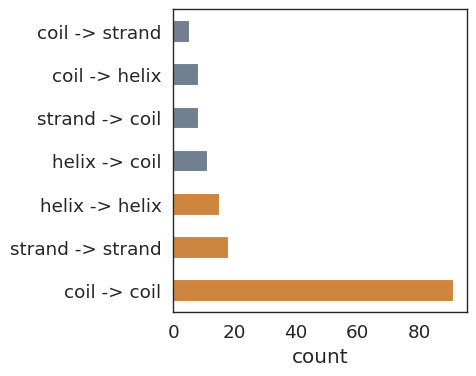

In [128]:
sns.set_context("paper",font_scale = 1.5)
sns.set_style("white")
plt.figure(figsize=(5,4 ))

ssdf_stride_split['state_change'].value_counts().plot(kind='barh',color=['peru',\
                                                                        'peru','peru',\
                                                                         'slategrey','slategrey',\
                                                                         'slategrey','slategrey'])

# plt.title('Frequency of Secondary Structure State Changes by Modification Residue')
plt.xlabel('count')
# plt.ylabel('Frequency')
plt.xticks(rotation=0)
# plt.legend(title='Modification Residue')
plt.tight_layout()
plt.savefig('secondary_plot1.svg', format='svg', dpi=1200)

plt.show()


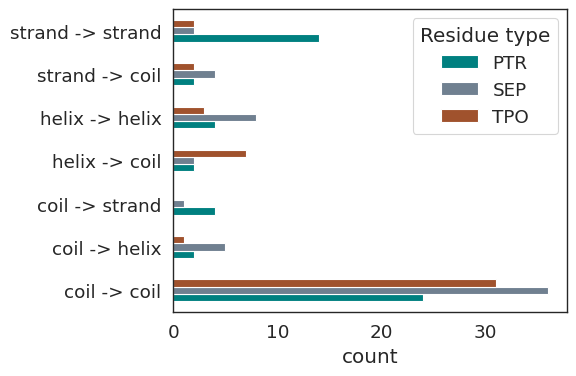

In [130]:
pivot_df = state_change_stride.pivot(index='state_change', columns='modres', values='count')

# Plot grouped barplot
pivot_df.plot(kind='barh', figsize=(6, 4), logy=False,color=['teal','slategrey','sienna'])

# plt.title('Frequency of Secondary Structure State Changes by Modification Residue')
plt.xlabel('count')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(title='Residue type')
plt.tight_layout()
plt.savefig('secondary_siteAll.svg', format='svg', dpi=1200)

plt.show()



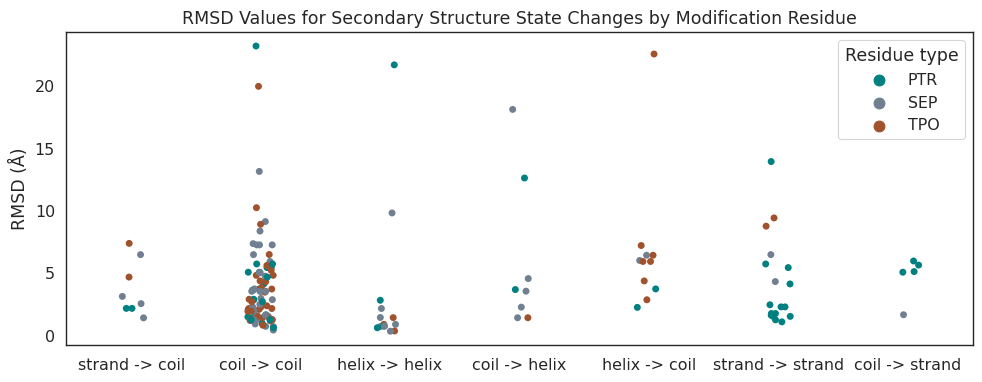

In [119]:
# Creating a strip plot to visualize RMSD values for each state change
plt.figure(figsize=(10, 4))
sns.stripplot(data=ssdf_stride_split, x='state_change', y='PDBsup_RMSD', \
              hue='modres', jitter=True, dodge=False,palette=['teal','slategrey','sienna'])

plt.title('RMSD Values for Secondary Structure State Changes by Modification Residue')
# plt.xlabel('State Change (prot1 -> prot2)')
plt.xlabel('')
plt.ylabel('RMSD (Å)')
plt.xticks(rotation=0)
plt.legend(title='Residue type')
plt.tight_layout()
plt.savefig('secondary_siteRMSD.svg', format='svg', dpi=1200)

plt.show()



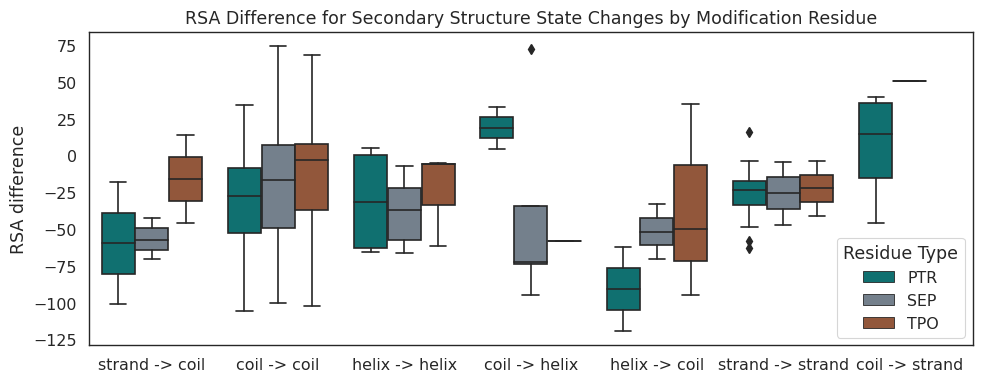

In [121]:
# Creating a box plot to visualize RSA differences for each state change
plt.figure(figsize=(10, 4))
sns.boxplot(data=ssdf_stride_split, x='state_change', y='RSA_diff', hue='modres',palette=['teal','slategrey','sienna'])

plt.title('RSA Difference for Secondary Structure State Changes by Modification Residue')
plt.xlabel('')
plt.ylabel('RSA difference')
plt.xticks(rotation=0)
plt.legend(title='Residue Type')
plt.tight_layout()
plt.savefig('RSA diff.svg', format='svg', dpi=1200)

plt.show()

